# MW tests for all "categorical" variables, correlations for all continuous variables. For fiducial k=16 model for 733-sample ENCODE data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/Users/amuratov/gits/EncodeNMF')


In [2]:
import OONMF
import OONMFhelpers as OH
import OONMFmetadata as OMD

In [3]:
today = OH.get_today()
k=16

usingCut = False
thecut = []


In [4]:
finname = 'ENCODE 733-sample list WM20180608 - ENCODE3 metadata 2-04-19.tsv'
MetaData  = pd.read_csv(finname, sep='\t')

In [5]:
sampnamePD = pd.read_table('sampnams_733.txt', header=None, names=['LN', 'DS', 'type'])
sampnamePD['full_name'] = sampnamePD.LN + '-' + sampnamePD.DS + '-' + sampnamePD.type

In [6]:
decomp = OONMF.NMFobject(theNcomps=k)


In [7]:
decomp.Basis_Names = sampnamePD.full_name.values


In [8]:
decomp.matrix_input_name(Basis_finname='2018-06-08NC16_NNDSVD_Basis.npy', Mixture_finname='2018-06-08NC16_NNDSVD_Mixture.npy')


In [9]:
decomp.read_matrix_input()


In [10]:
rosetta = OMD.get_rosetta(MetaData, decomp.Basis_Names)

In [11]:
categories = MetaData.columns

In [12]:
interesting_cats = []
for category in categories:
    #print(category, len(metadata[category].value_counts()))
    Ncats = len(MetaData[category].value_counts())
    if Ncats > 1 and Ncats < 51:
        interesting_cats.append(category)

In [13]:
len(interesting_cats)

32

<Figure size 432x288 with 0 Axes>

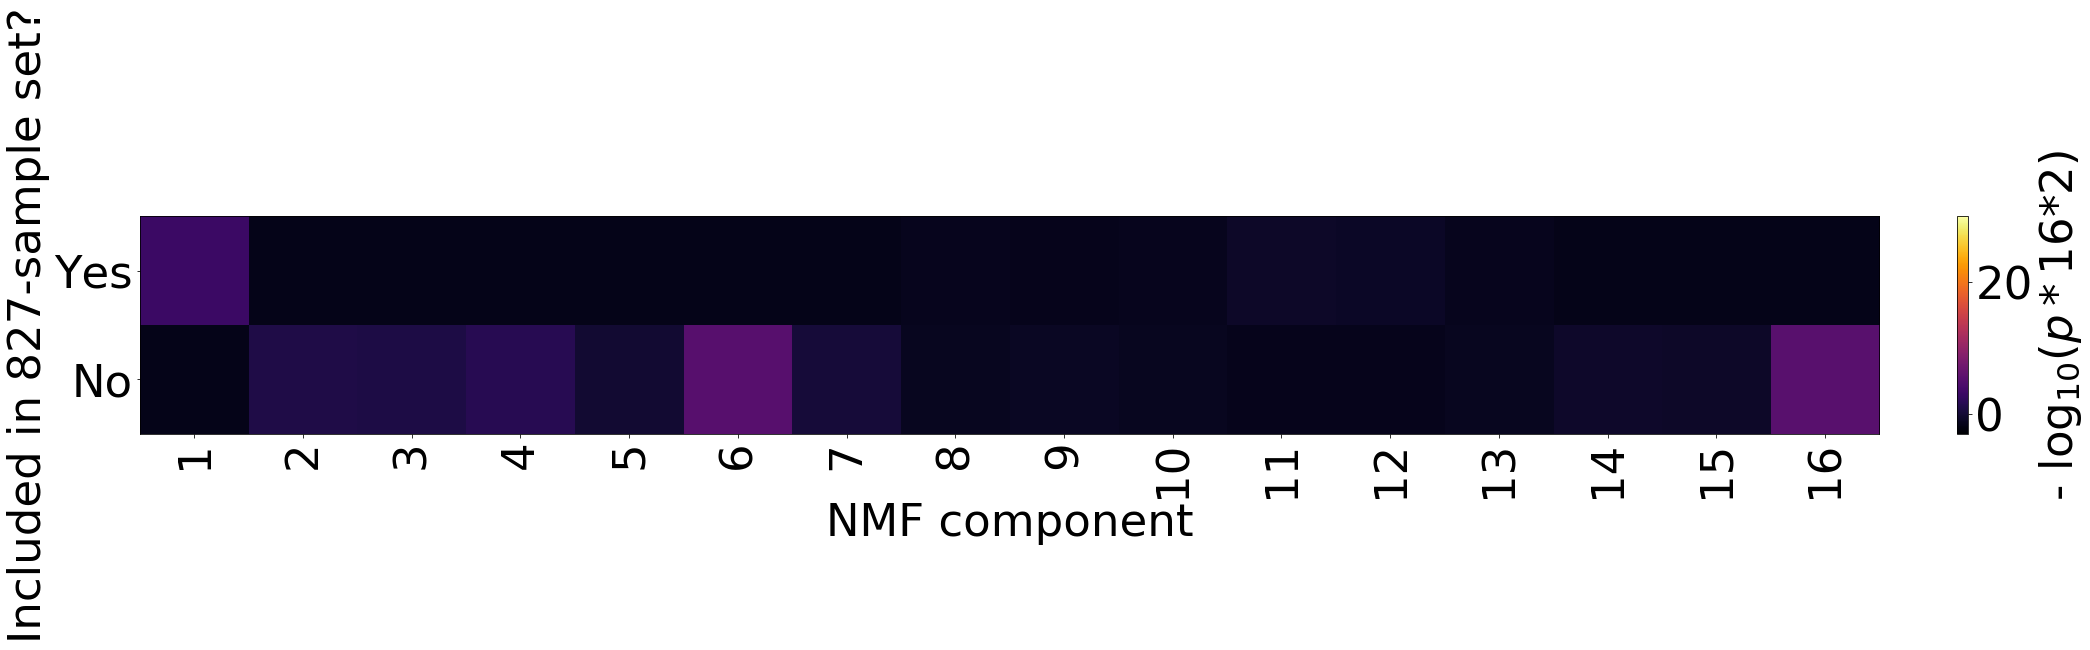

<Figure size 432x288 with 0 Axes>

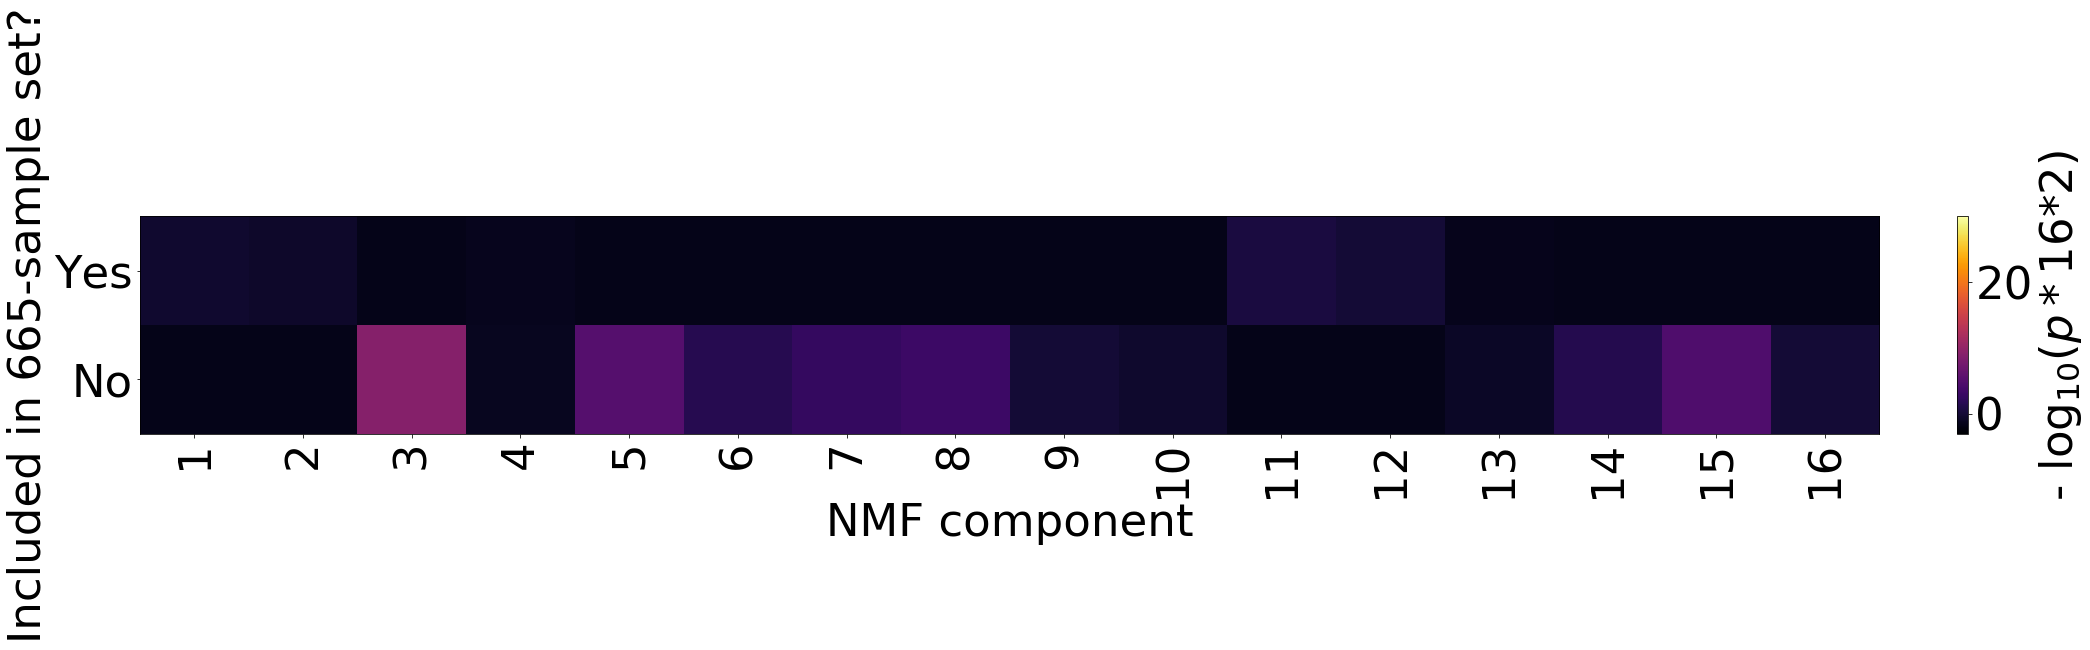

<Figure size 432x288 with 0 Axes>

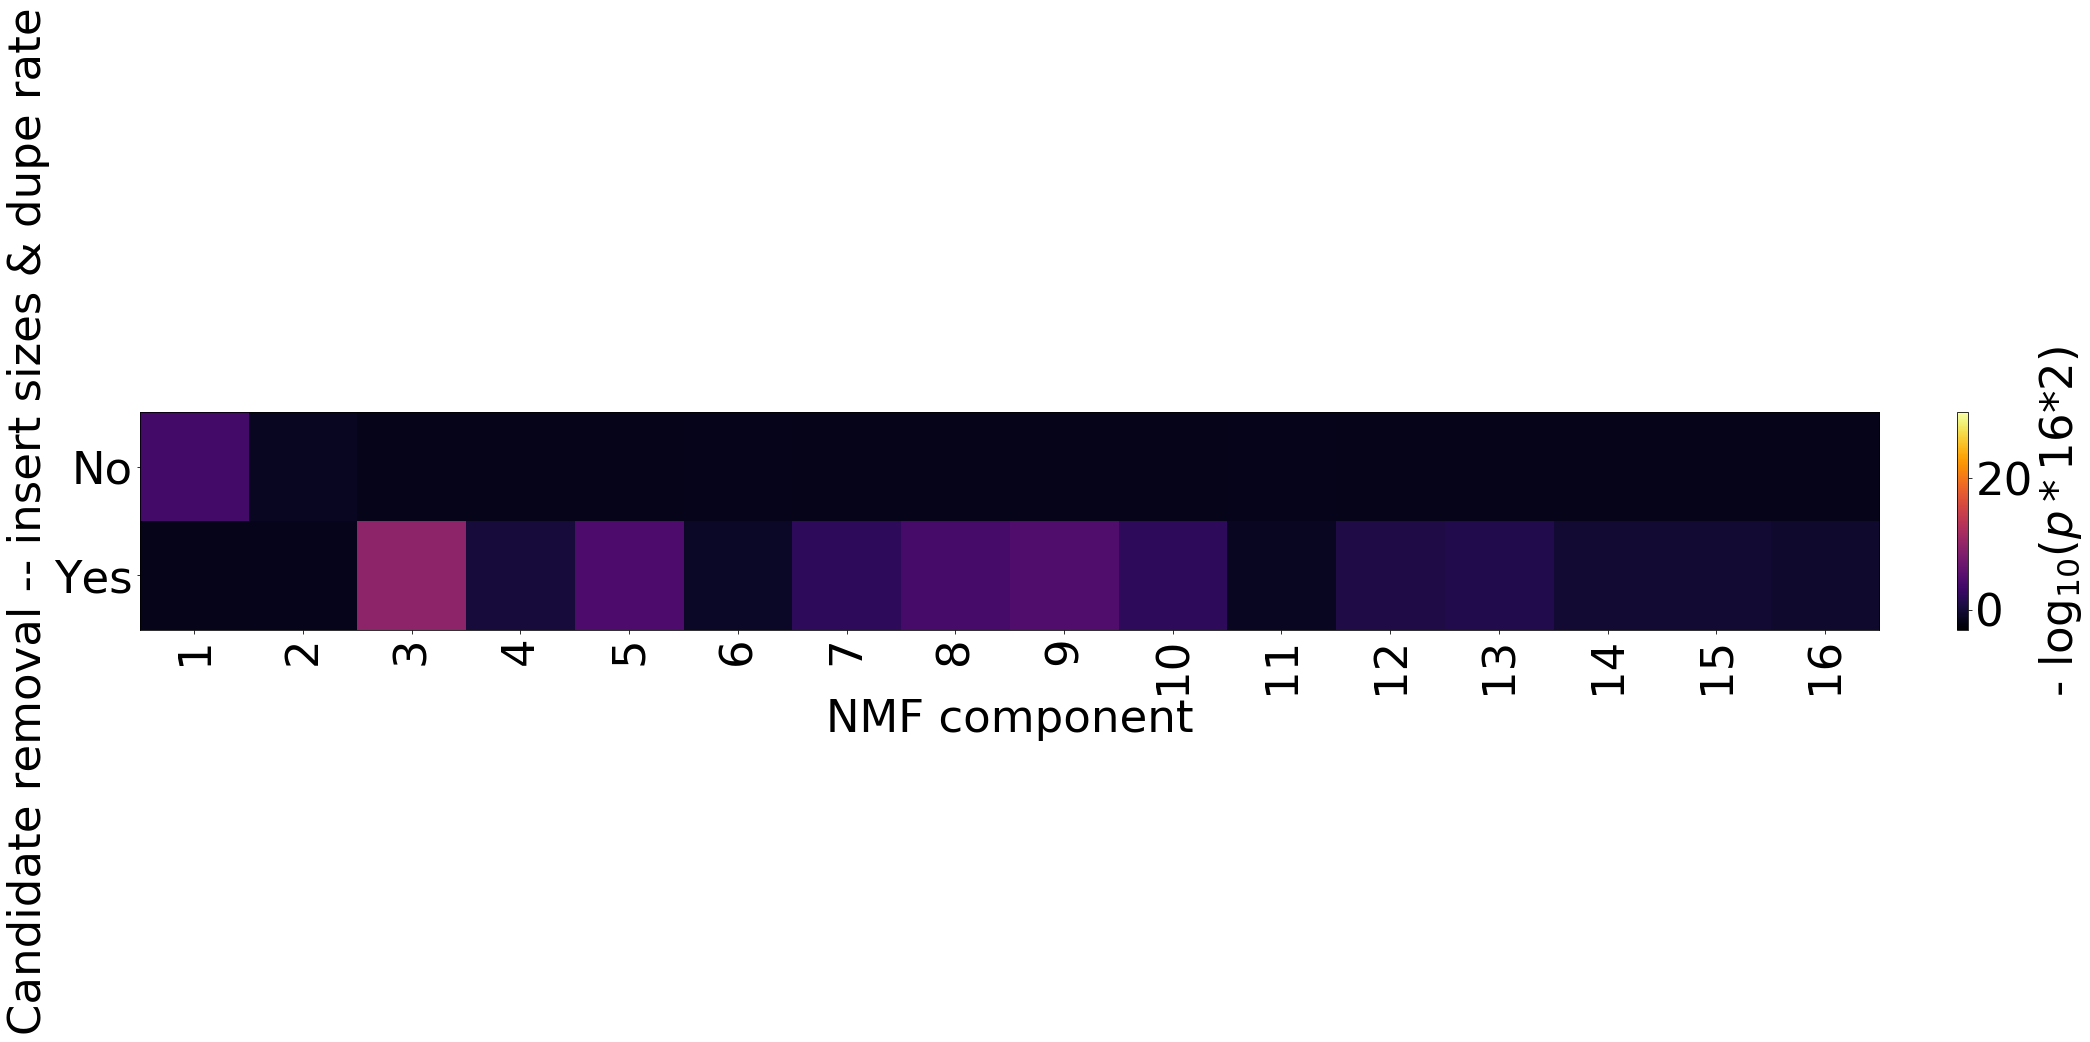

<Figure size 432x288 with 0 Axes>

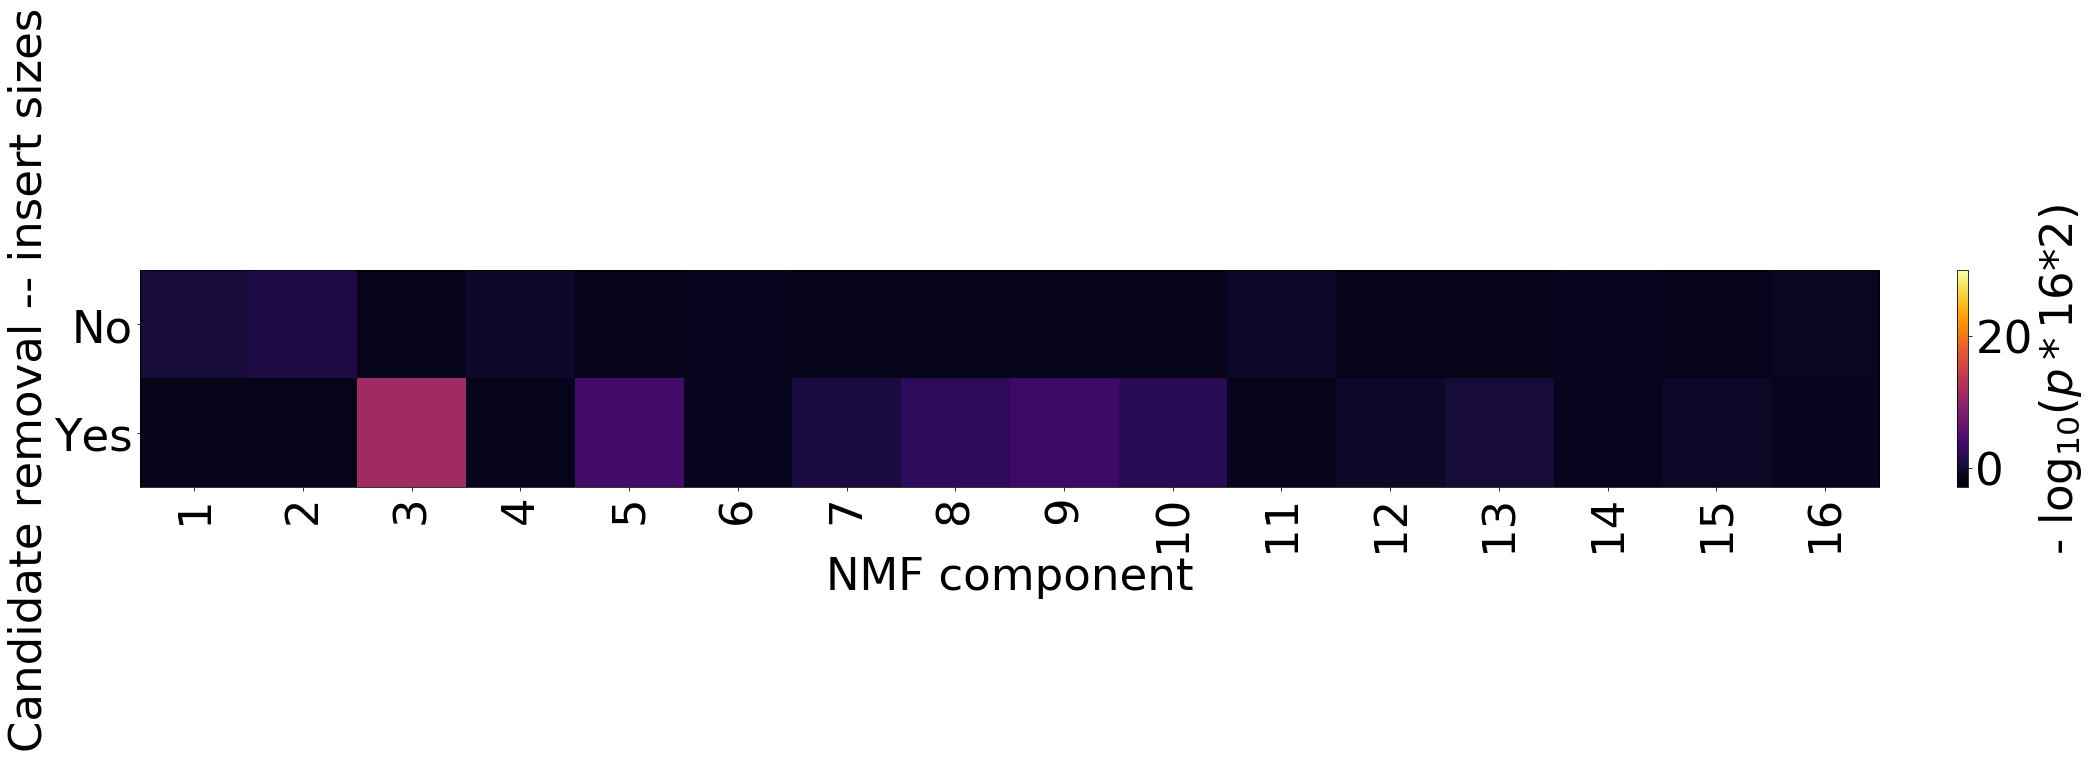

<Figure size 432x288 with 0 Axes>

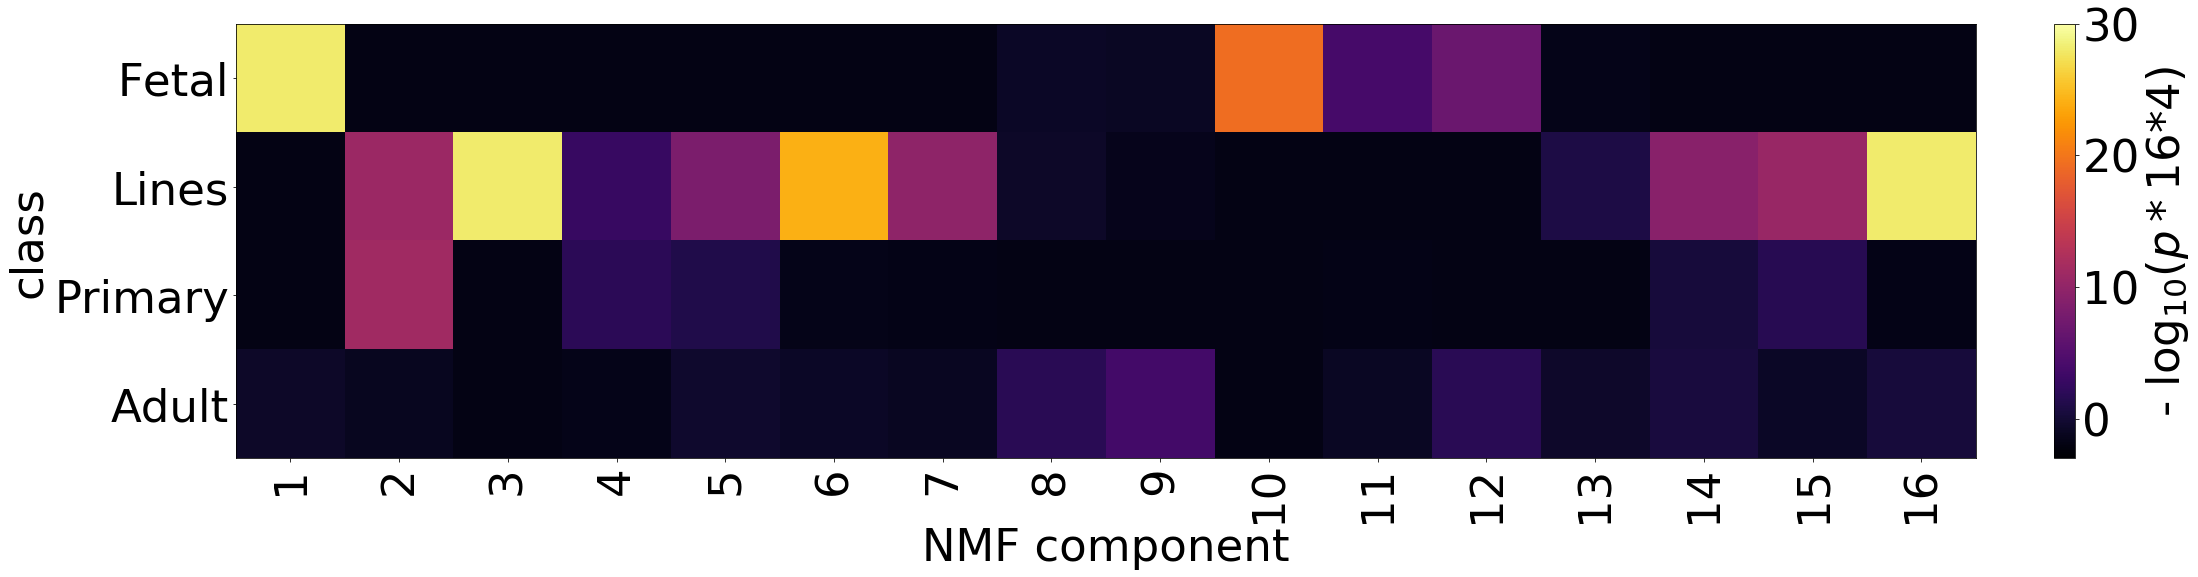

<Figure size 432x288 with 0 Axes>

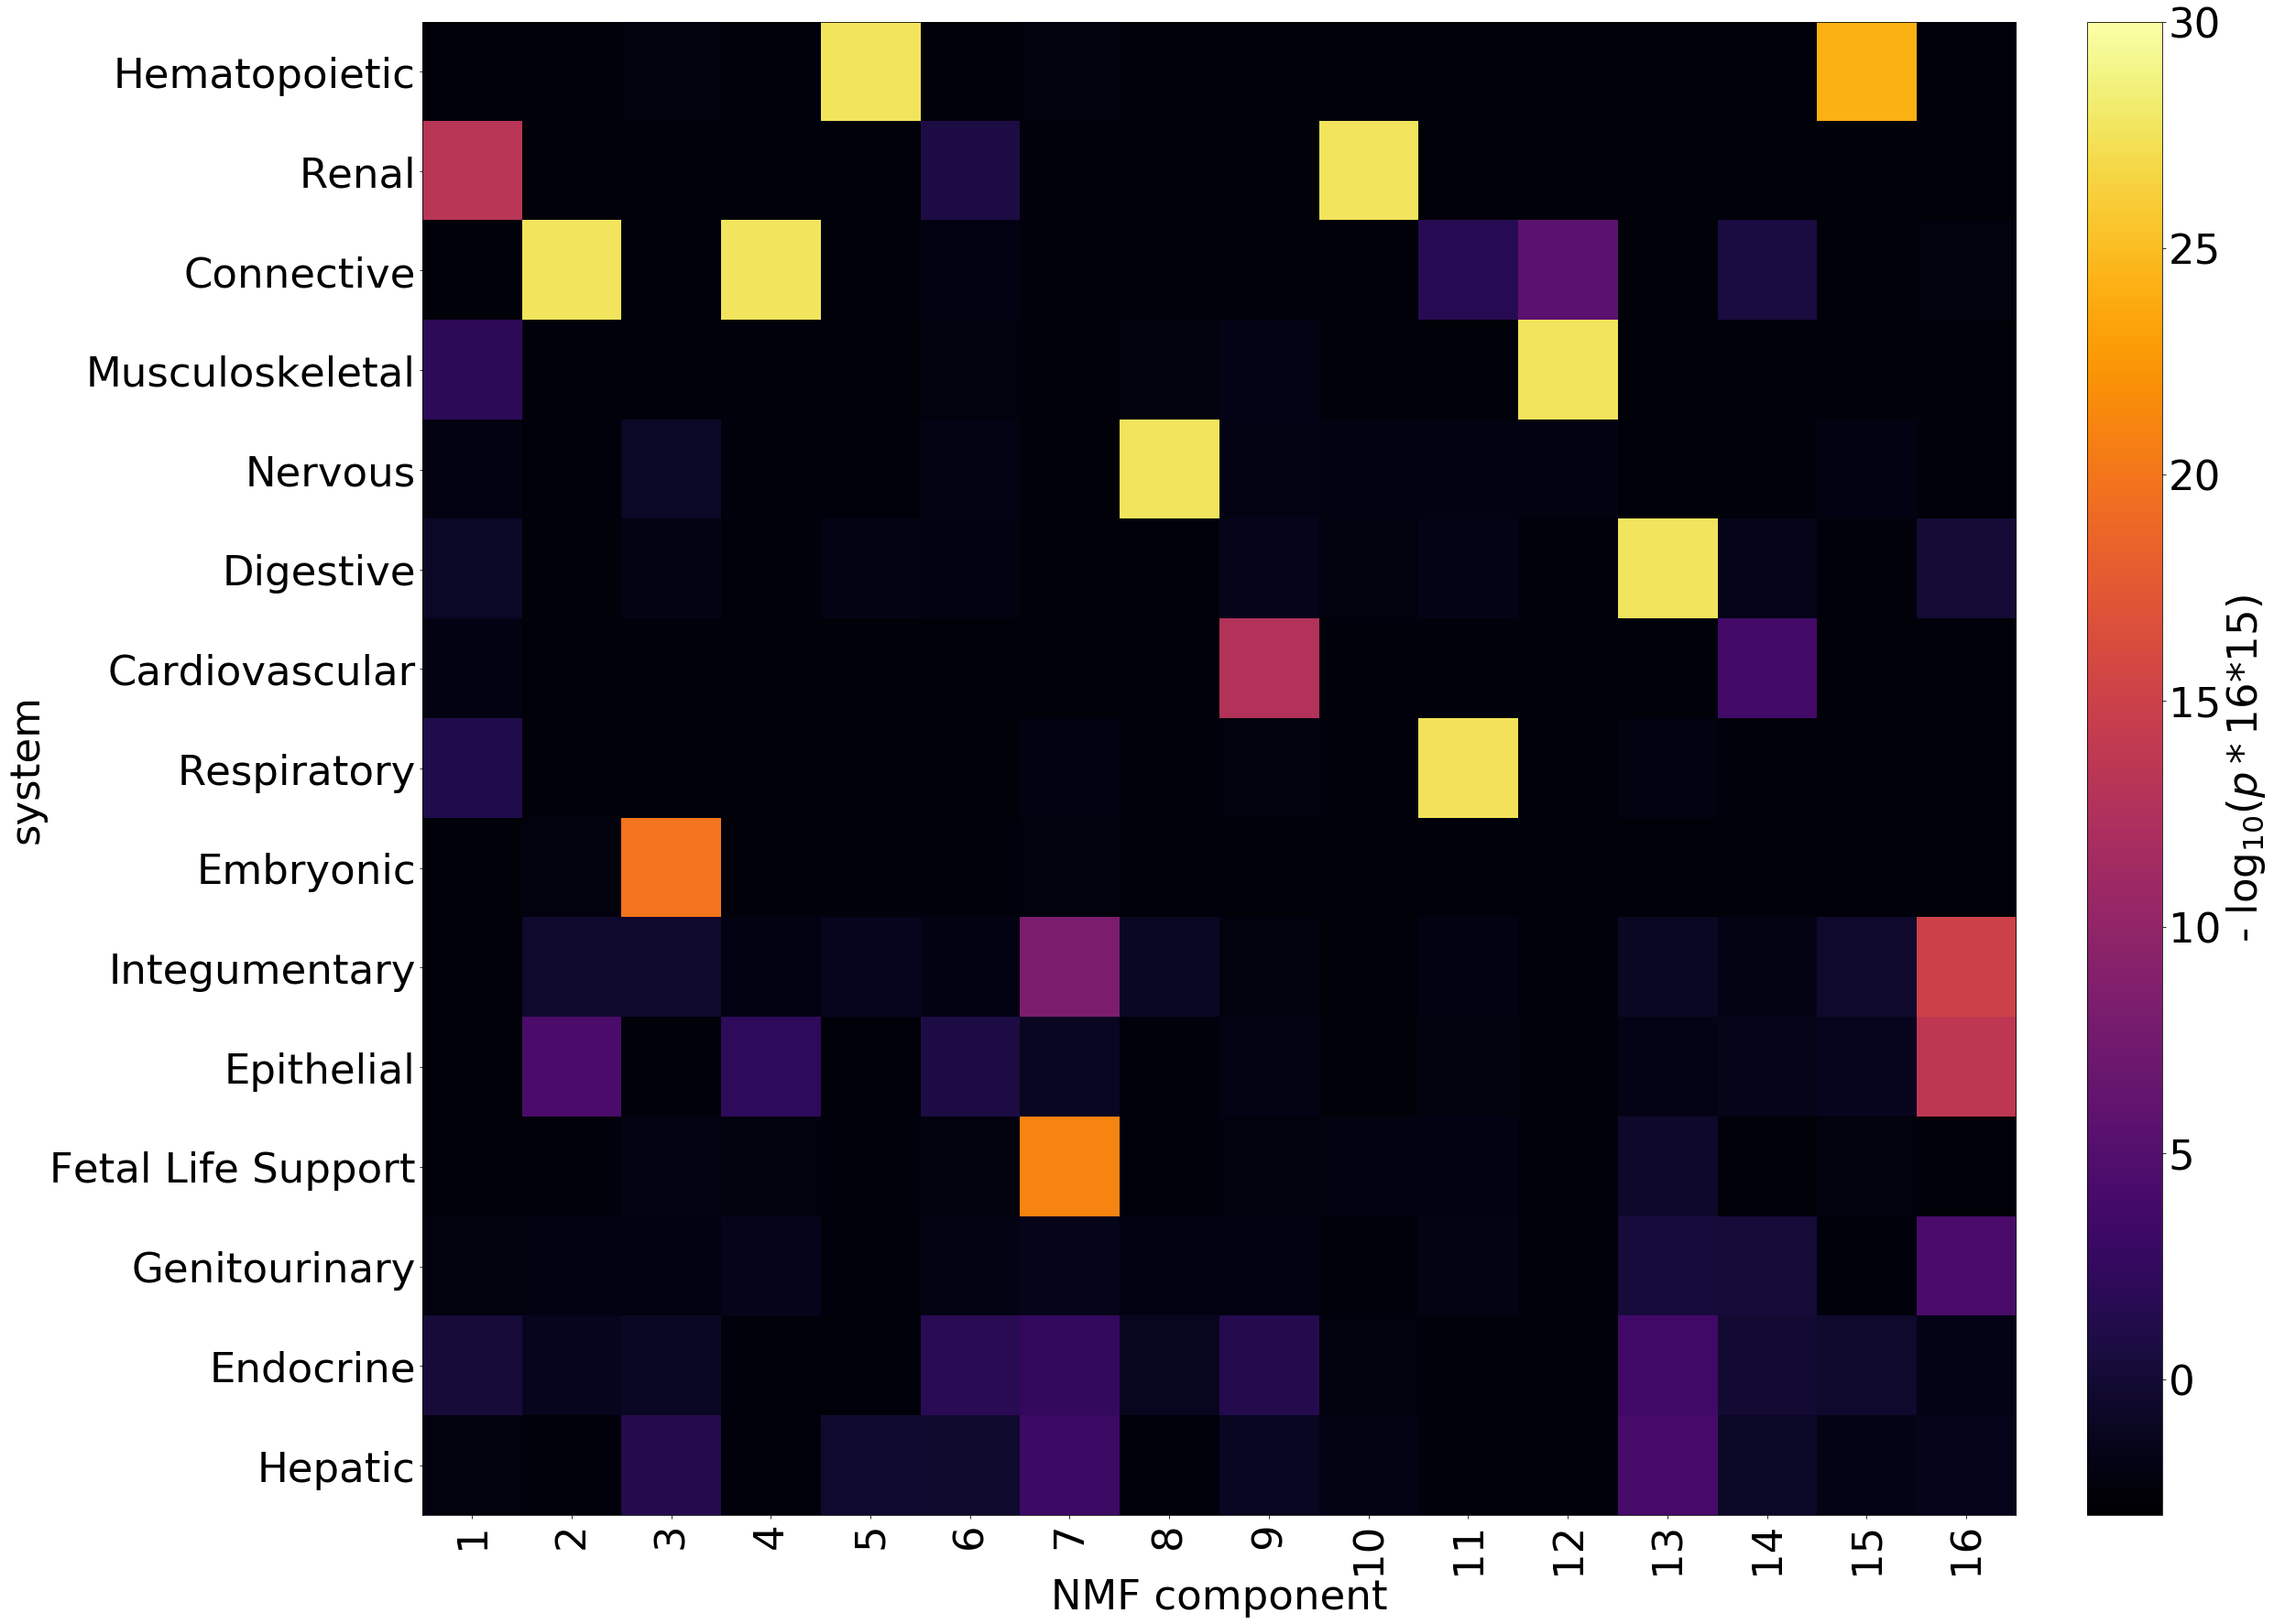

<Figure size 432x288 with 0 Axes>

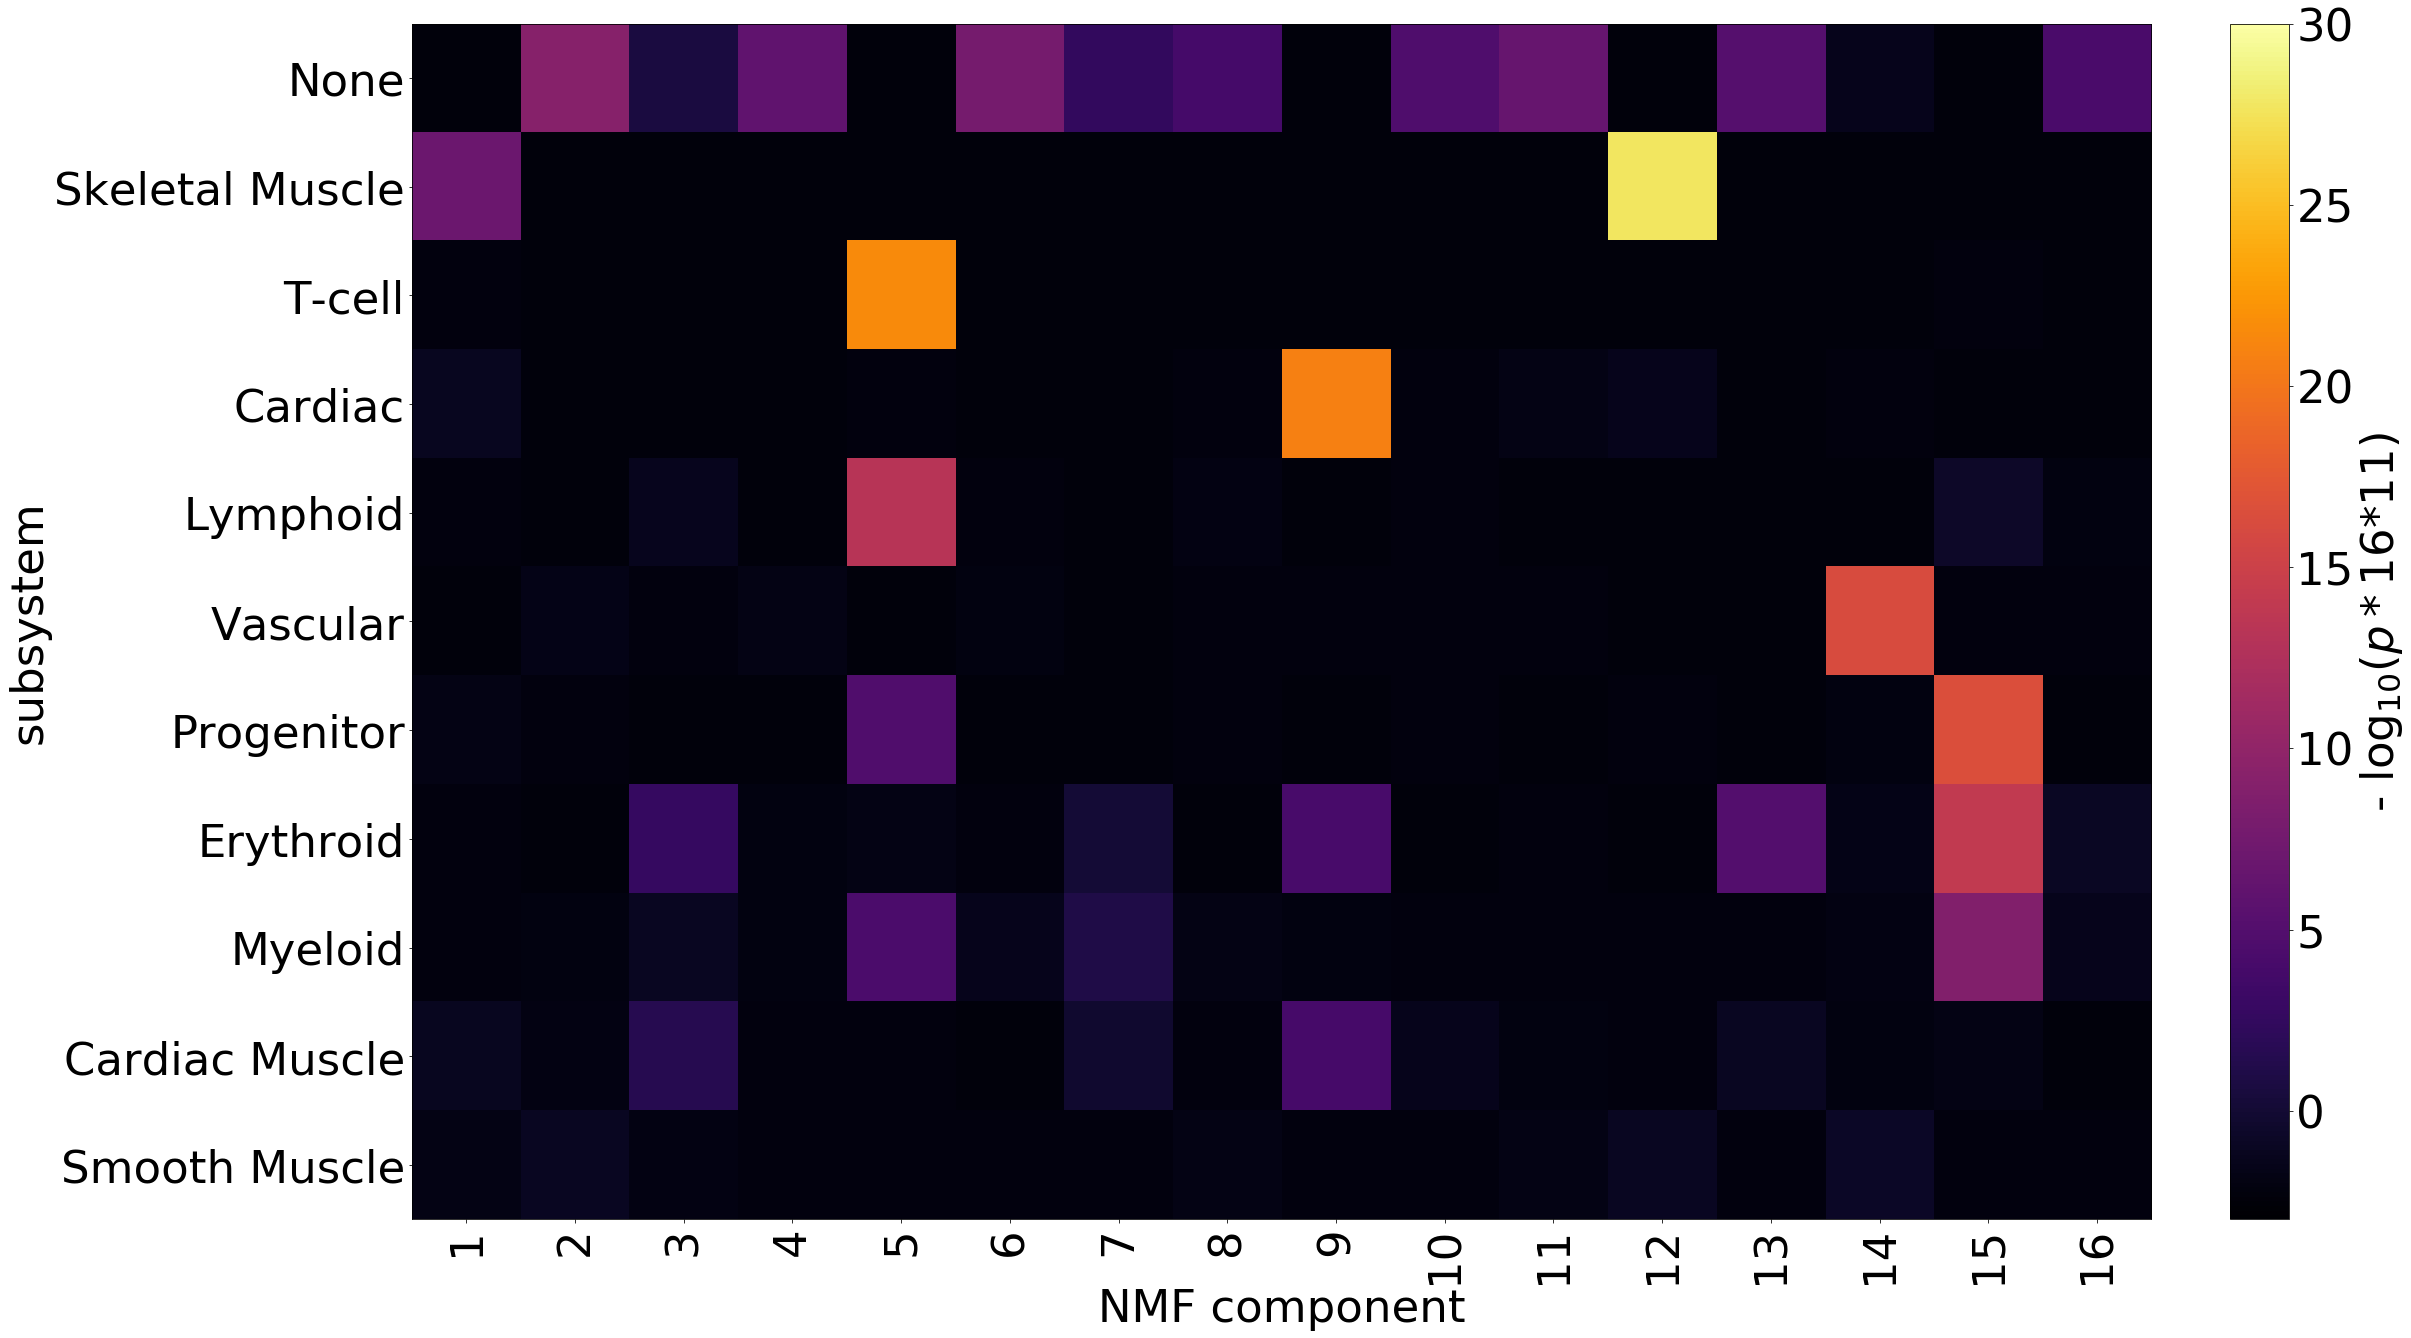

<Figure size 432x288 with 0 Axes>

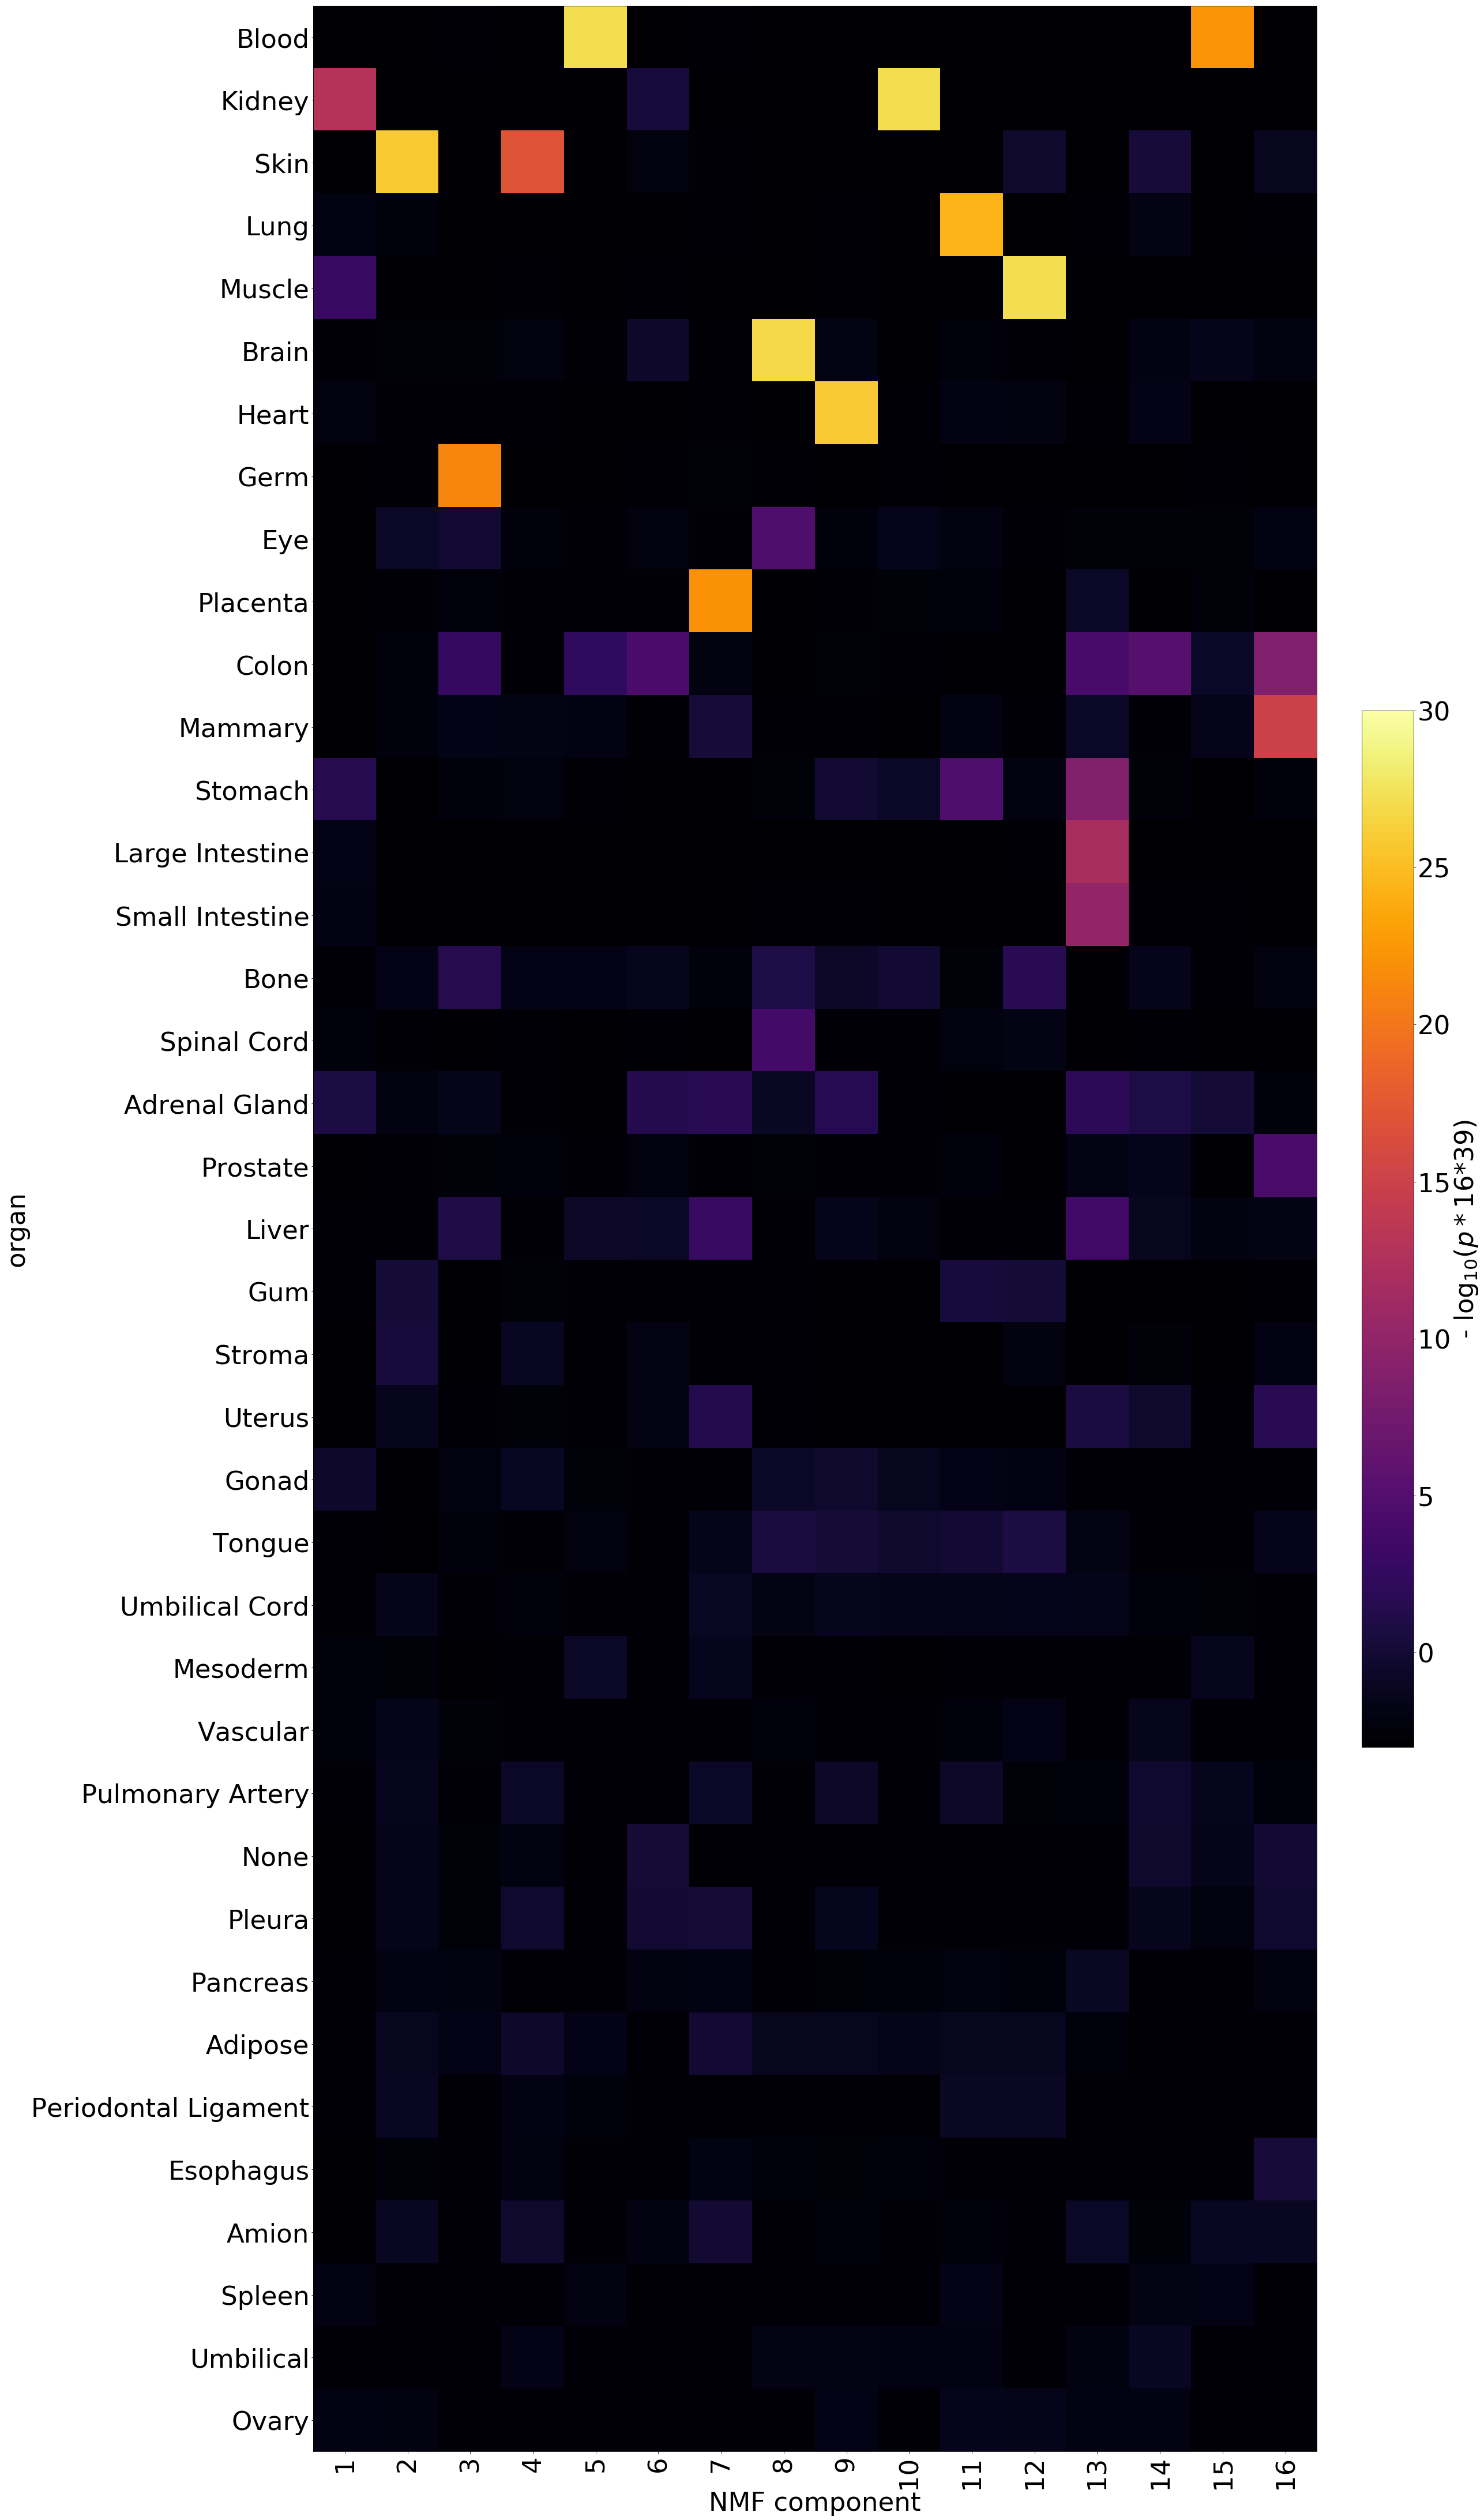

<Figure size 432x288 with 0 Axes>

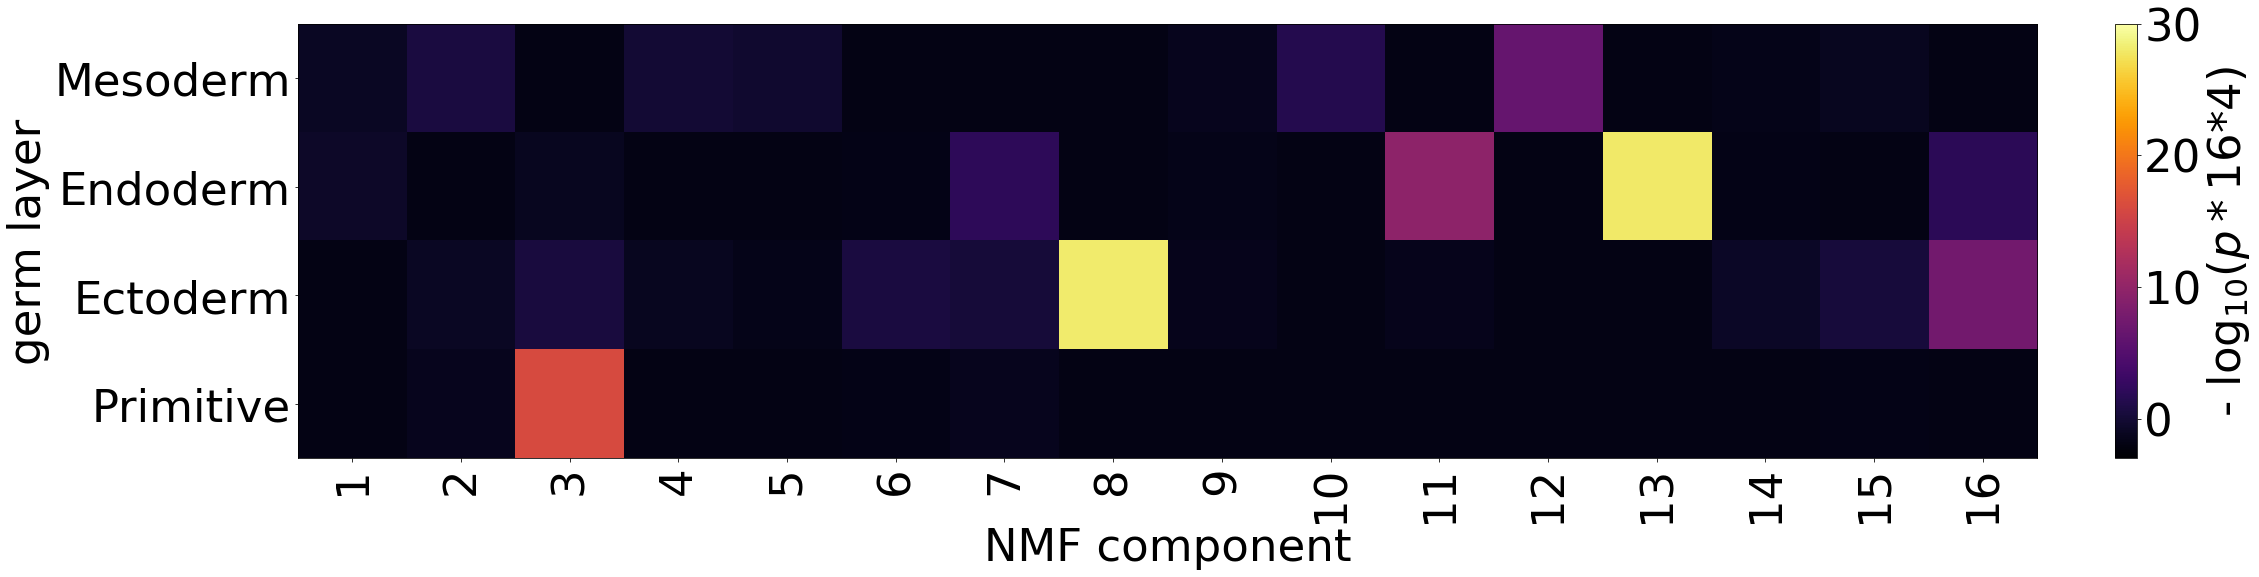

<Figure size 432x288 with 0 Axes>

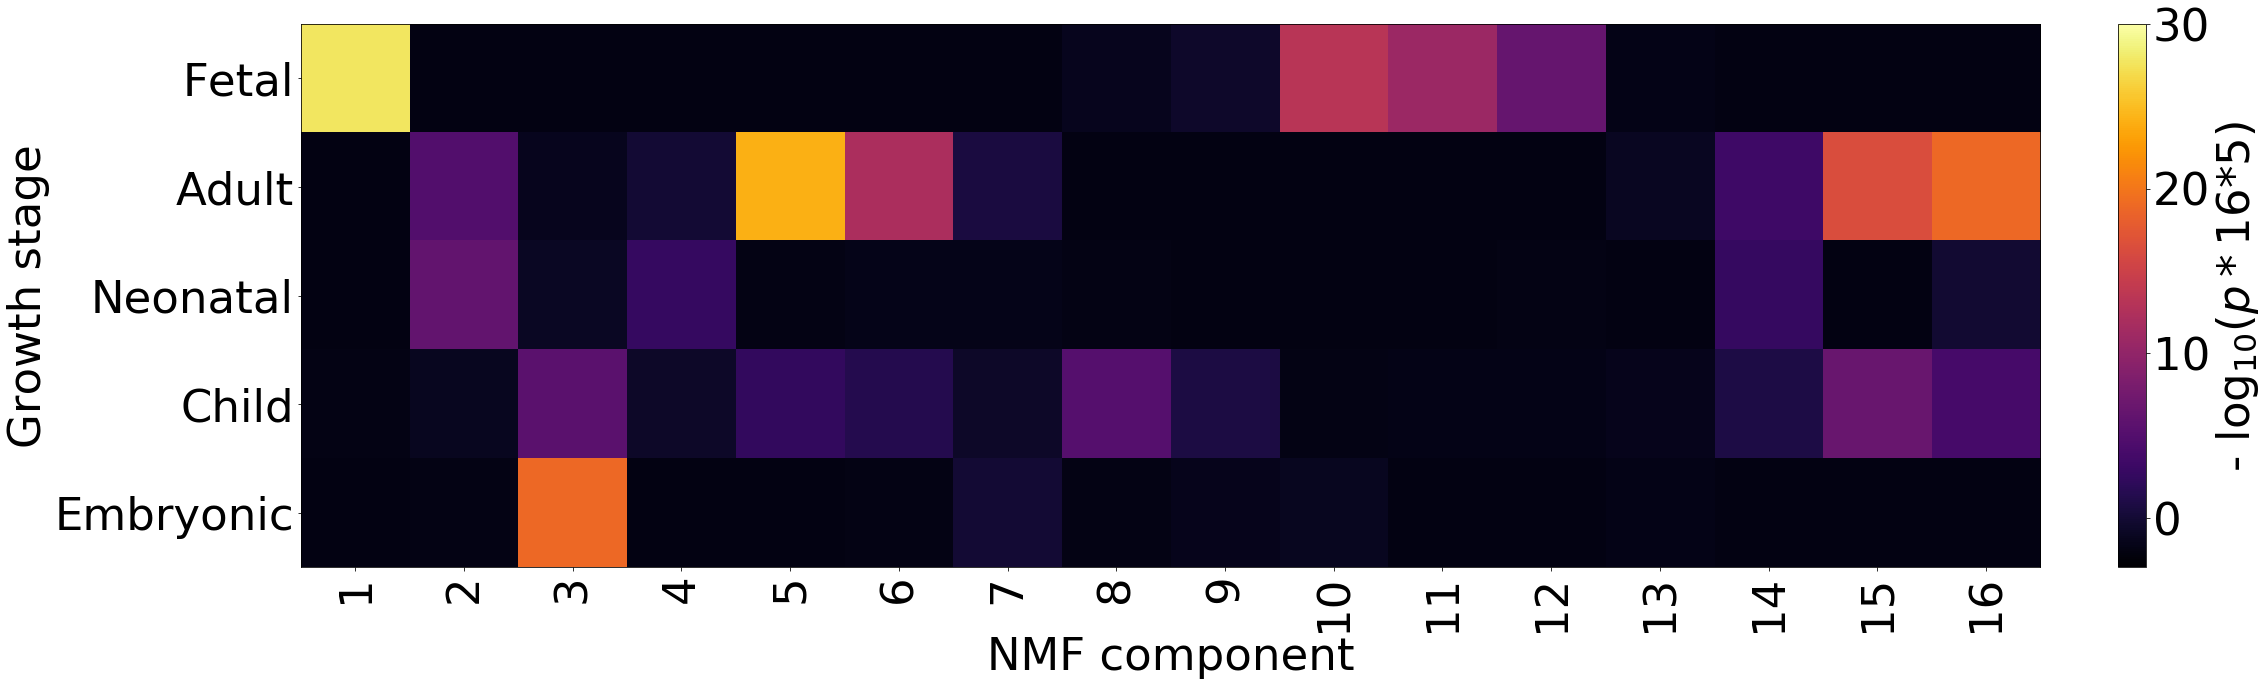

<Figure size 432x288 with 0 Axes>

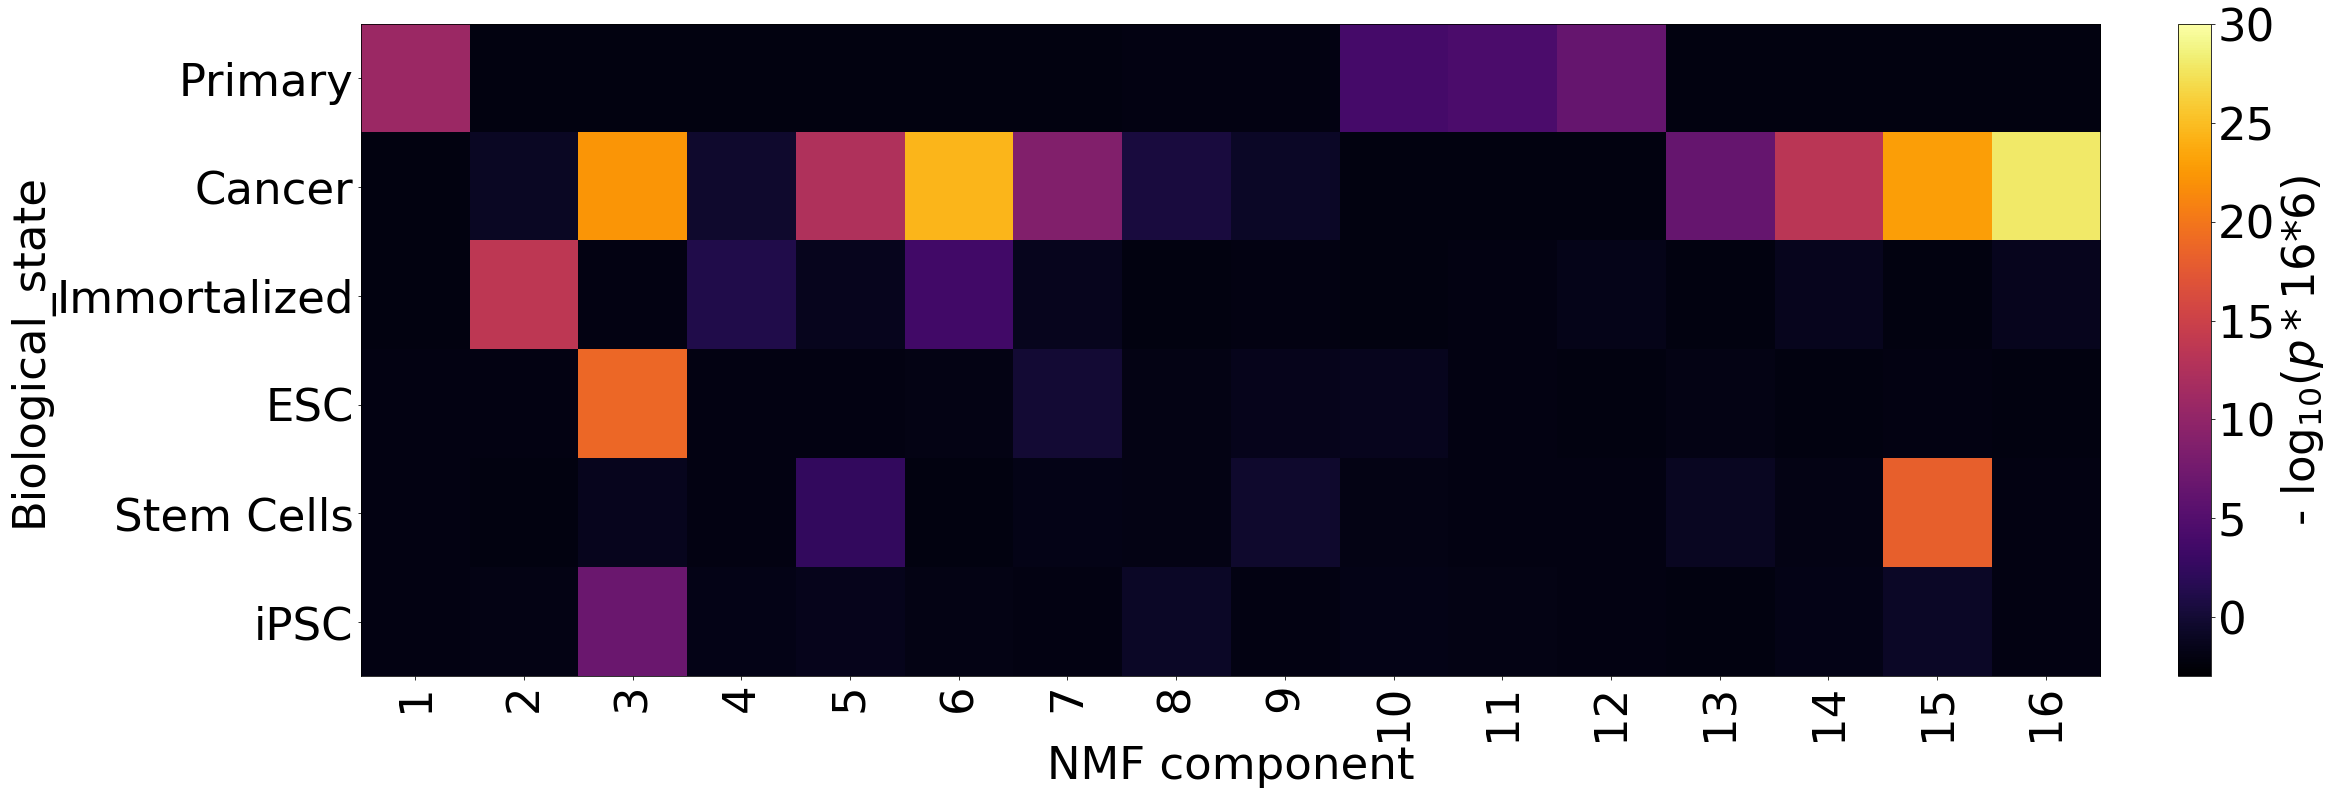

<Figure size 432x288 with 0 Axes>

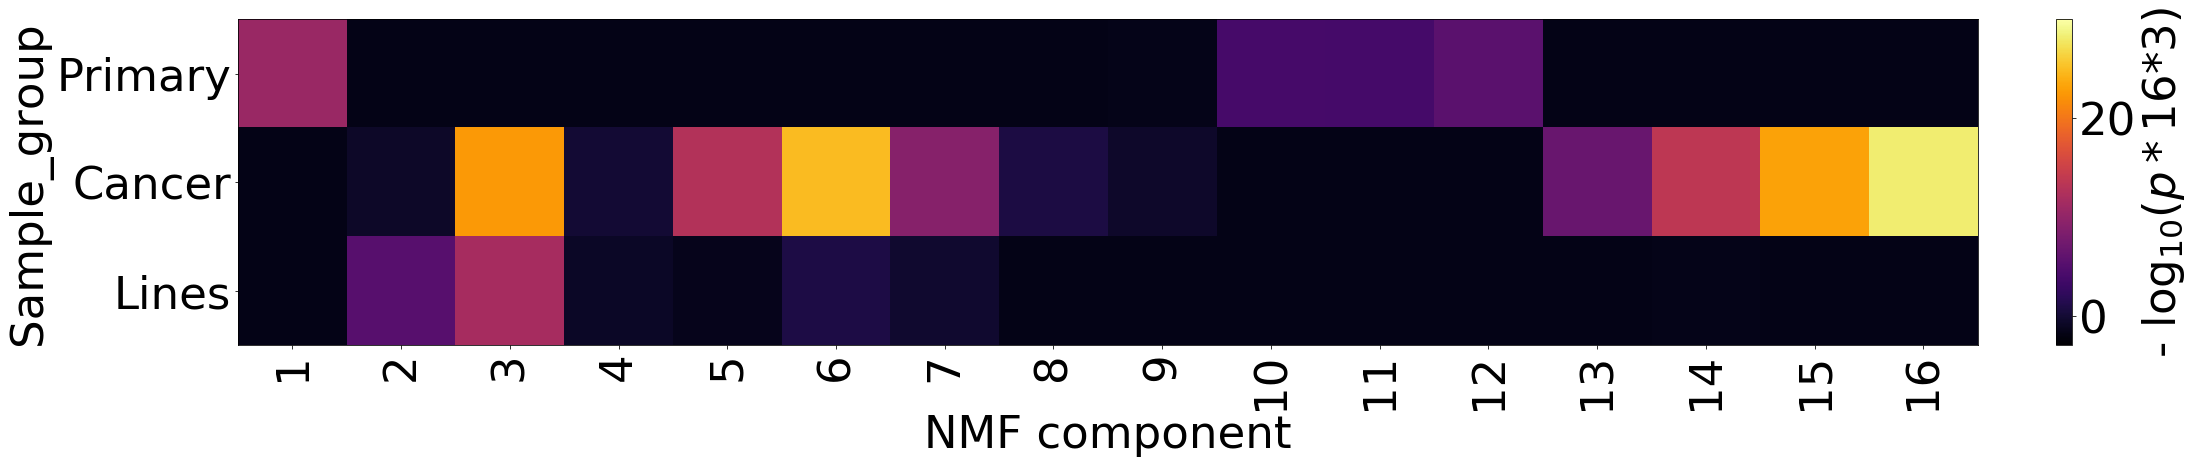

<Figure size 432x288 with 0 Axes>

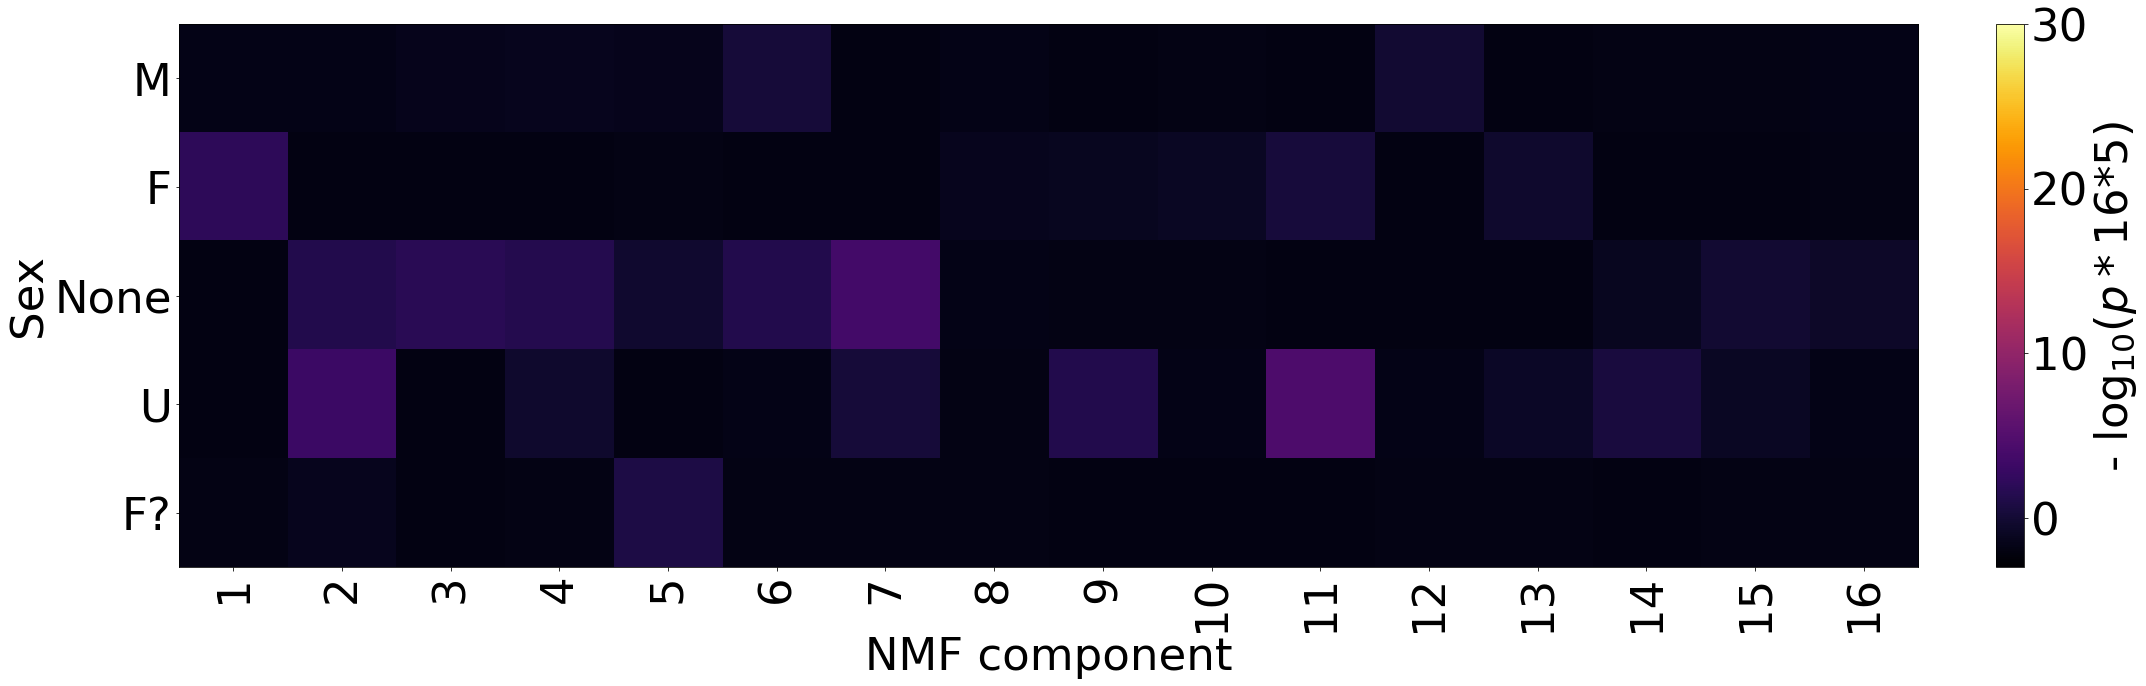

<Figure size 432x288 with 0 Axes>

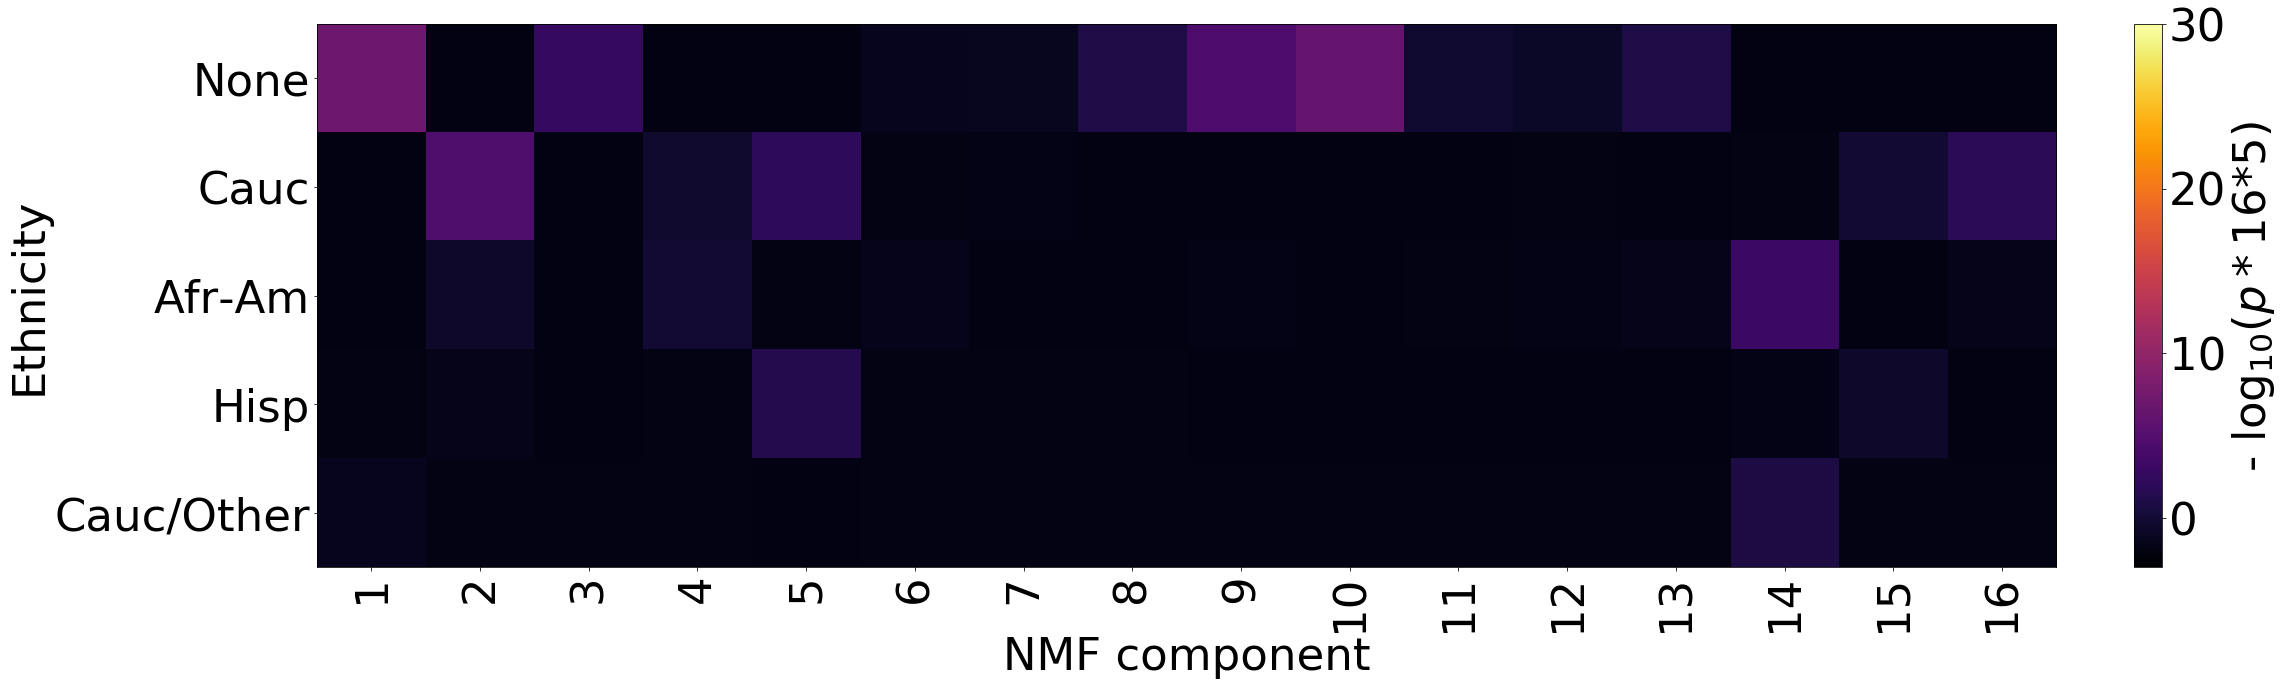

<Figure size 432x288 with 0 Axes>

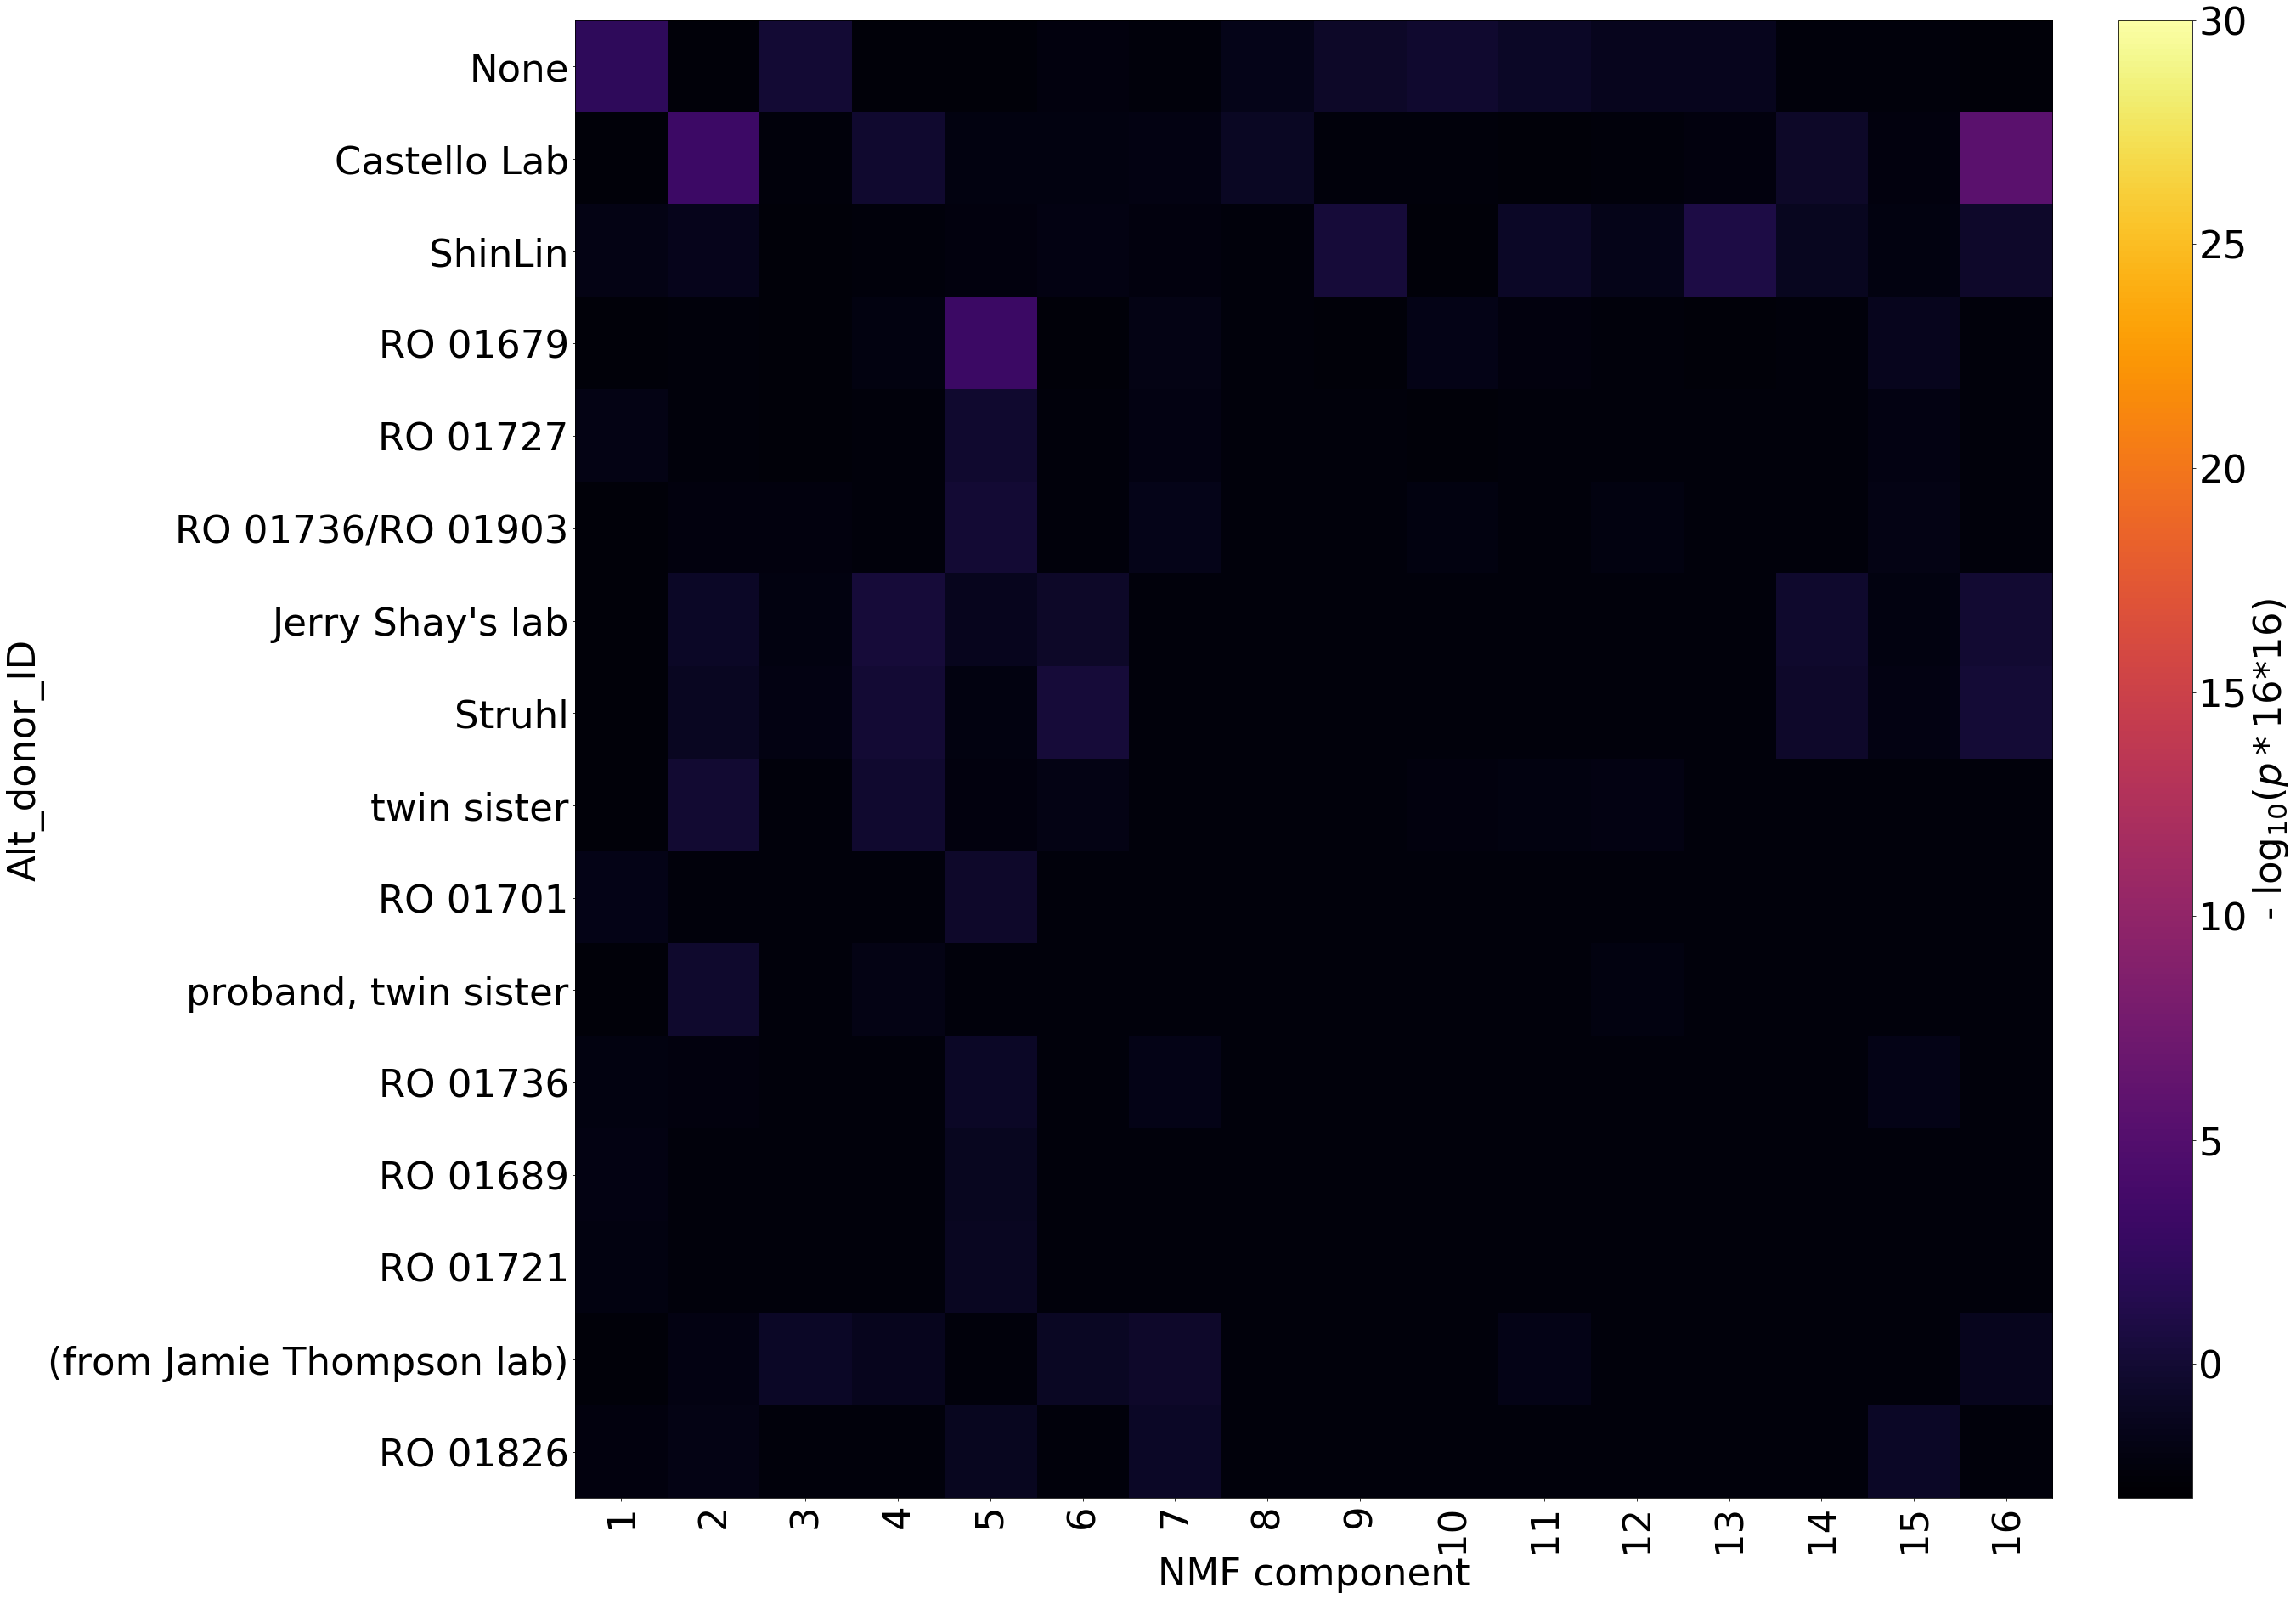

<Figure size 432x288 with 0 Axes>

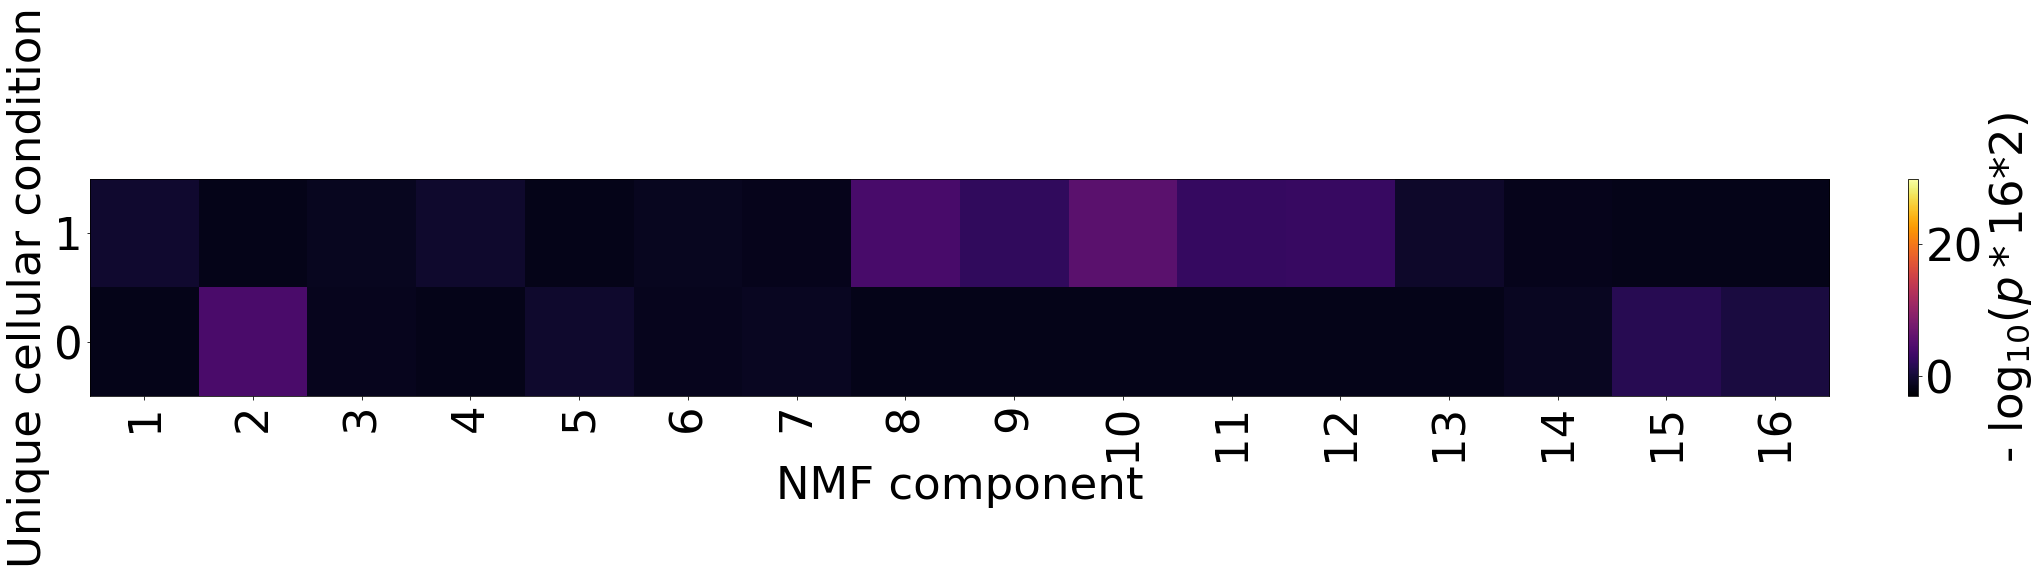

<Figure size 432x288 with 0 Axes>

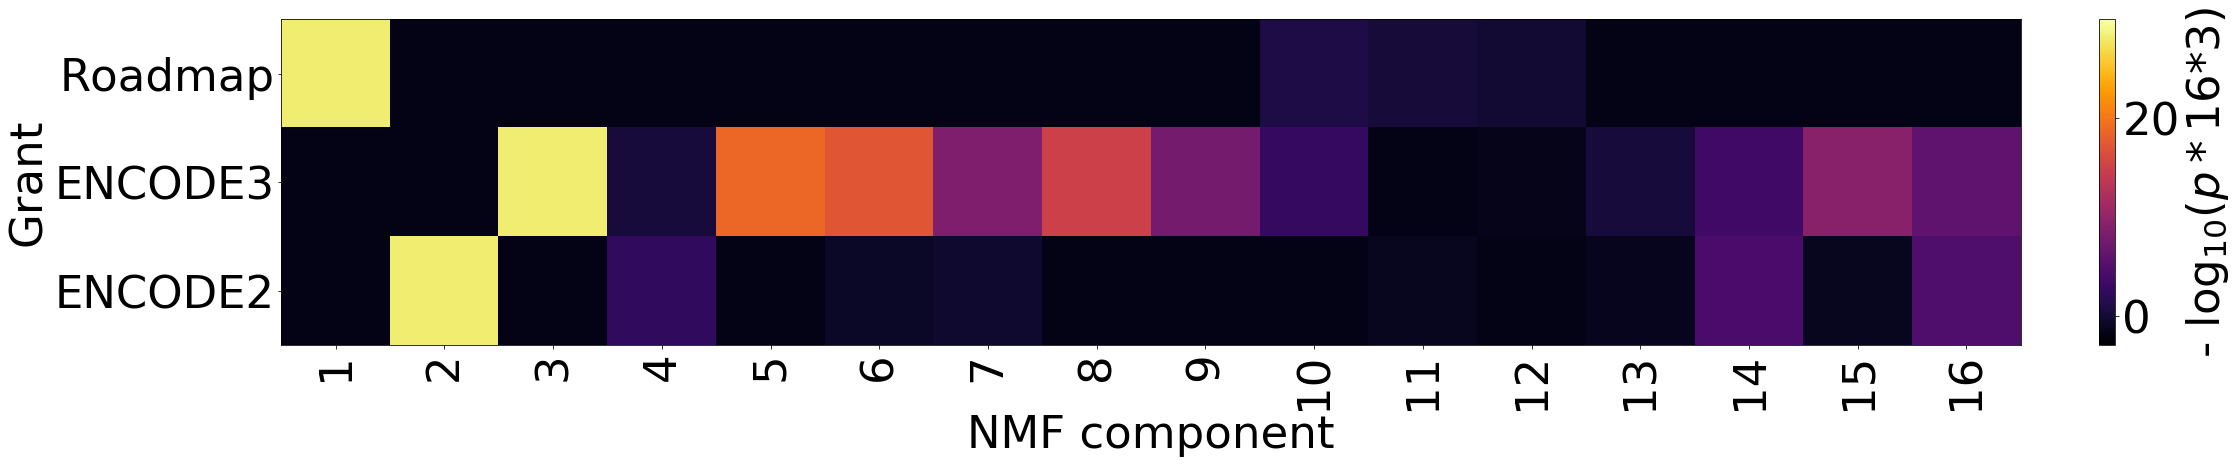

<Figure size 432x288 with 0 Axes>

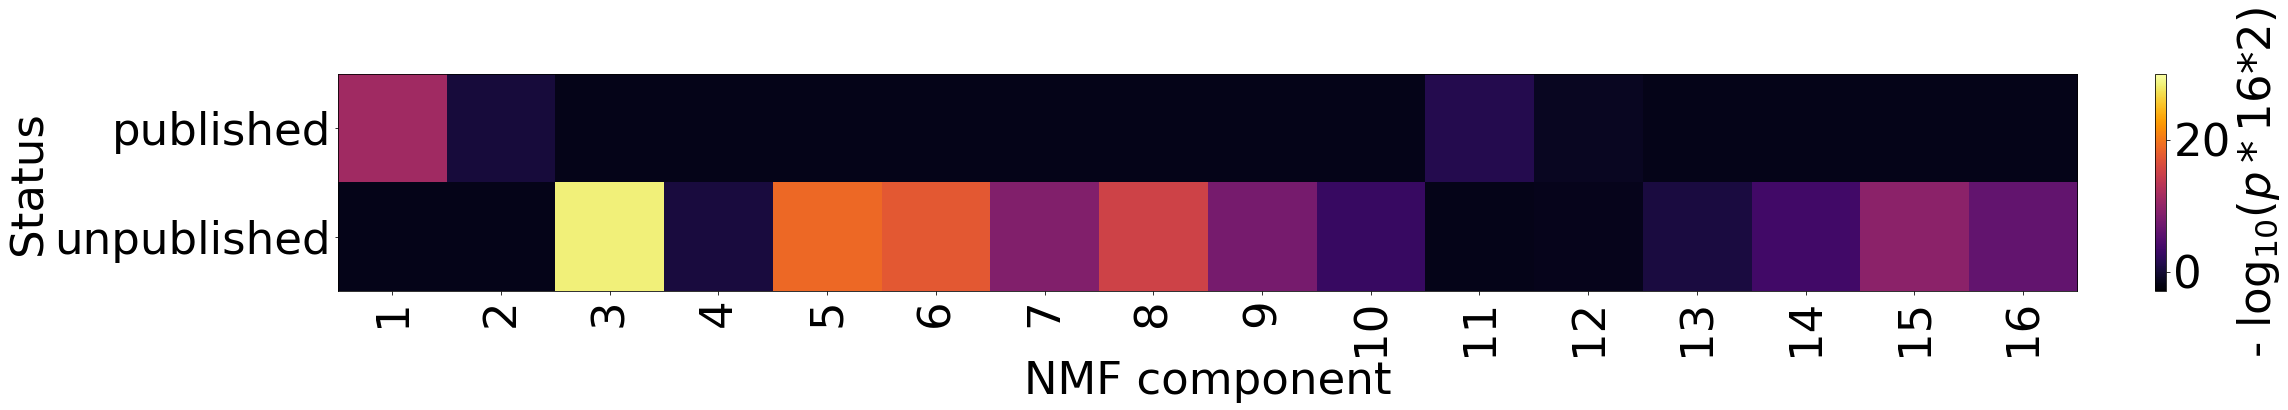

<Figure size 432x288 with 0 Axes>

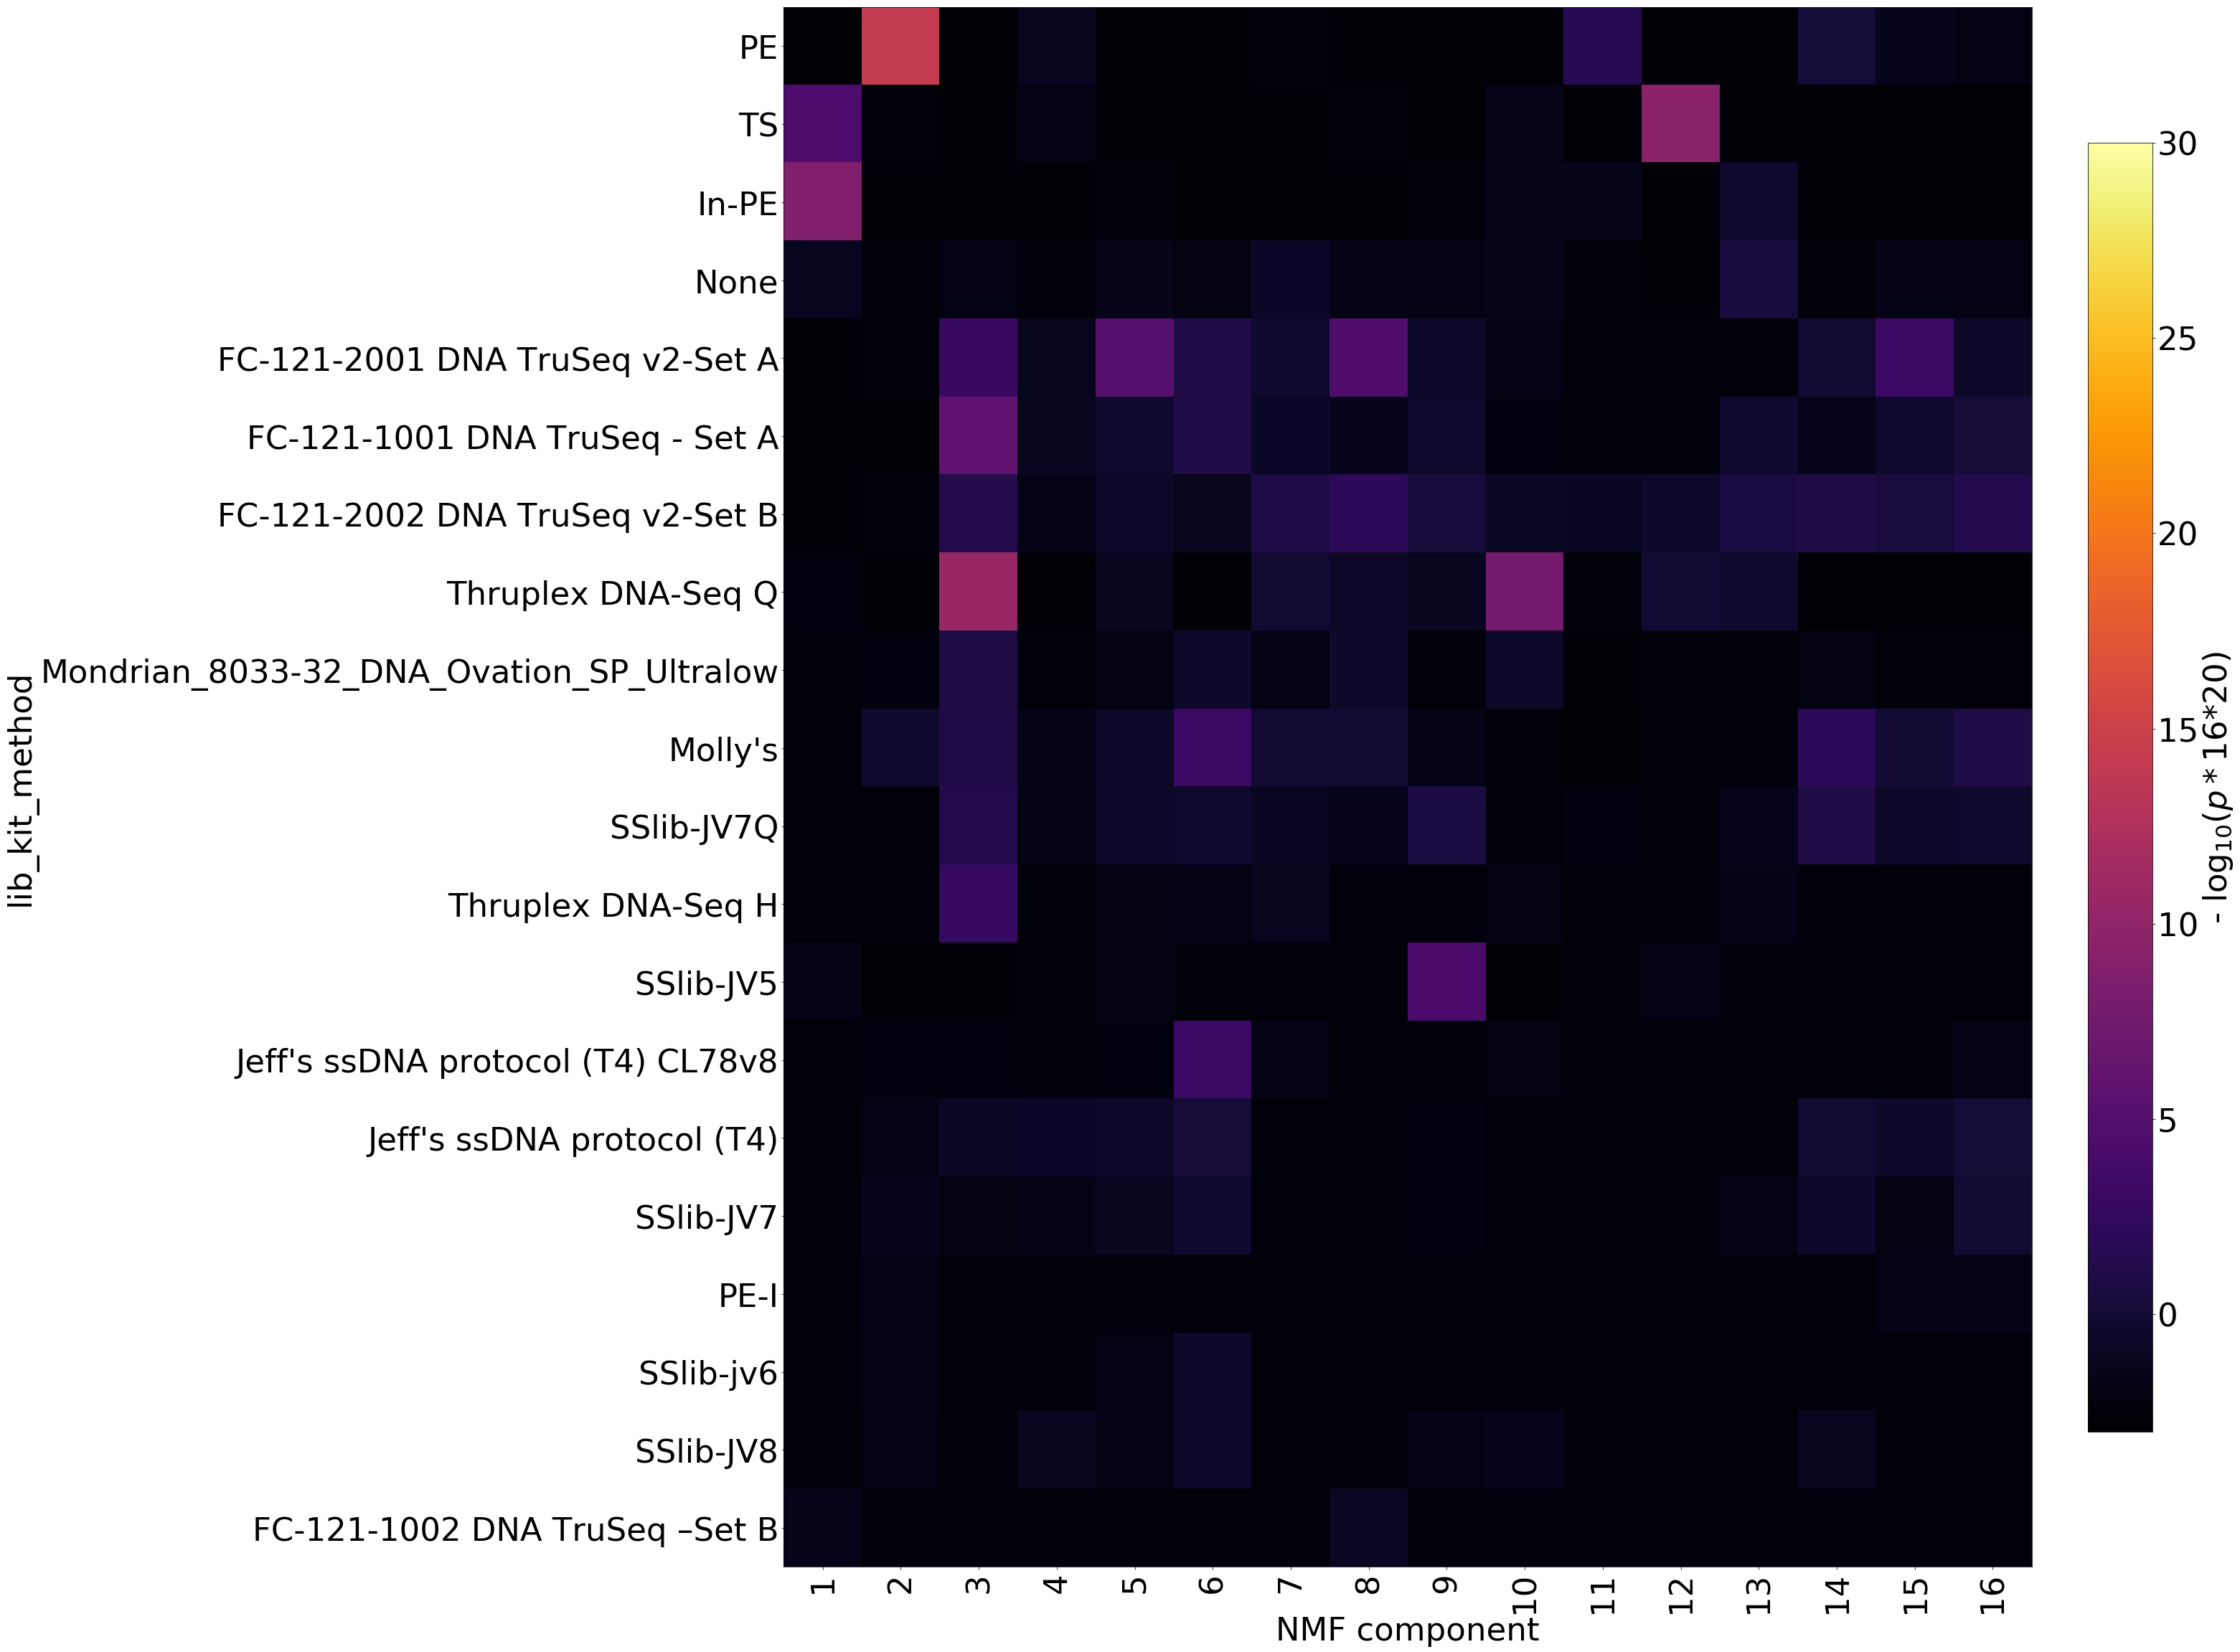

<Figure size 432x288 with 0 Axes>

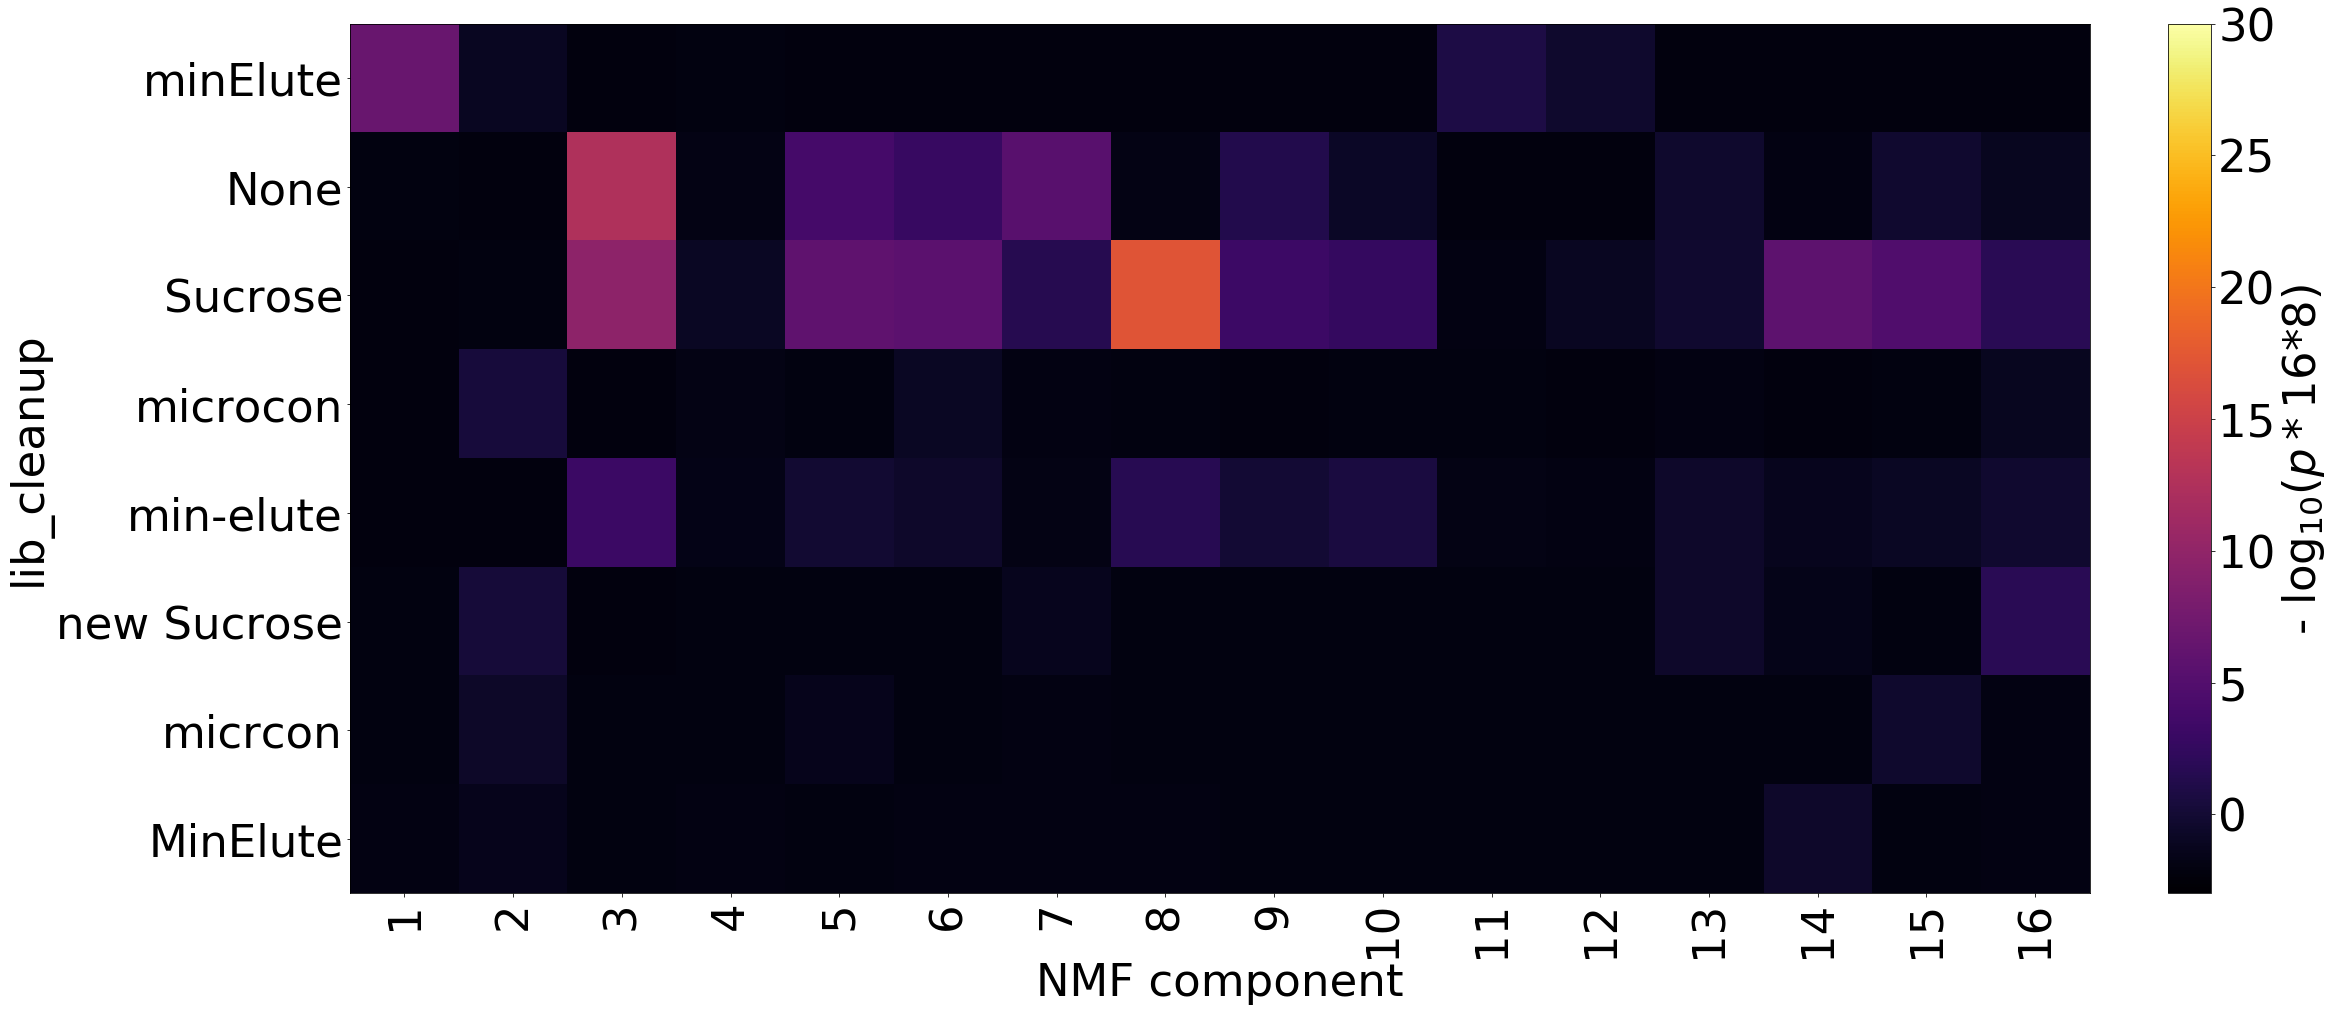

<Figure size 432x288 with 0 Axes>

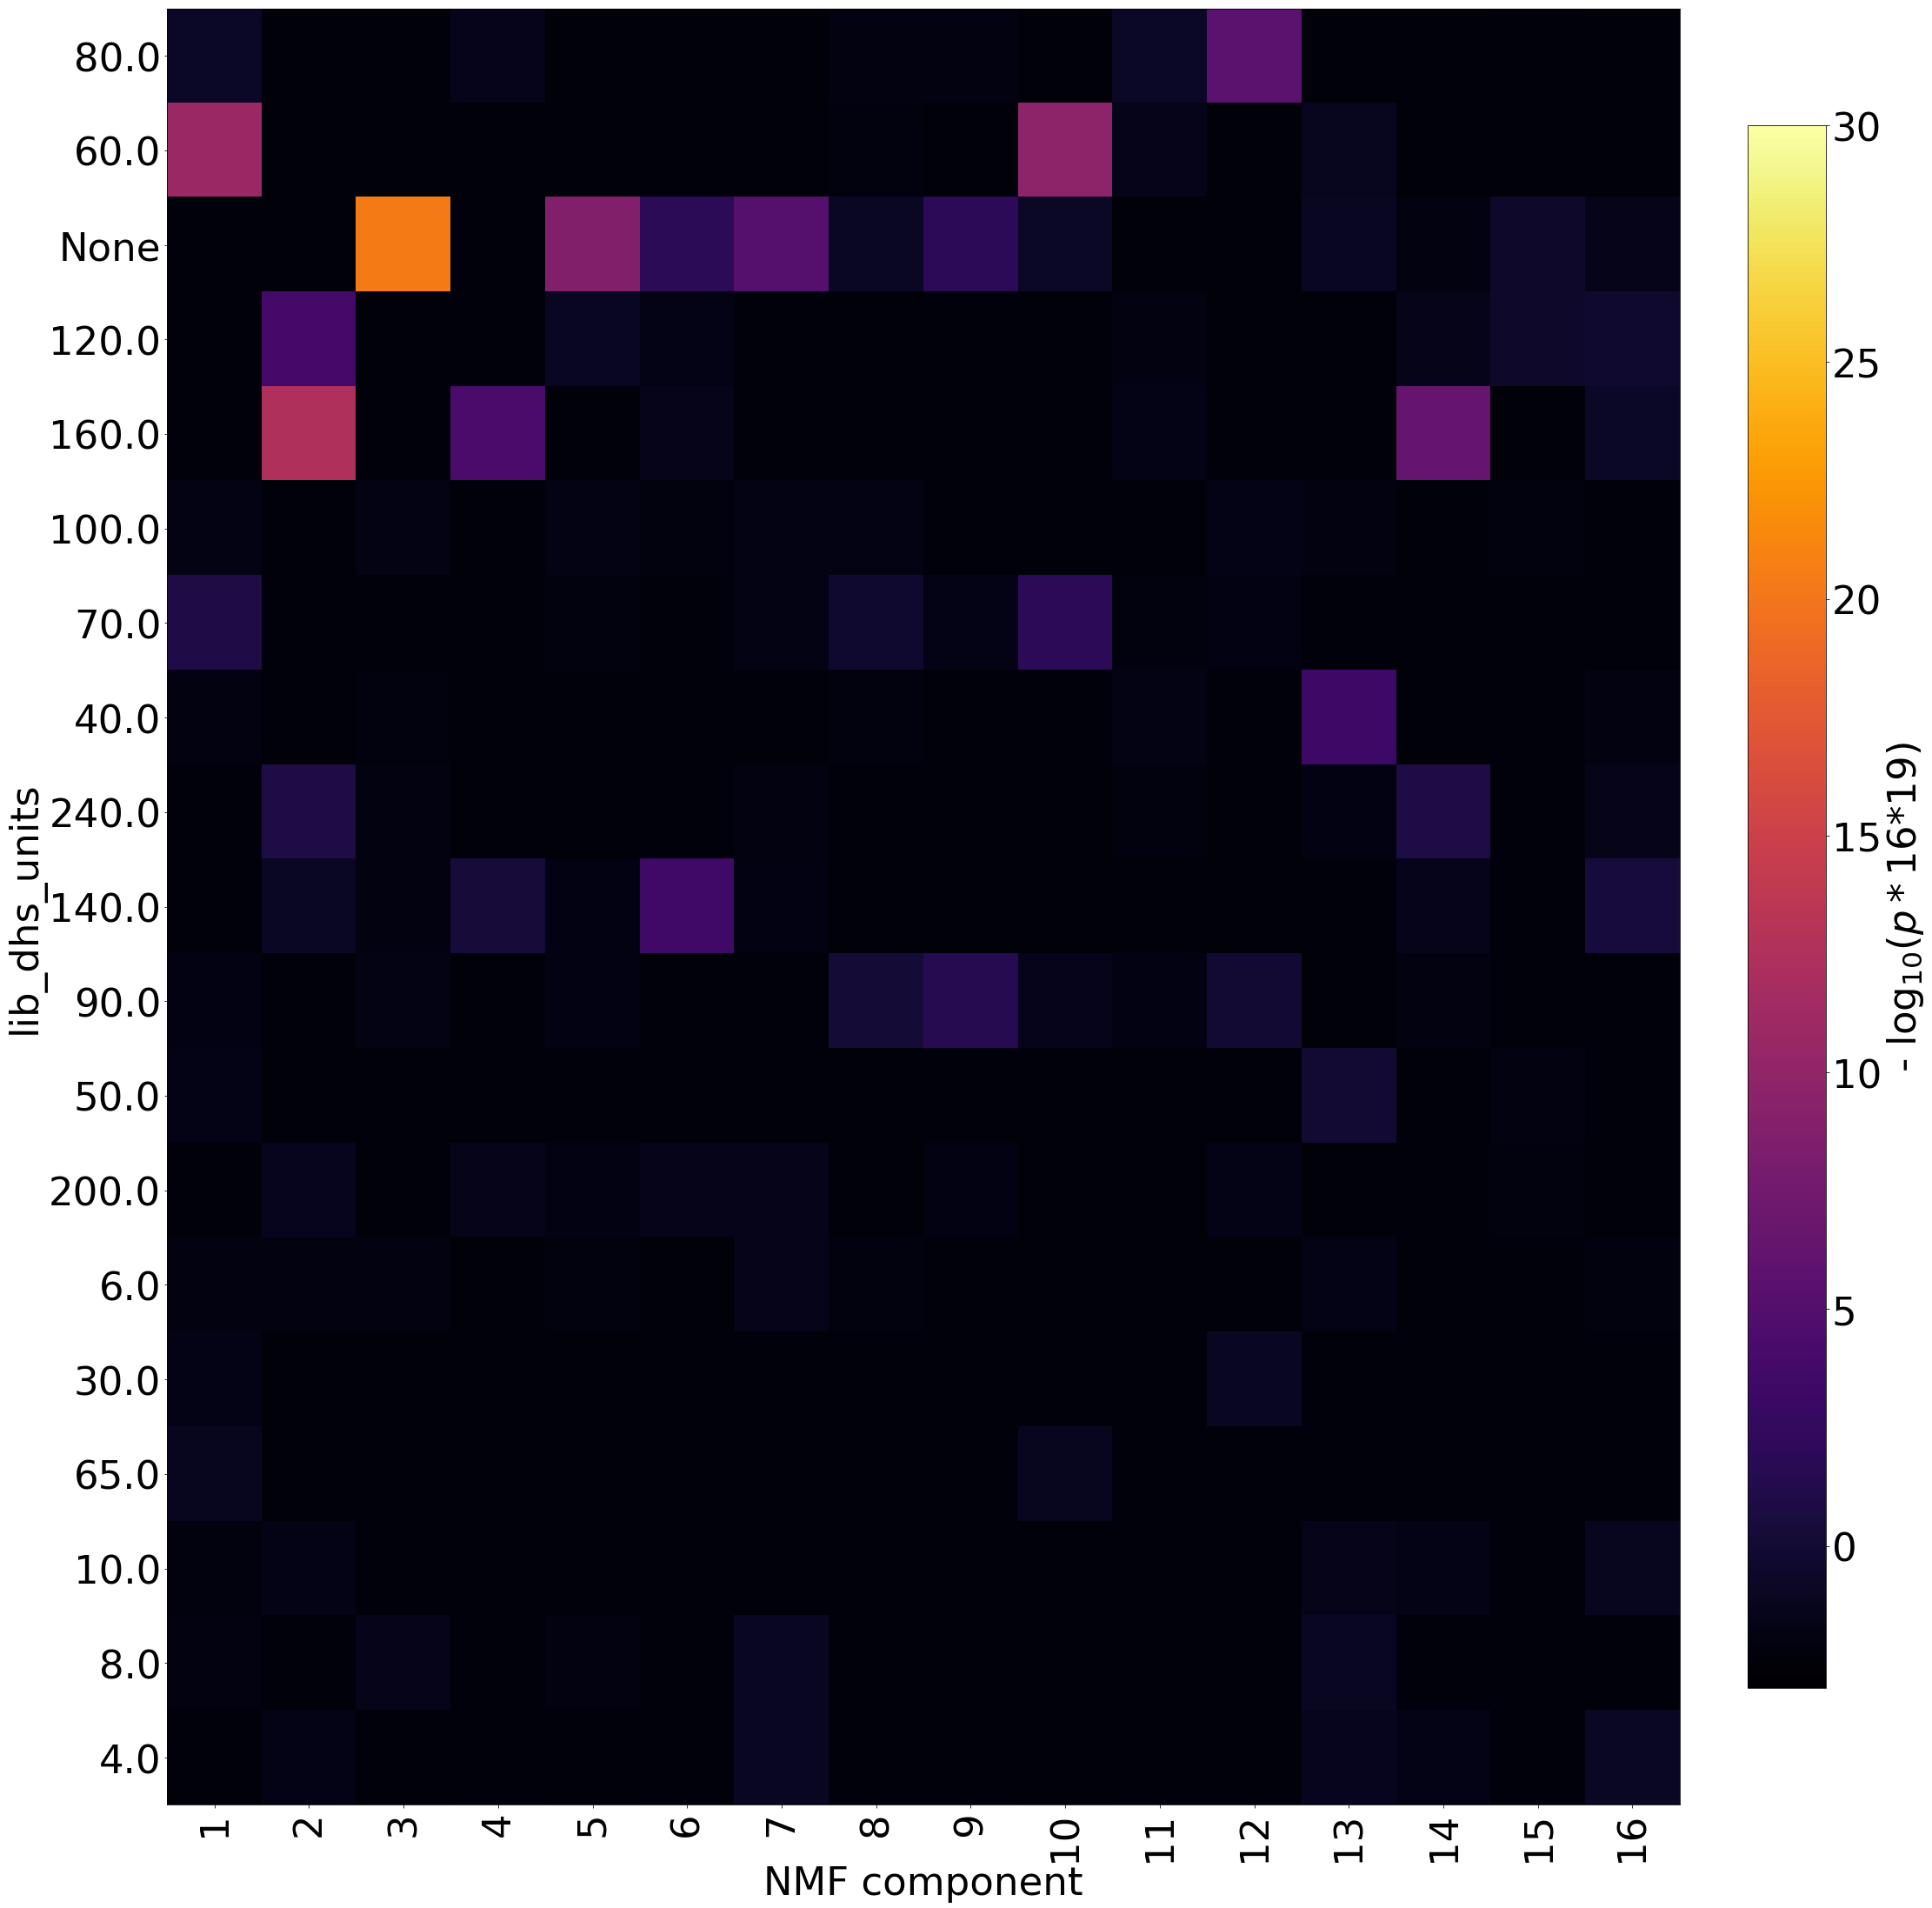

<Figure size 432x288 with 0 Axes>

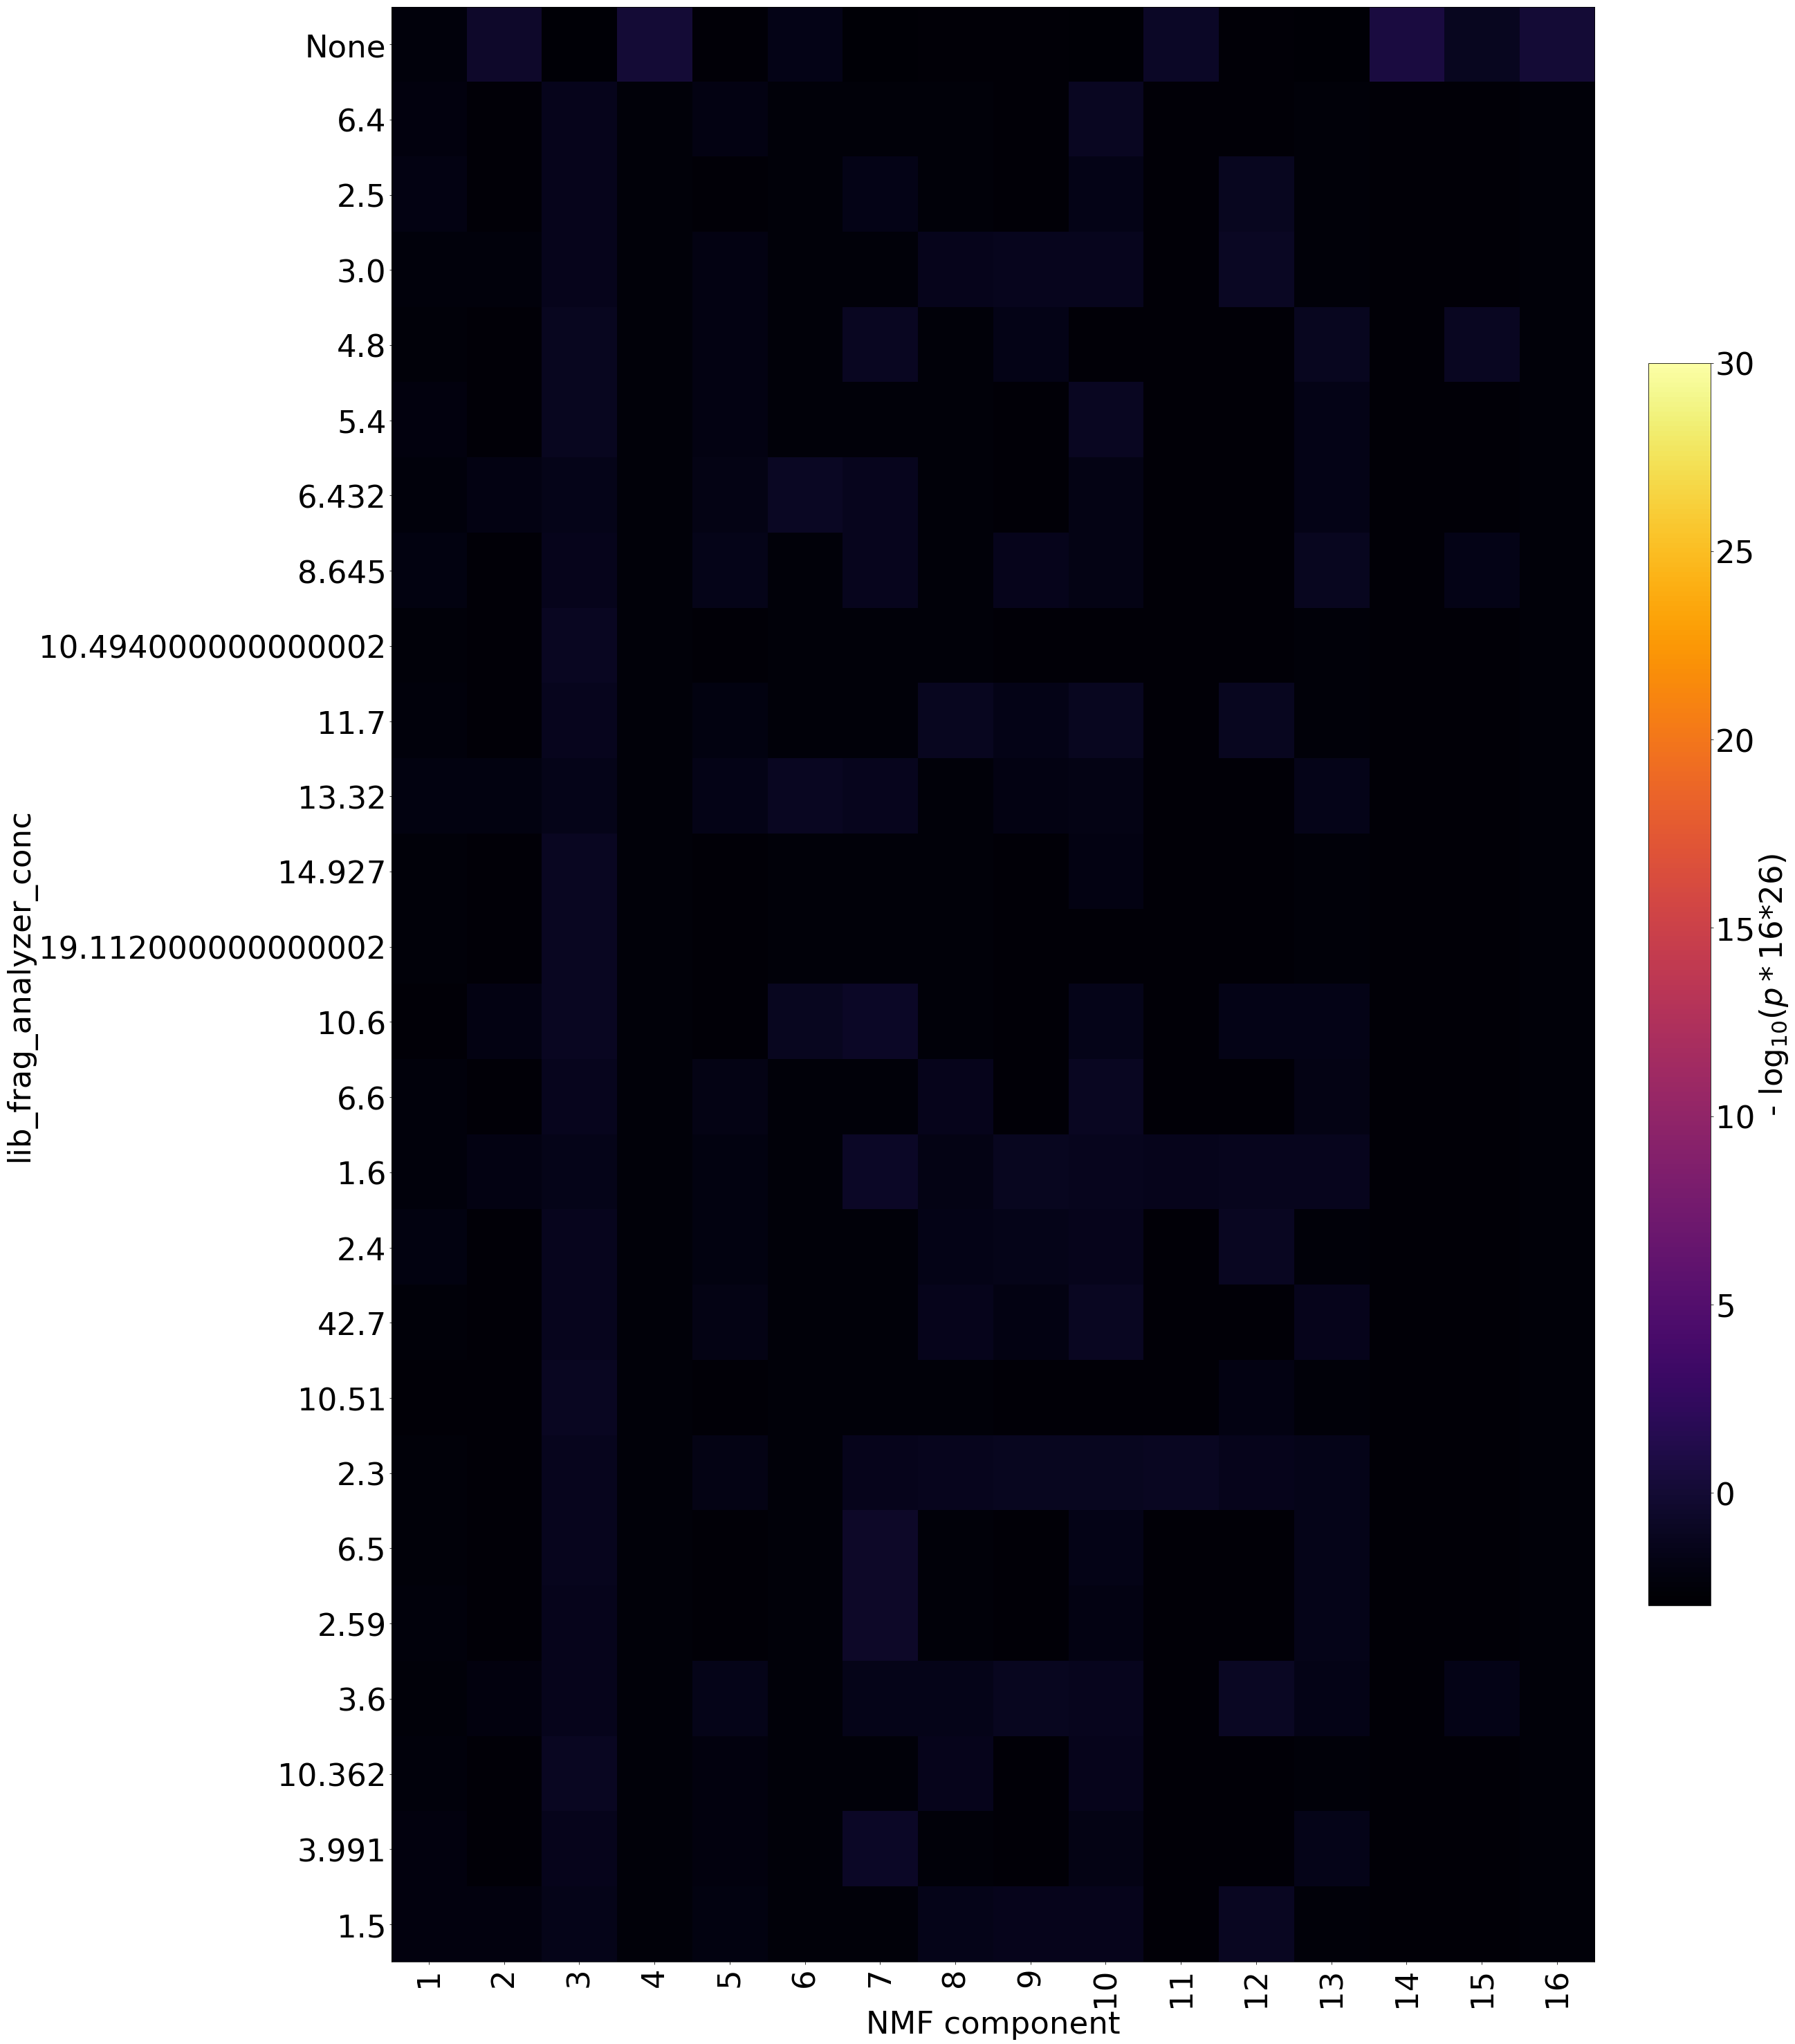

<Figure size 432x288 with 0 Axes>

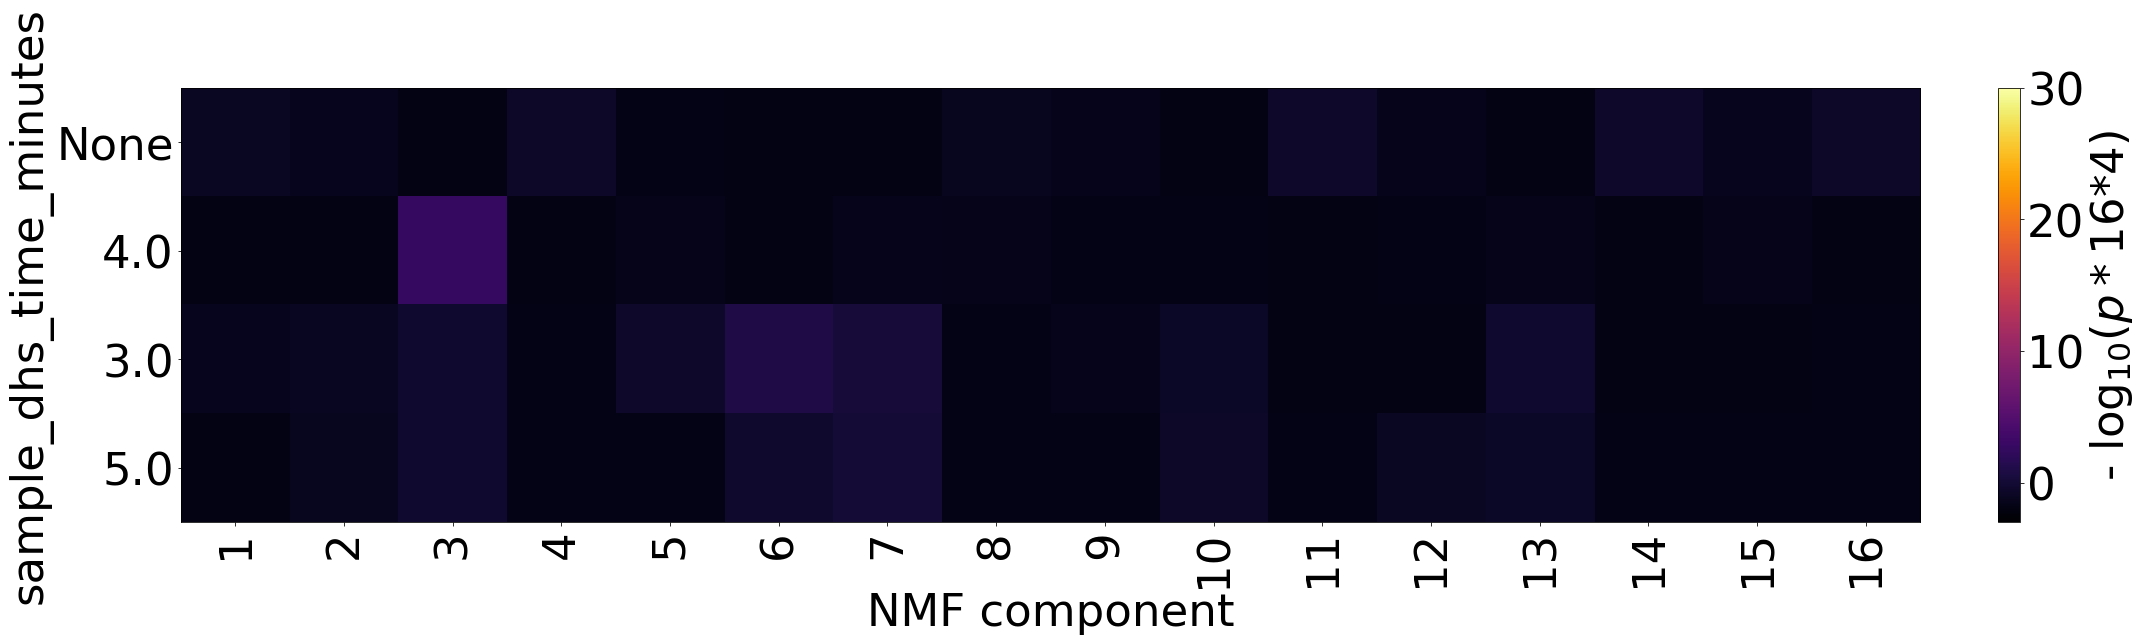

<Figure size 432x288 with 0 Axes>

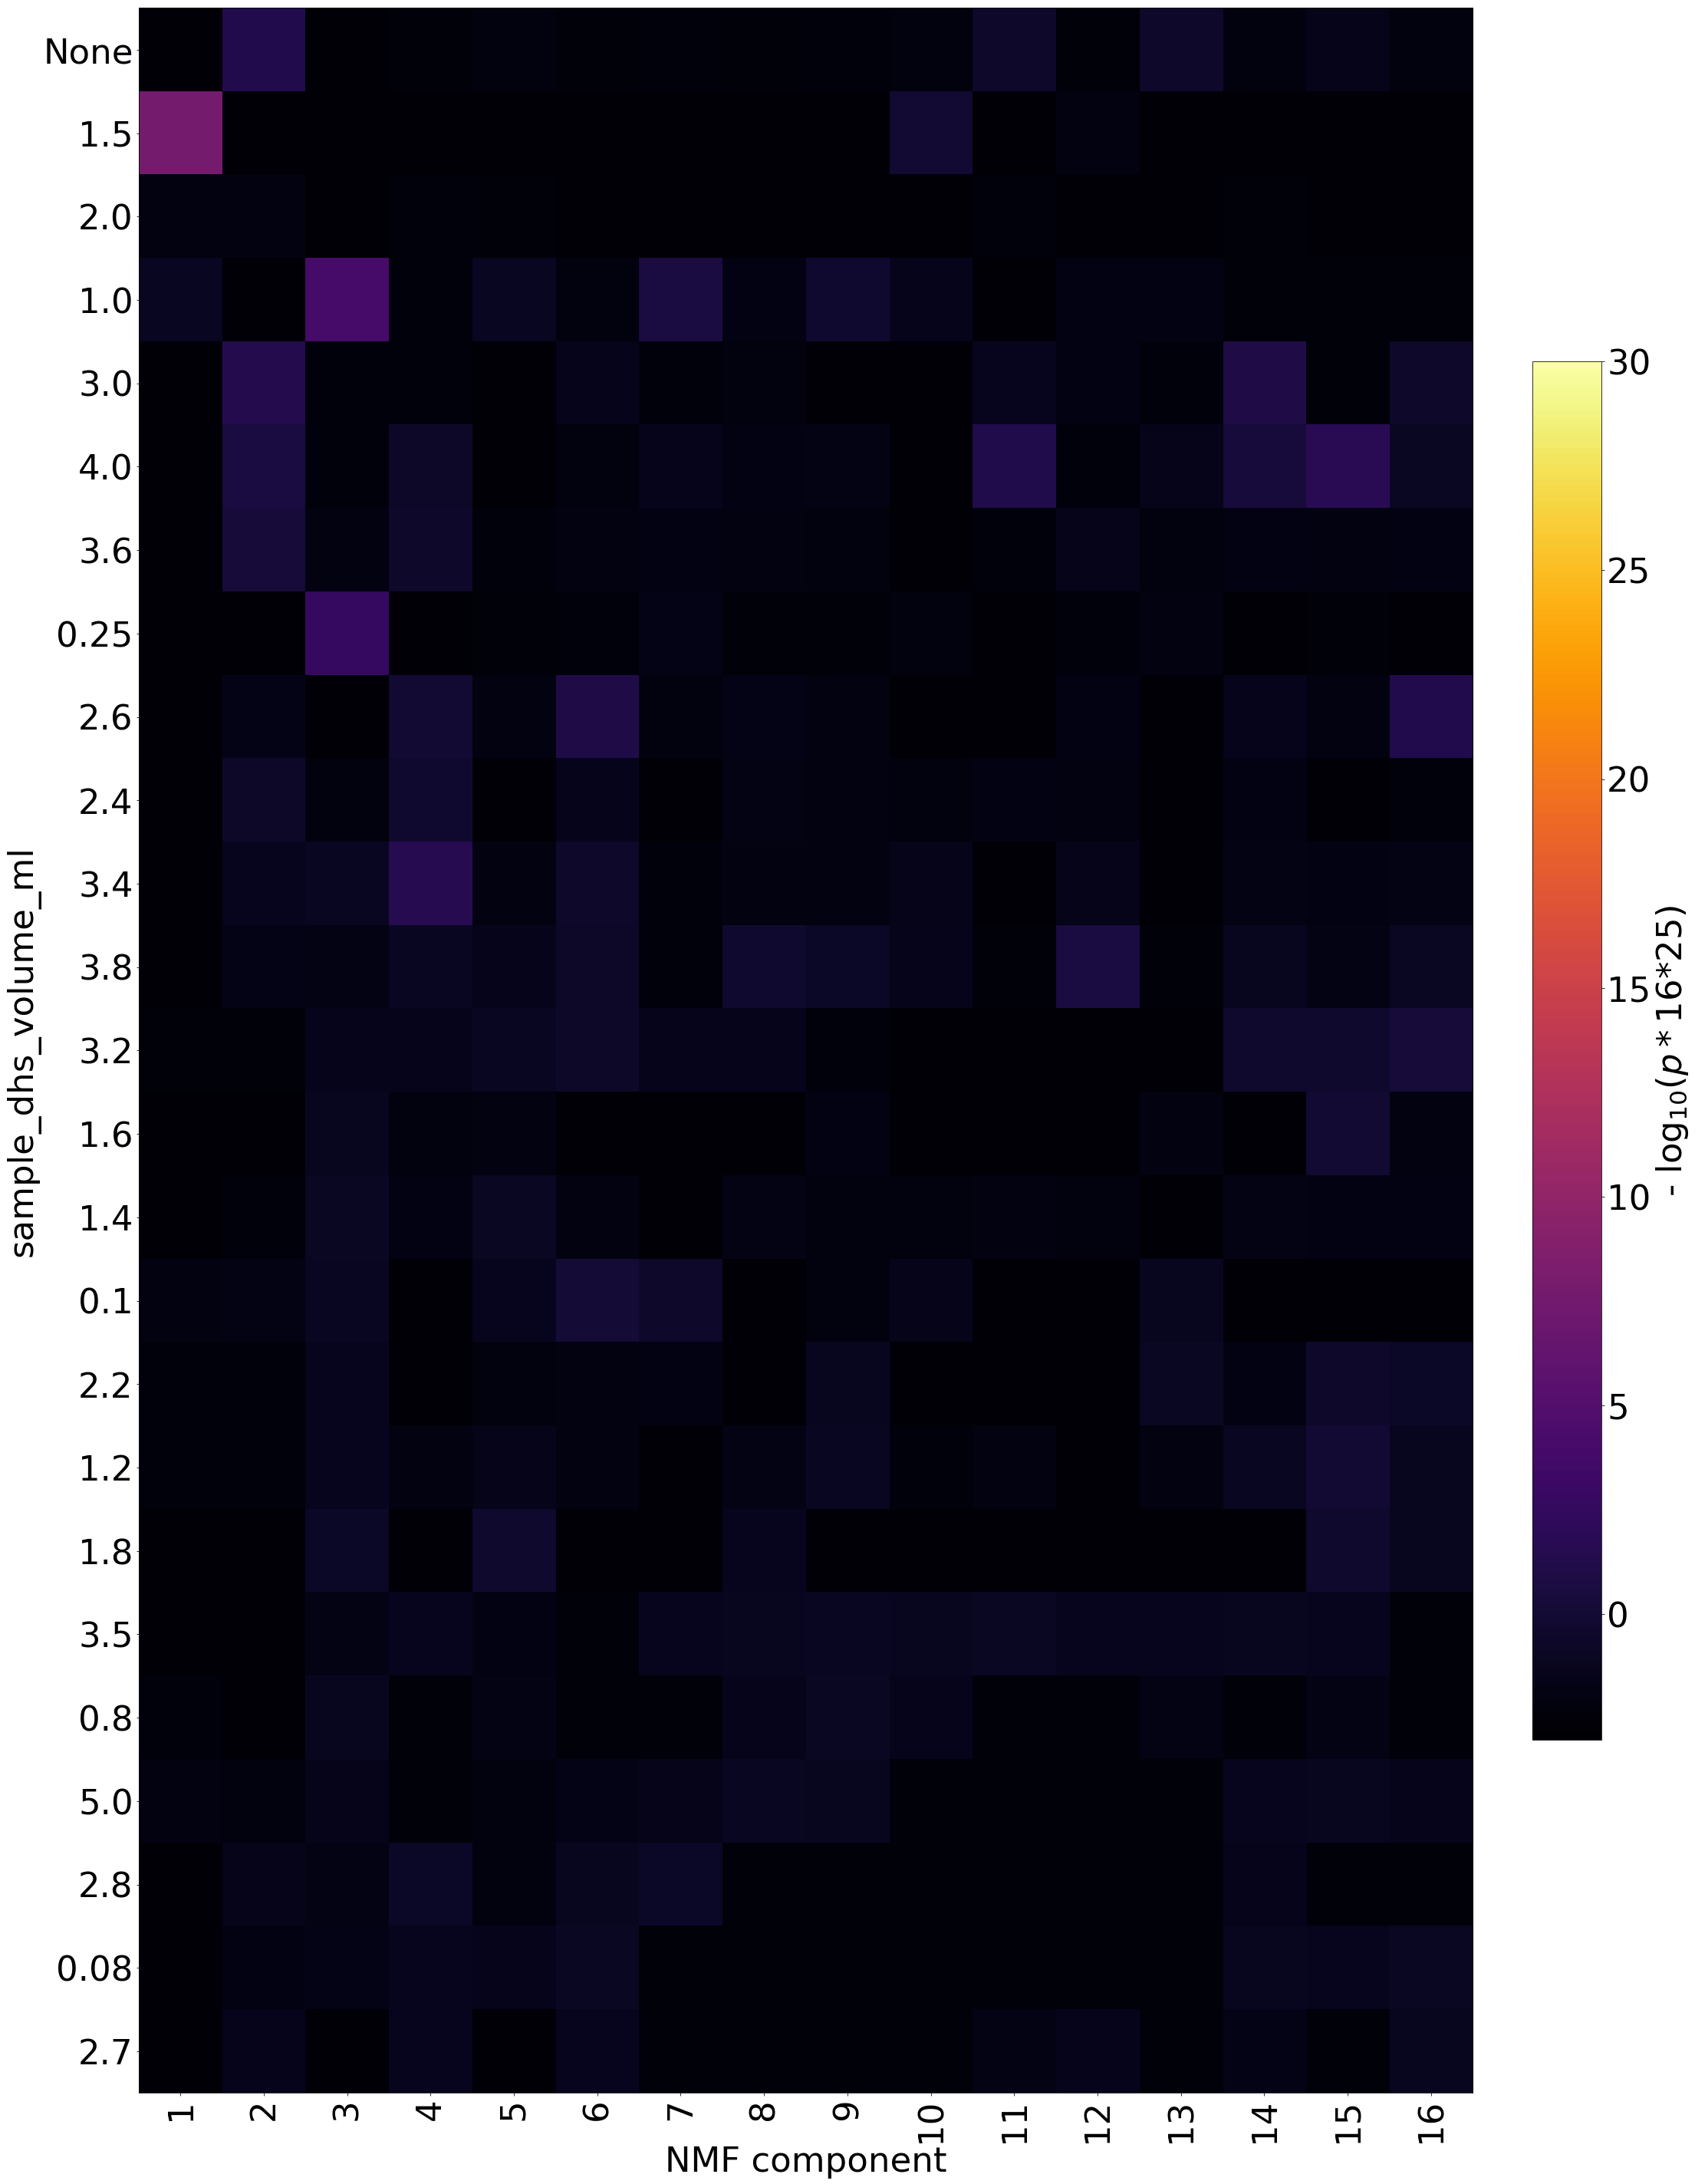

<Figure size 432x288 with 0 Axes>

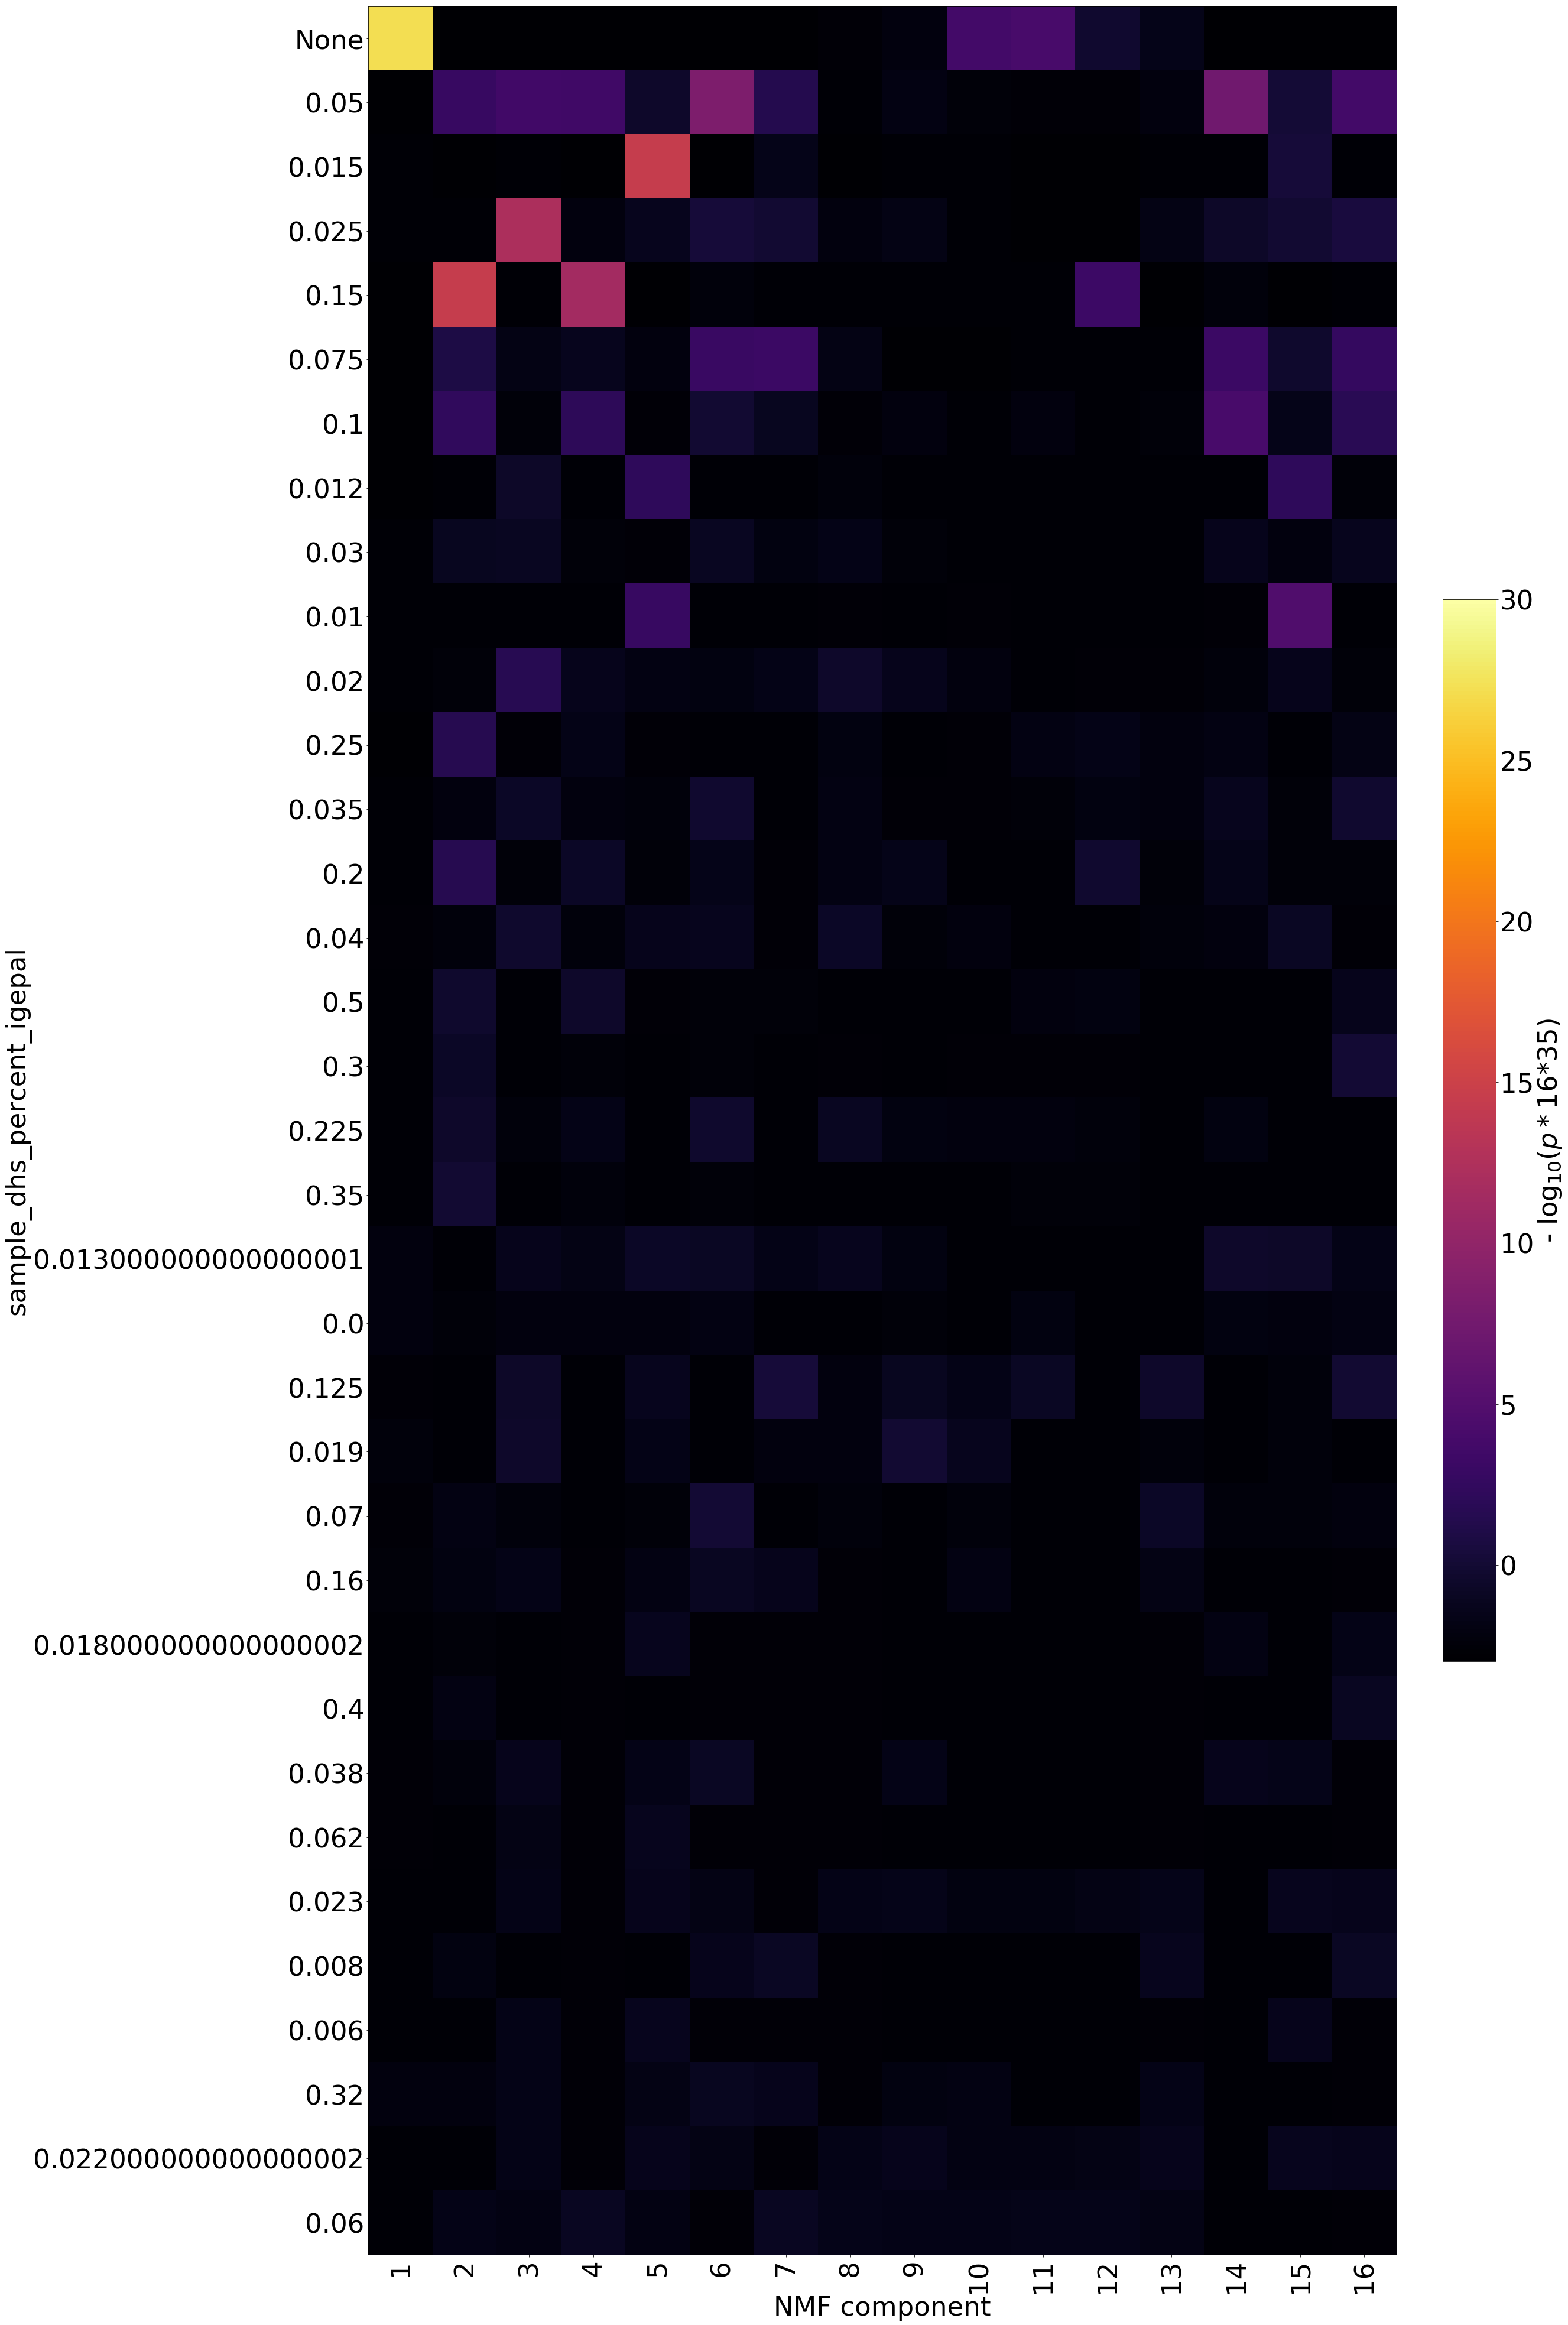

<Figure size 432x288 with 0 Axes>

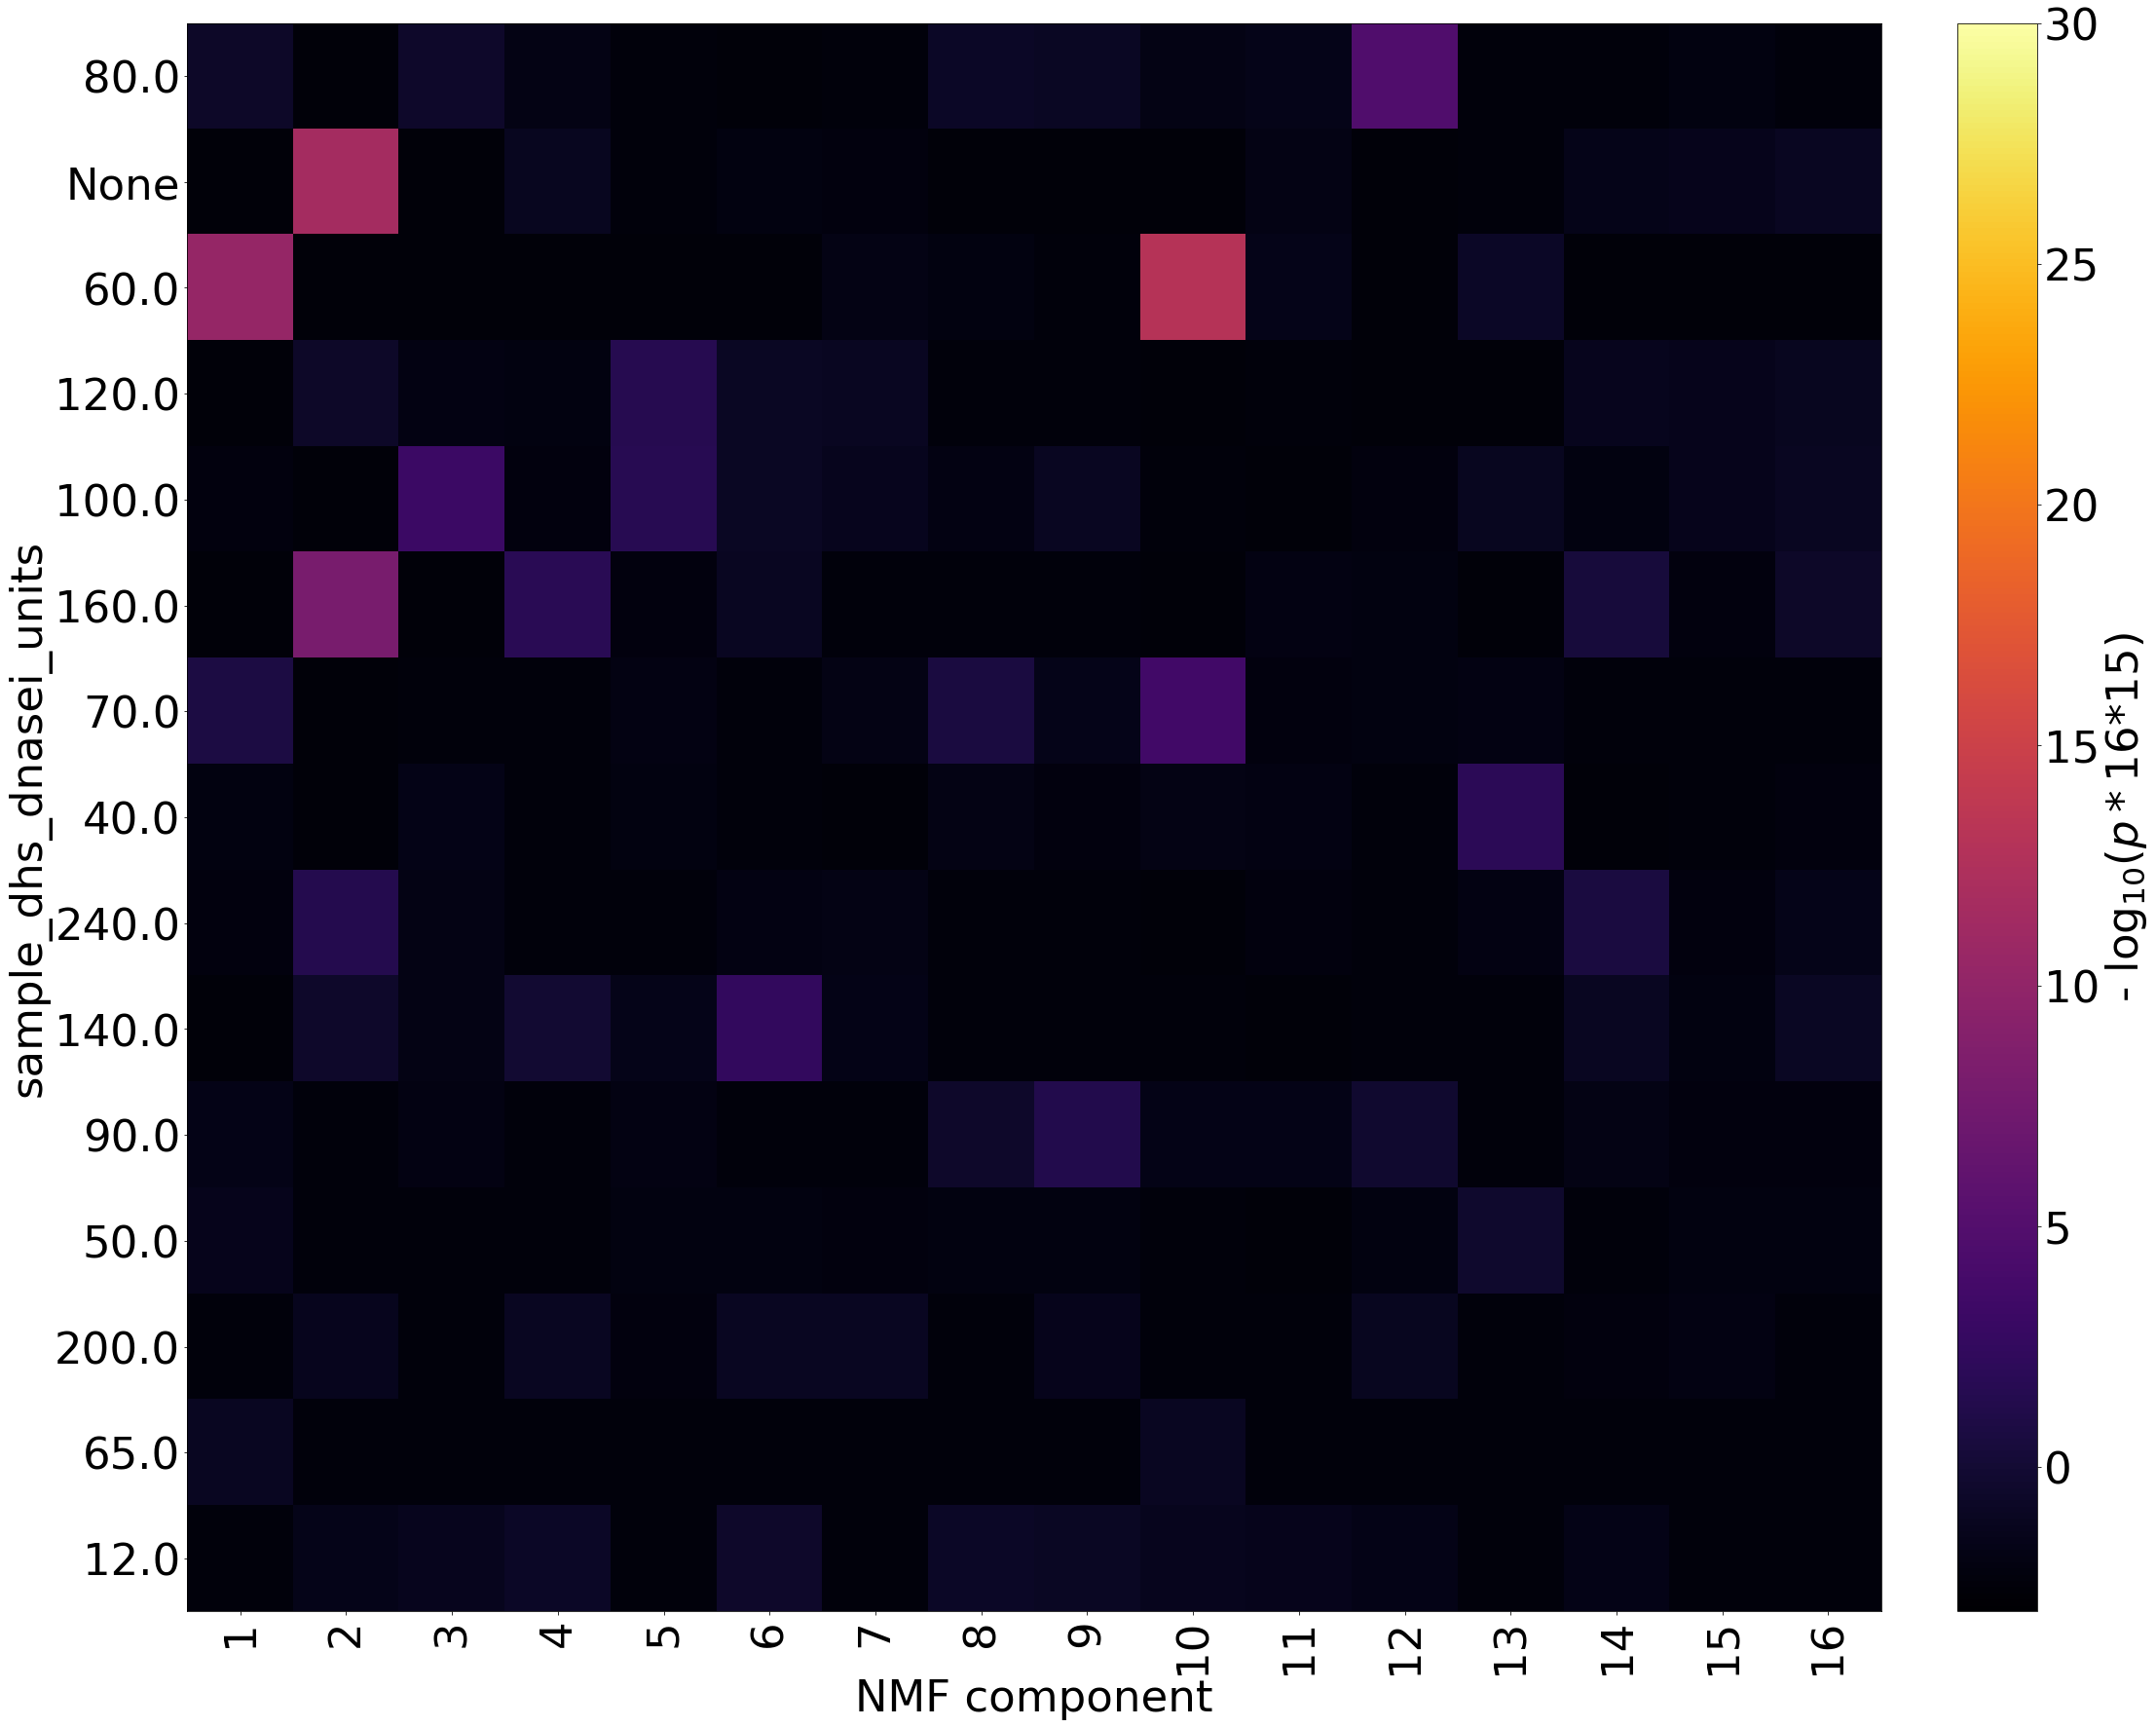

<Figure size 432x288 with 0 Axes>

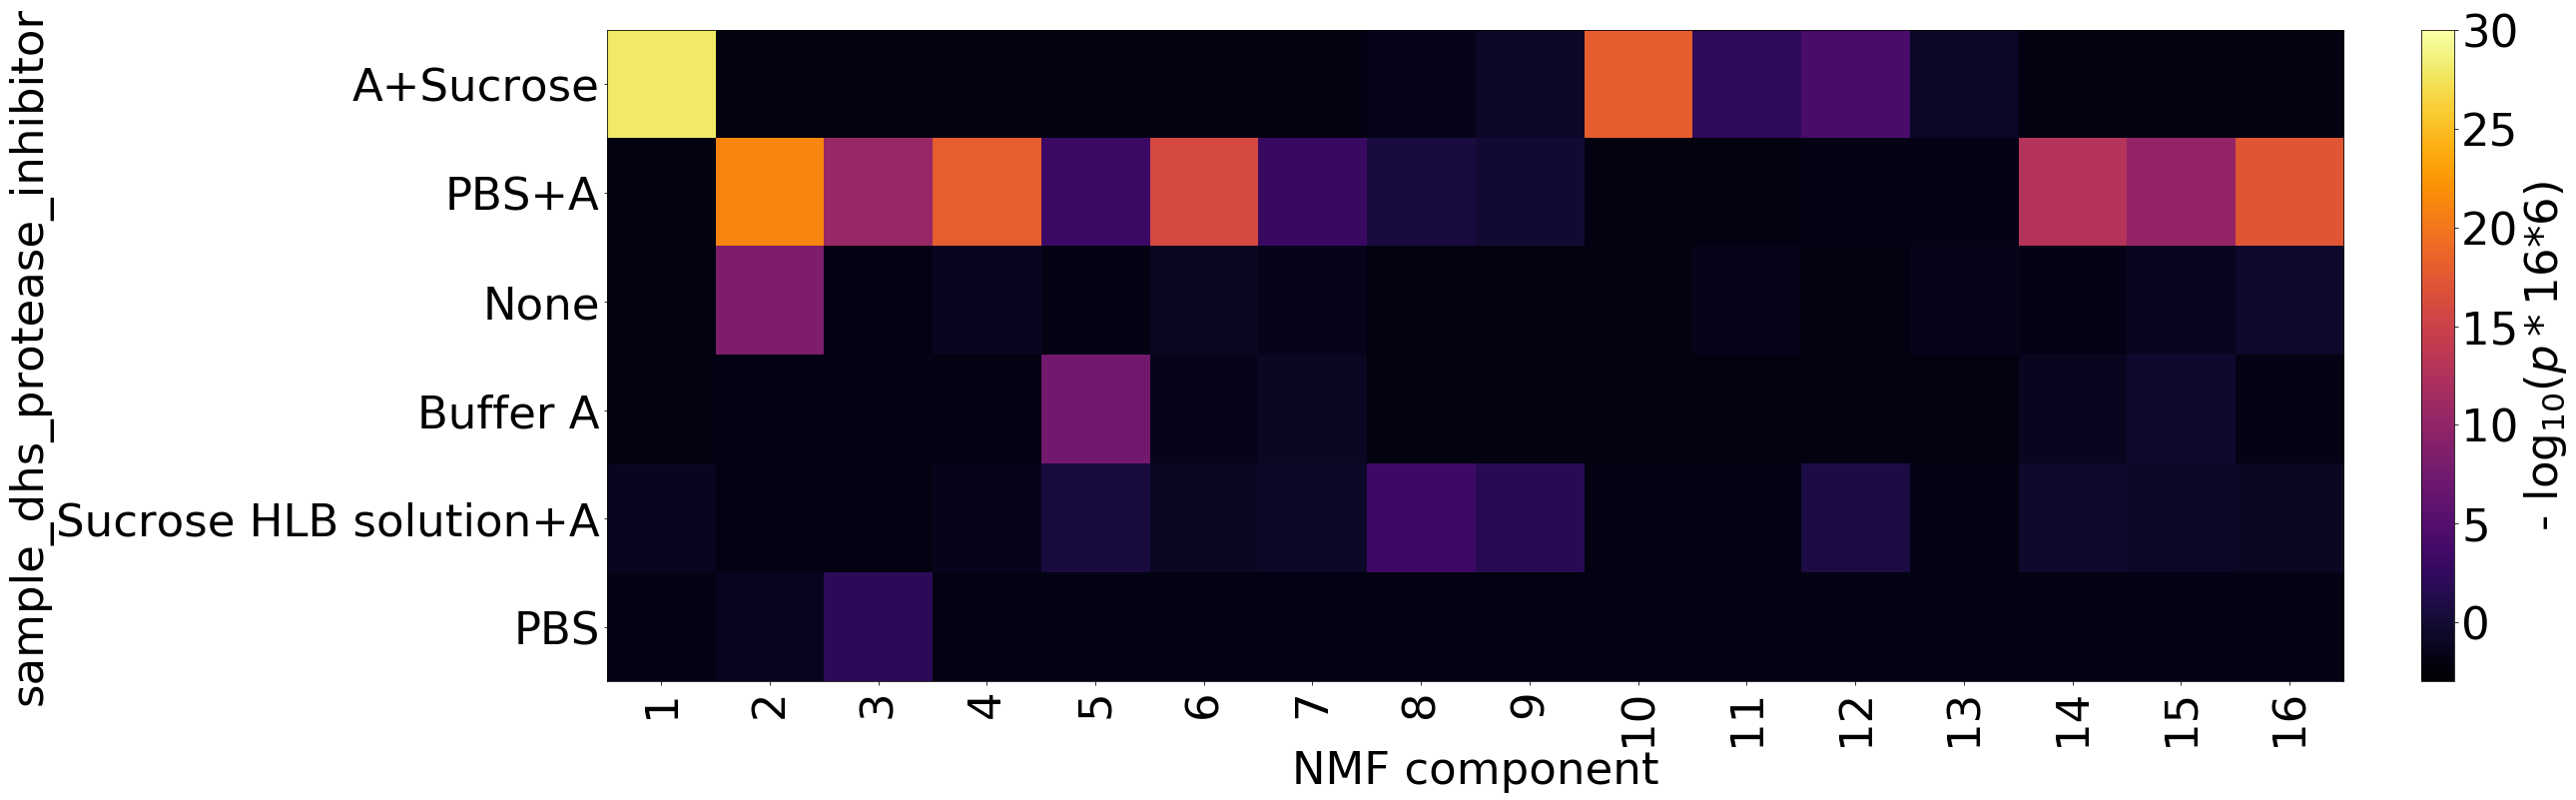

<Figure size 432x288 with 0 Axes>

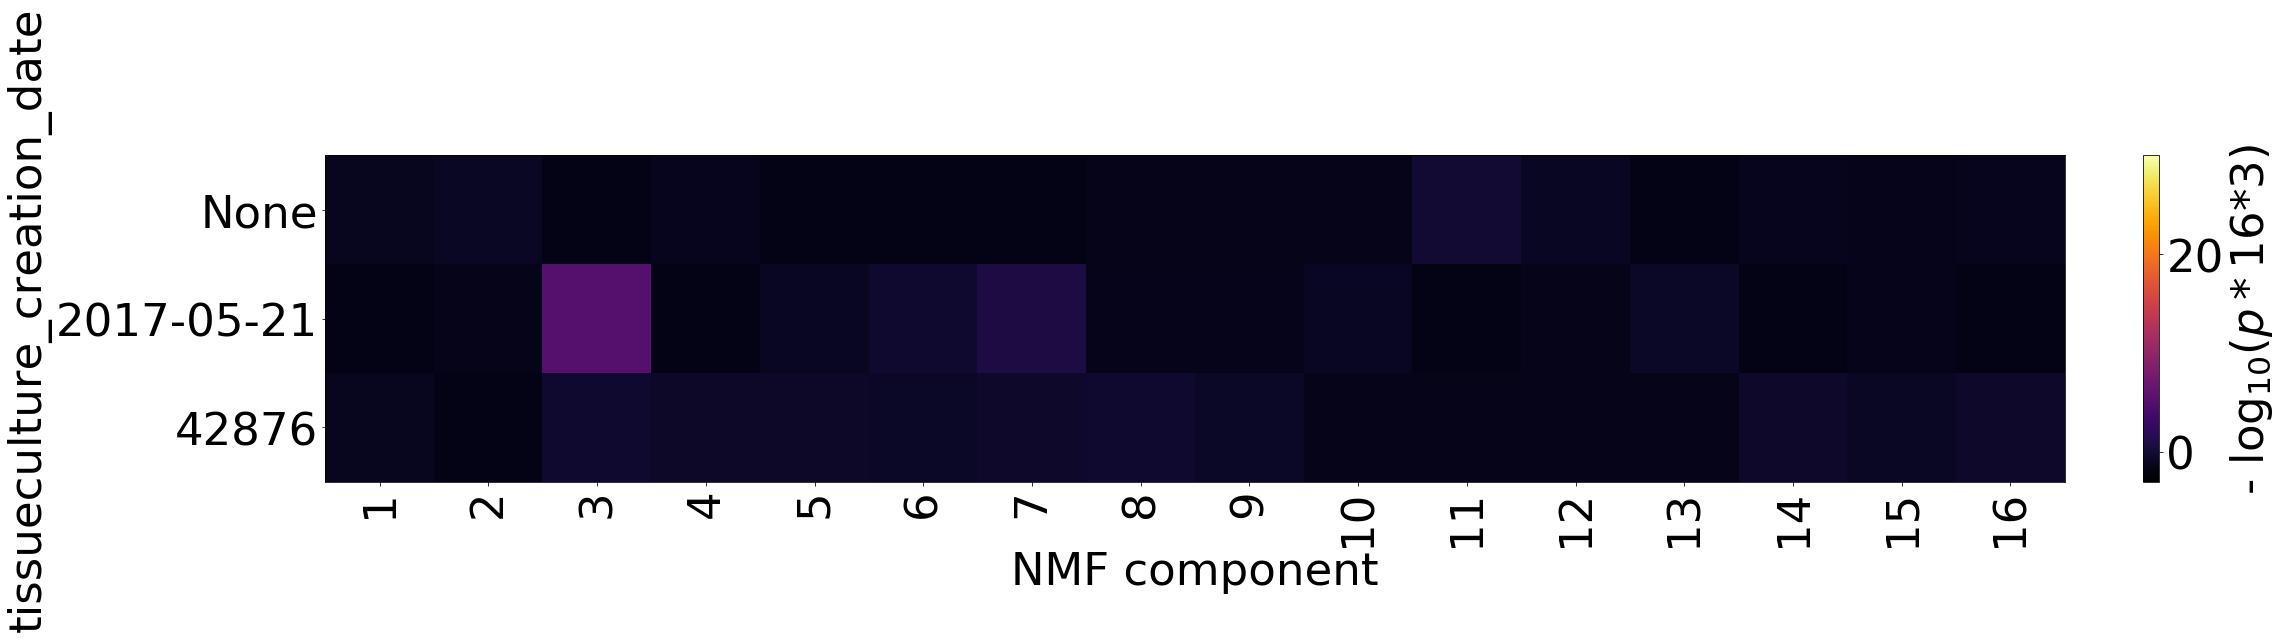

<Figure size 432x288 with 0 Axes>

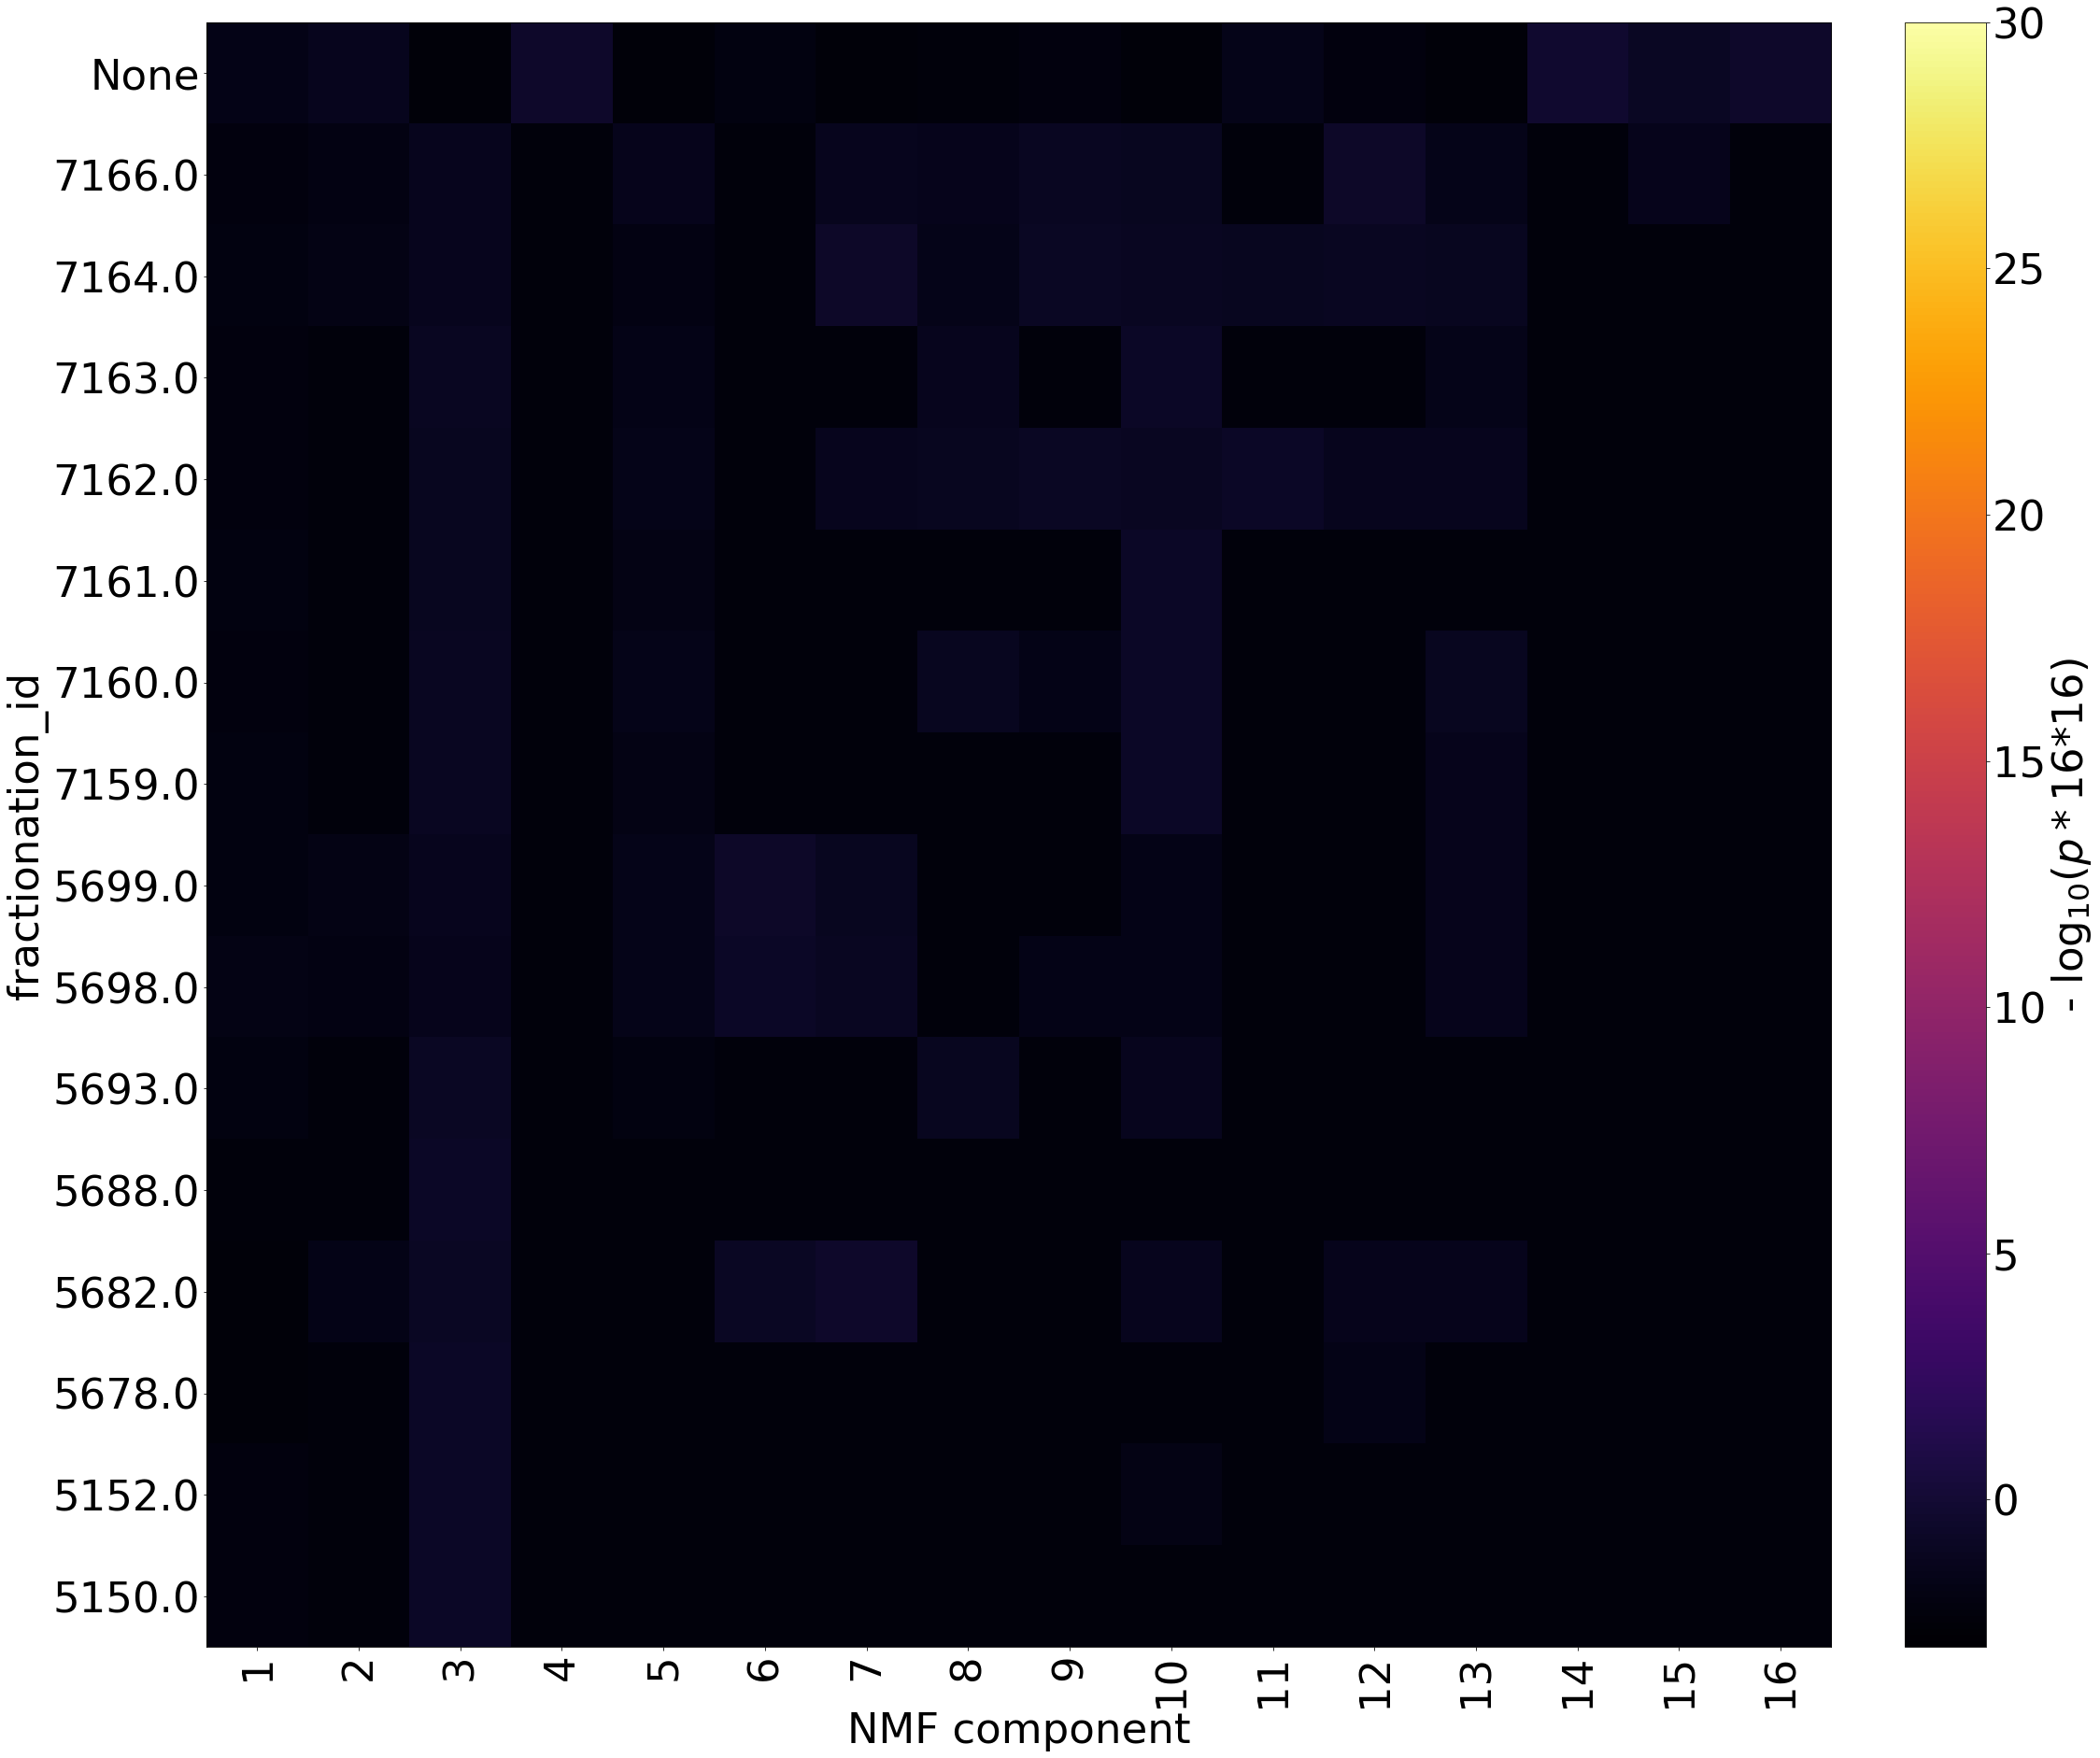

<Figure size 432x288 with 0 Axes>

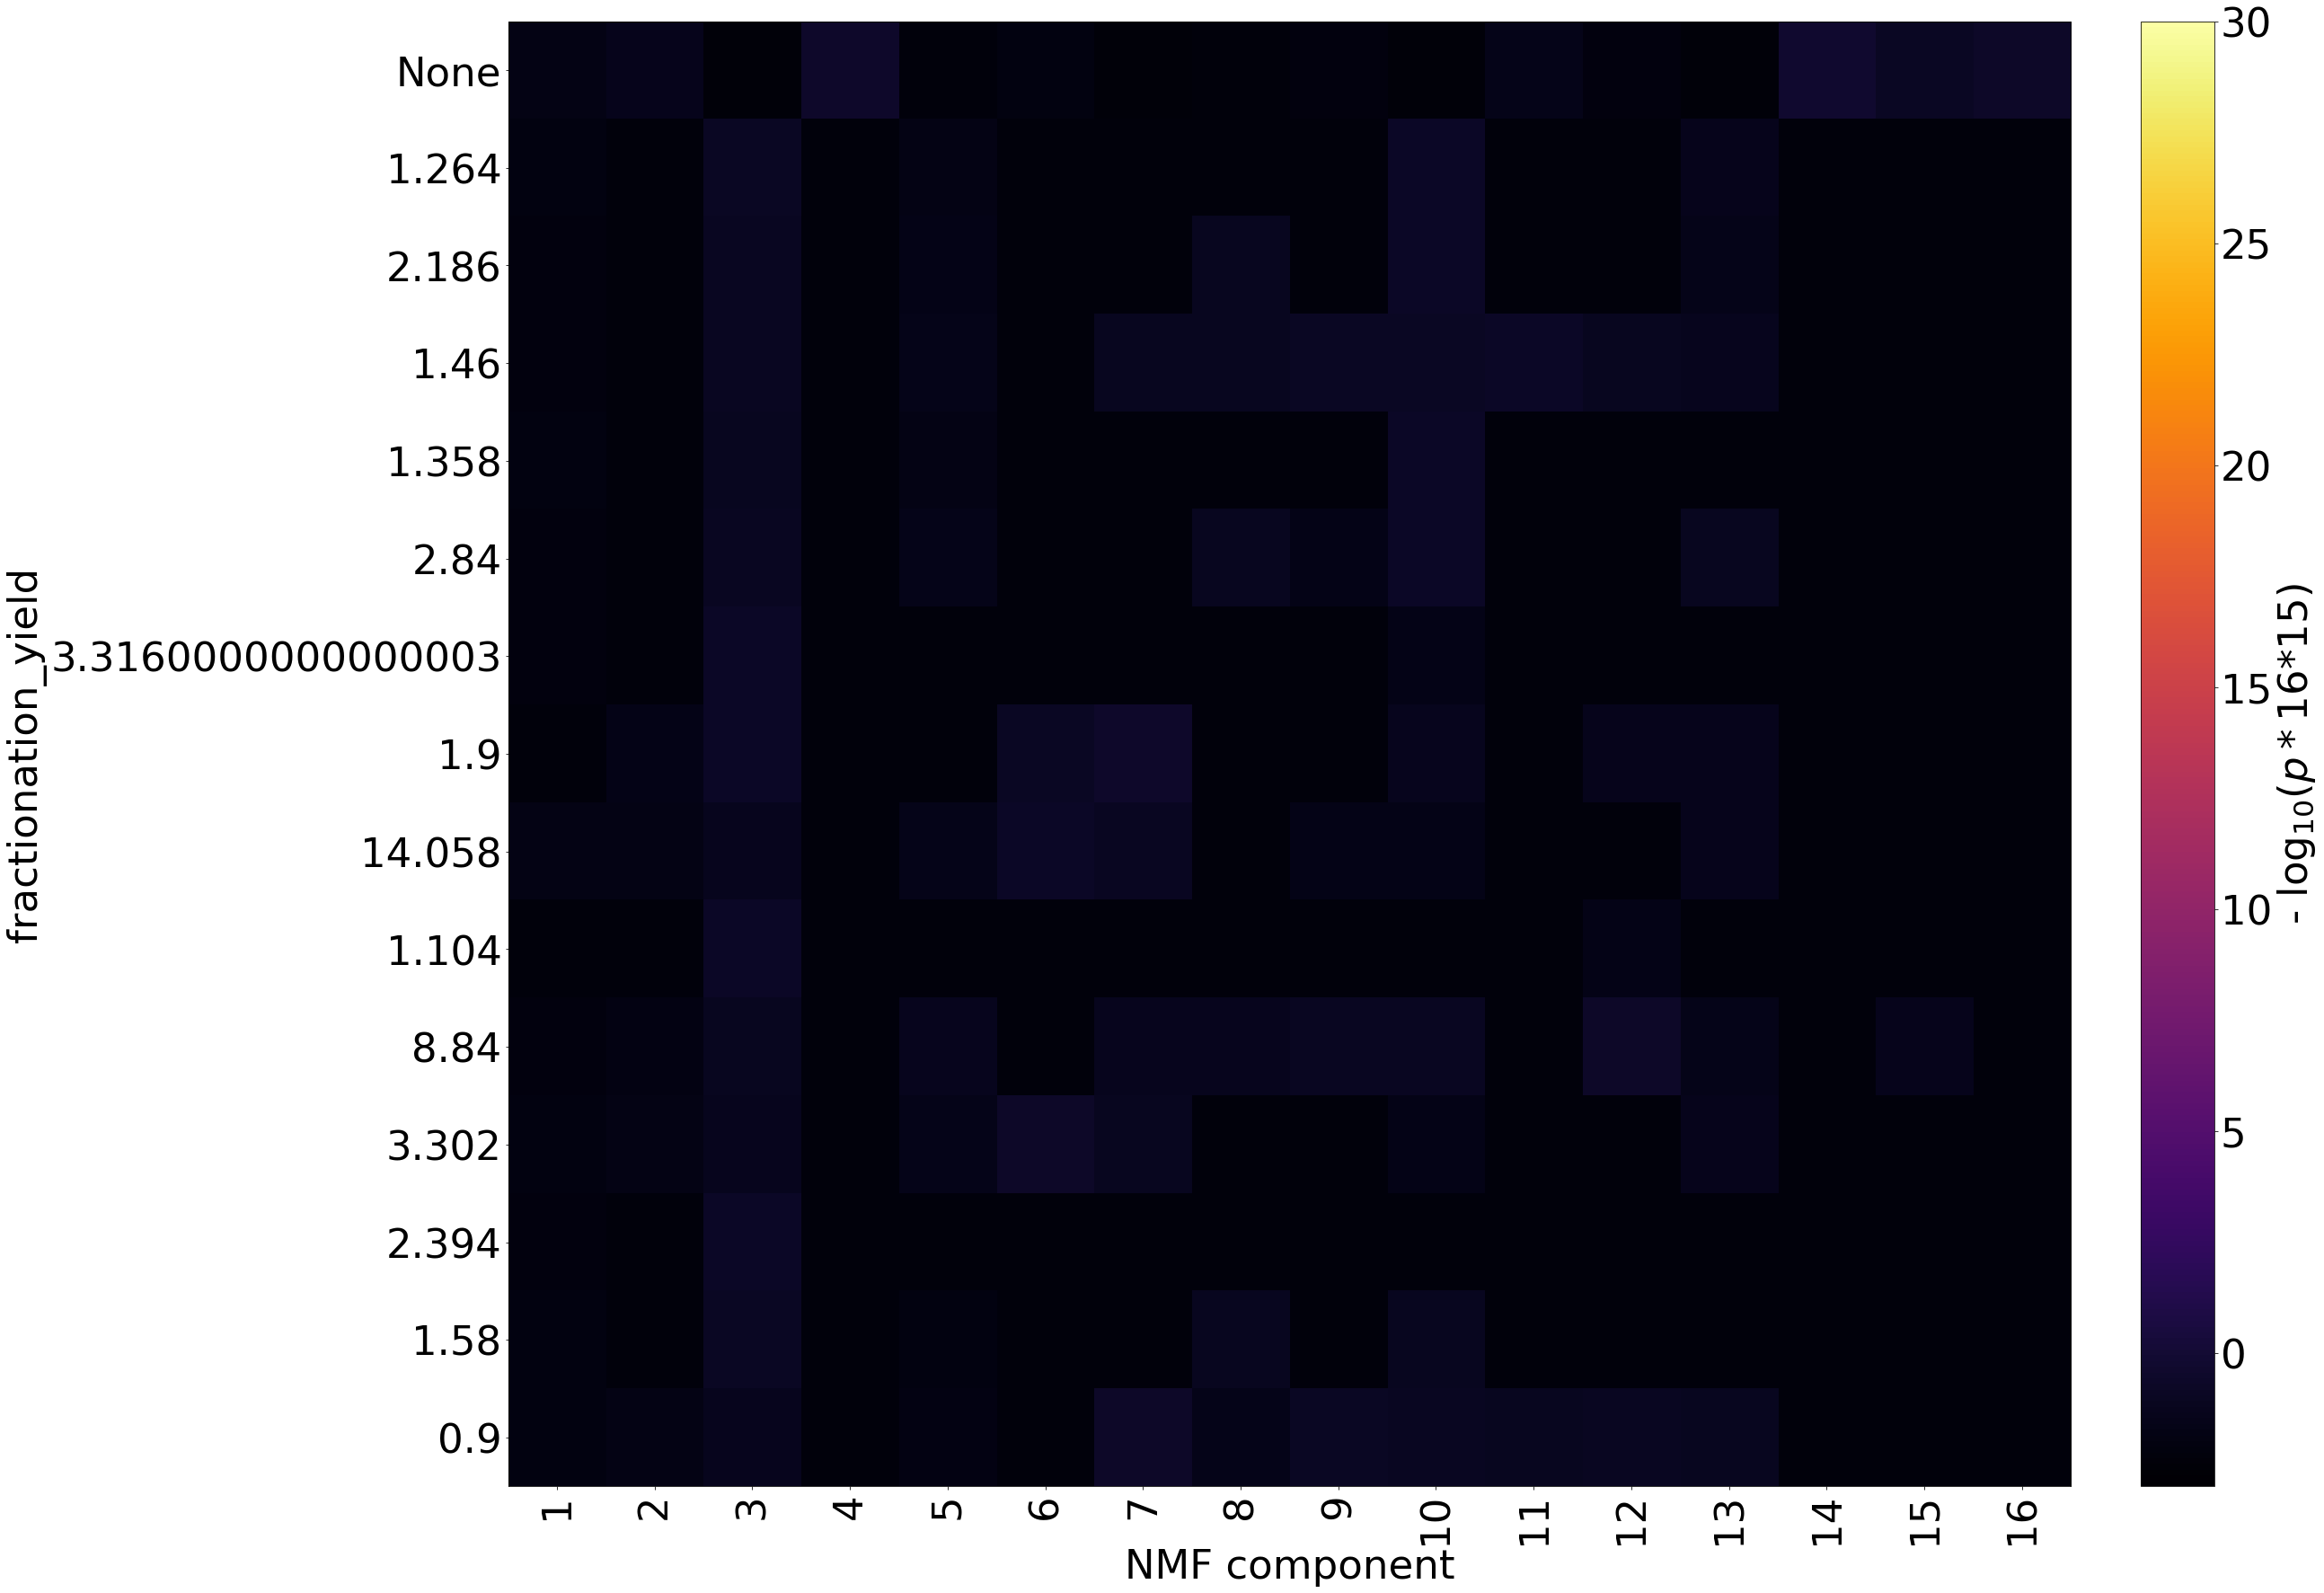

<Figure size 432x288 with 0 Axes>

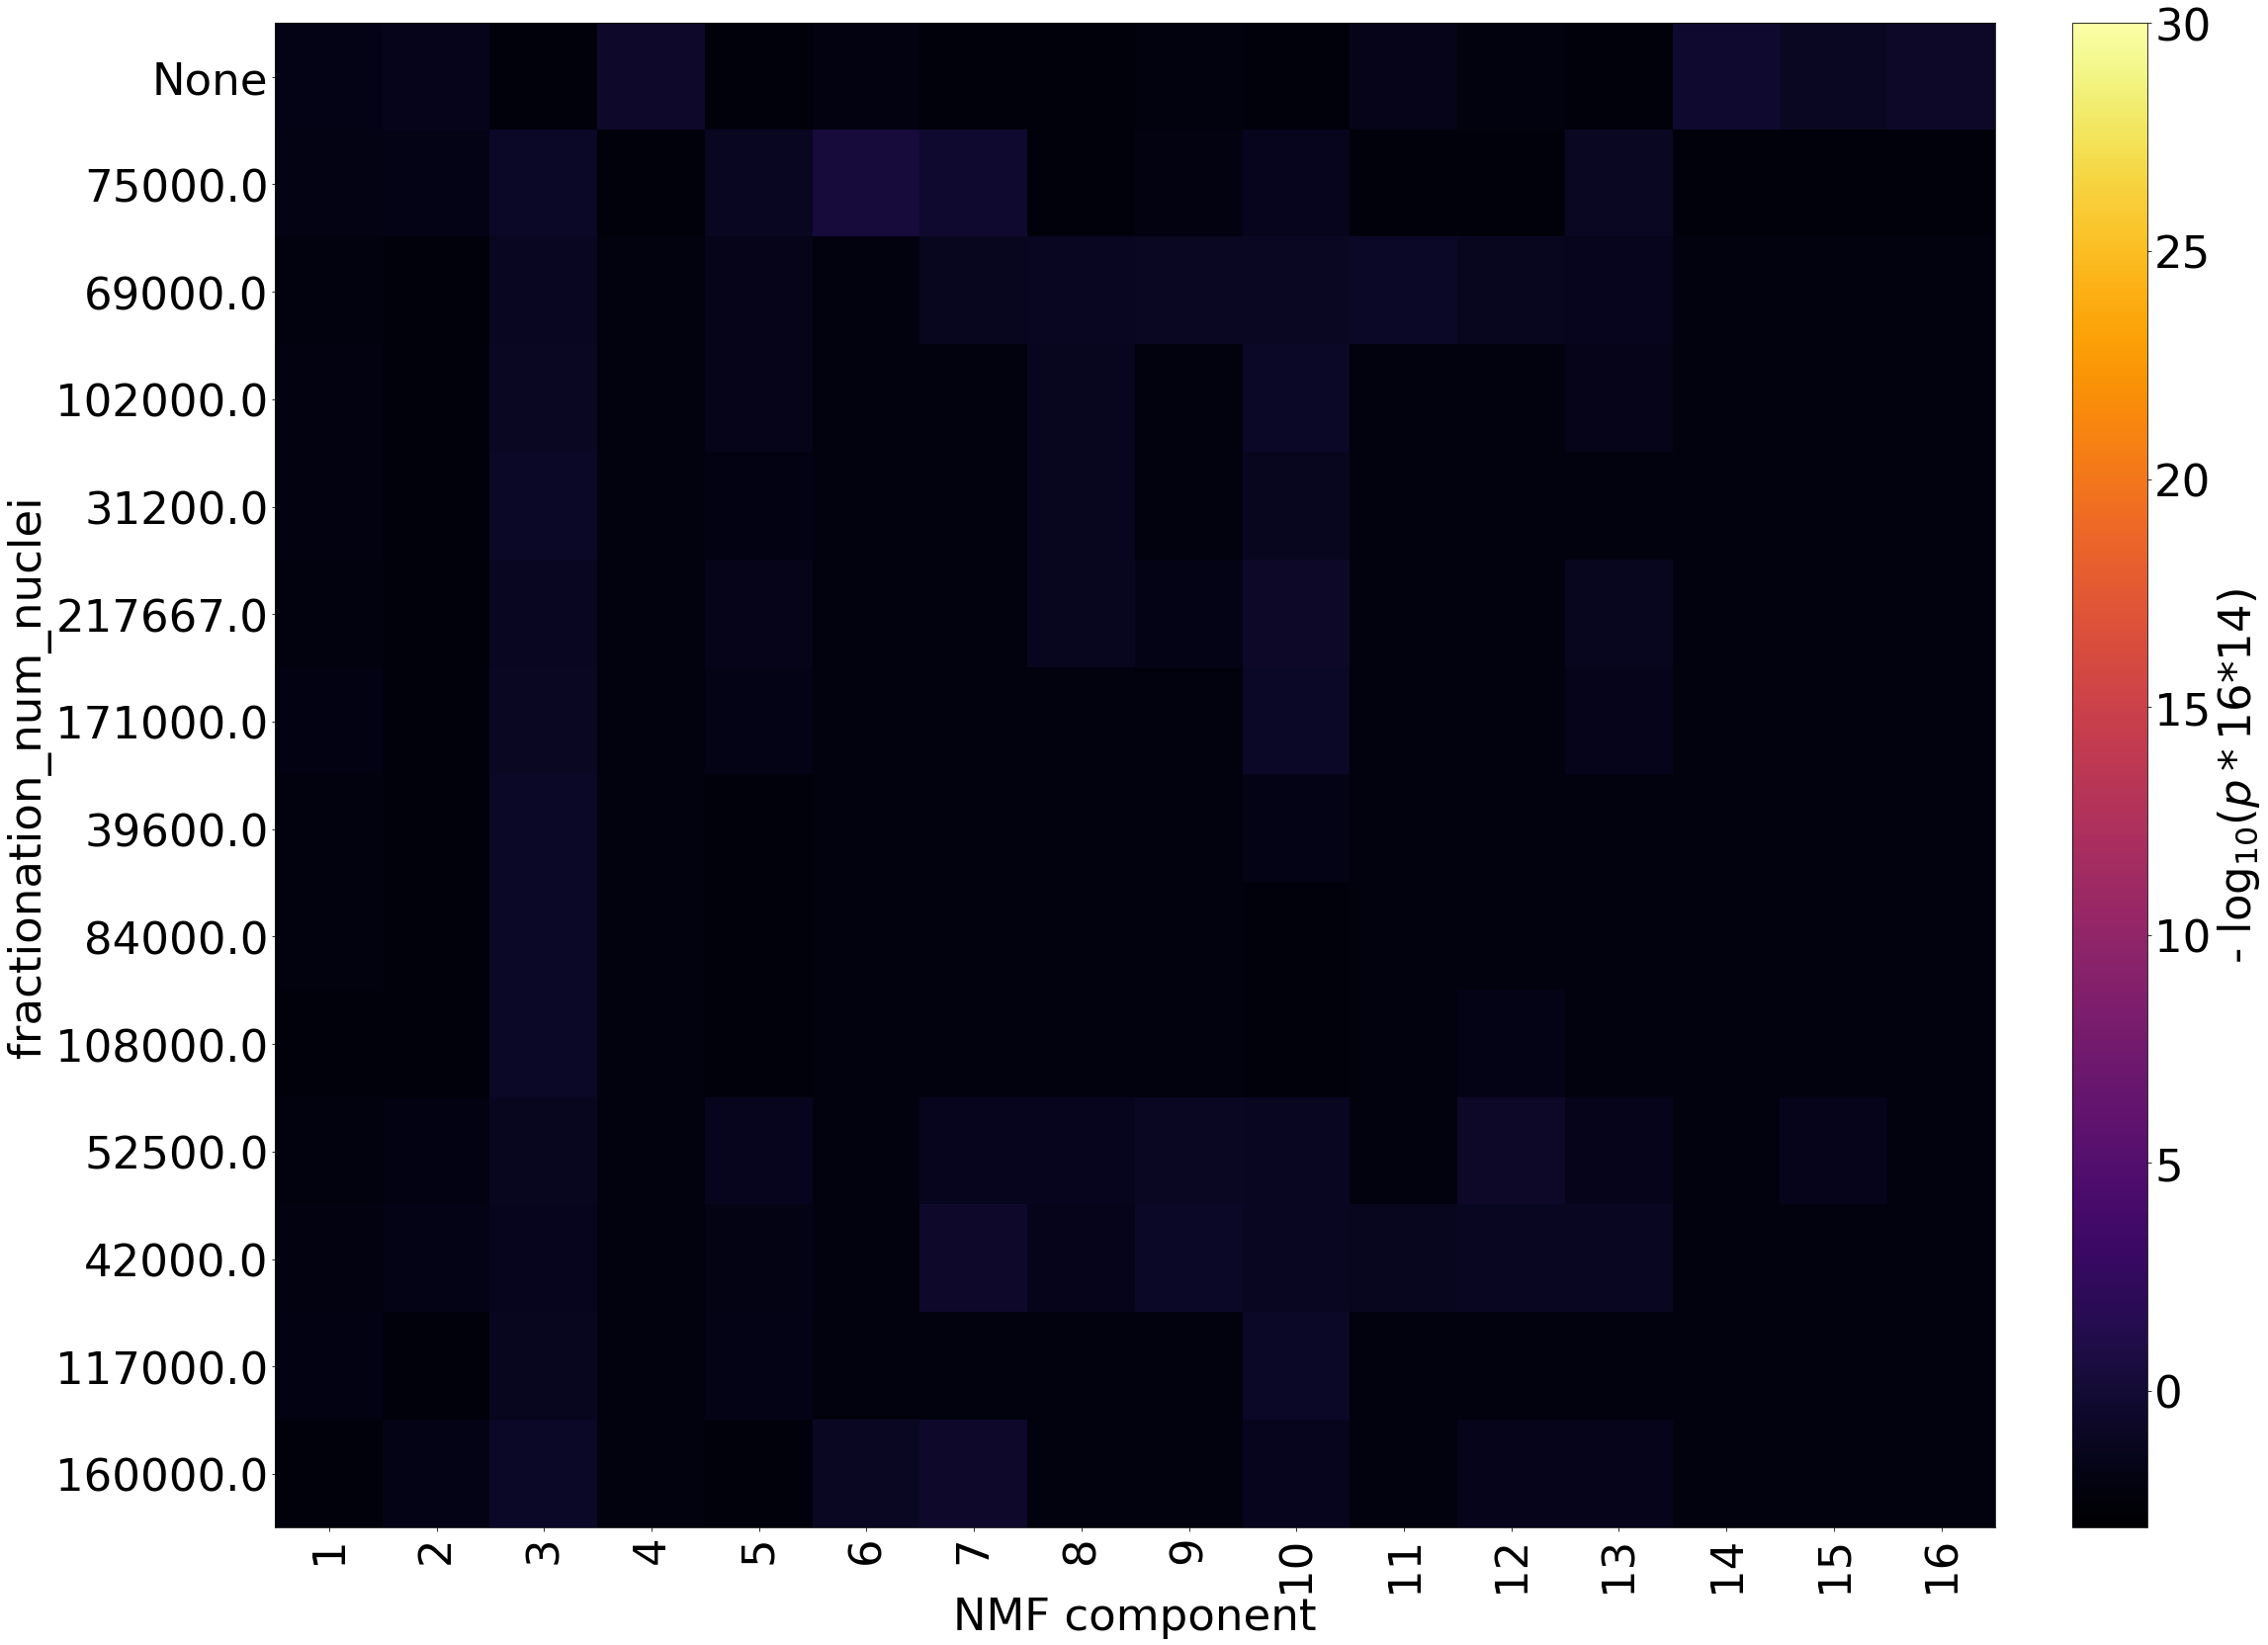

<Figure size 432x288 with 0 Axes>

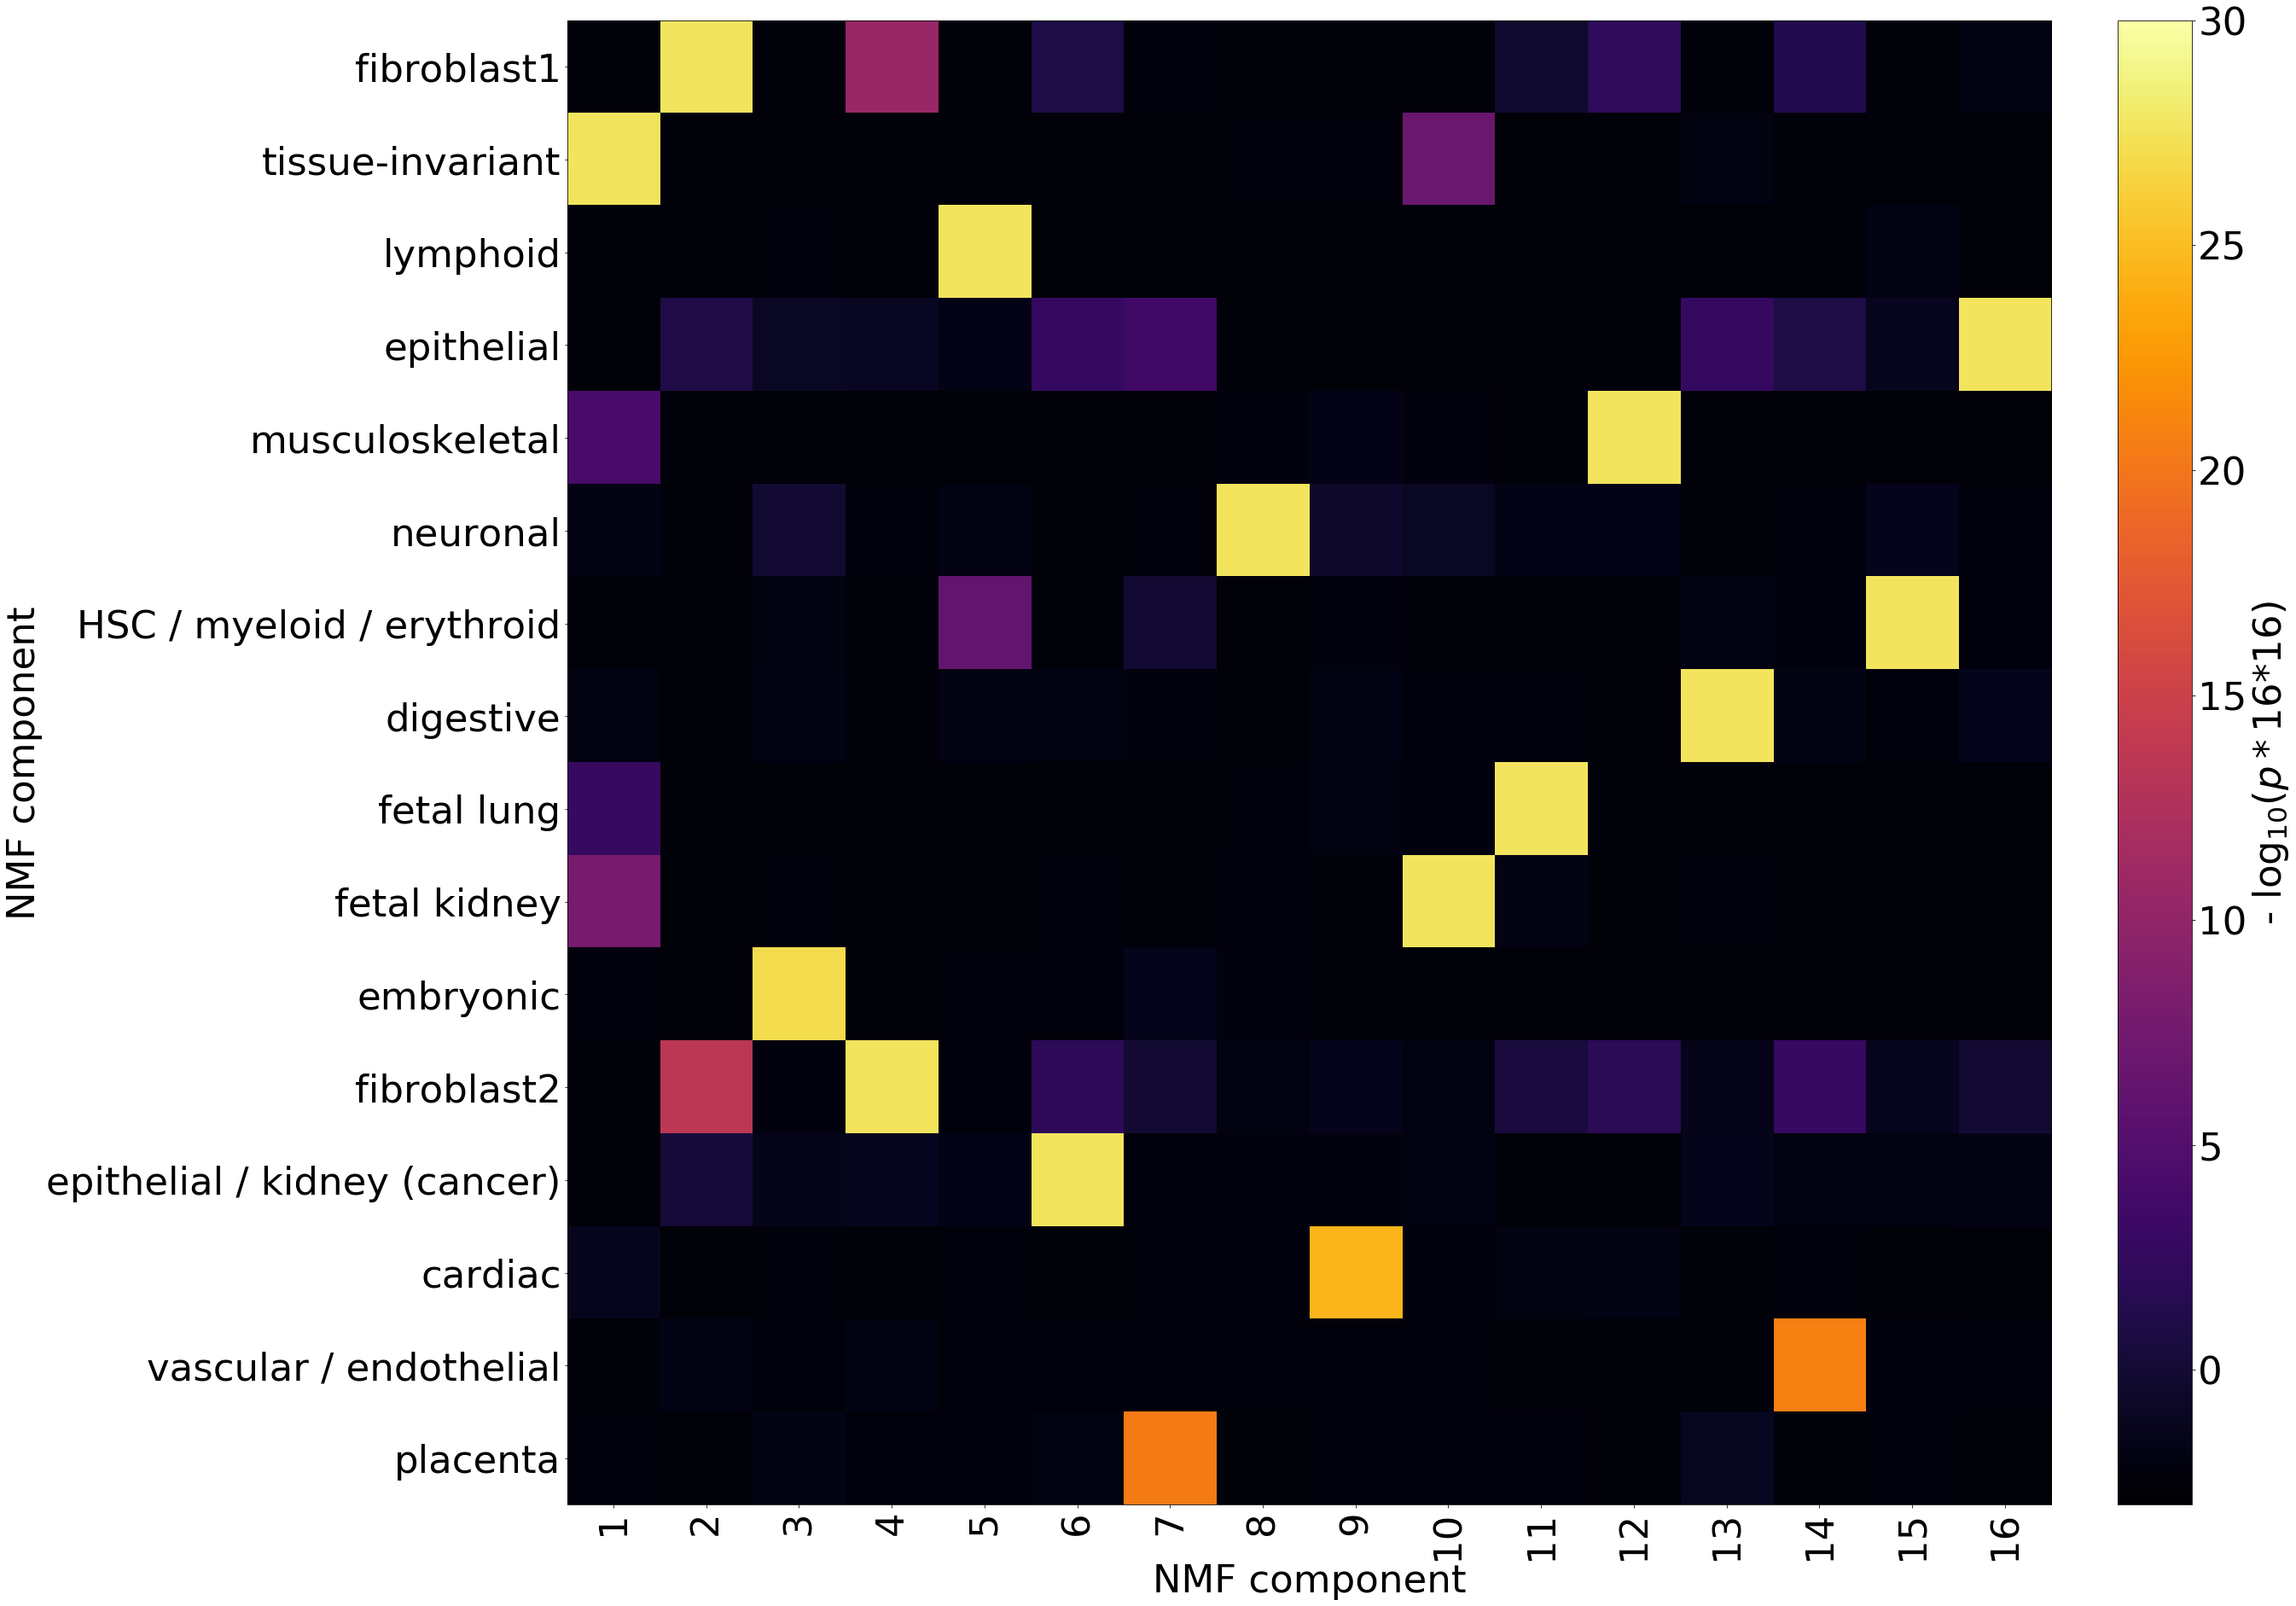

In [14]:
for my_cat_str in interesting_cats:
    MetaData[my_cat_str].fillna('None', inplace=True)
    (SystemChart,SystemTypes) = OMD.make_significance_plot(MetaData, decomp.Basis, my_cat_str, rosetta,thecmap='inferno', NMFCOMPS=k,filename_addon='', write_mode=False, verbose=False, maxcats=50)

In [18]:
non_object_cats = (MetaData.dtypes != 'object')

In [19]:
len(non_object_cats[non_object_cats])

24

In [20]:
 from scipy.stats import linregress

In [23]:
decomp.normalize_matrices()

In [27]:
decomp.define_colors()

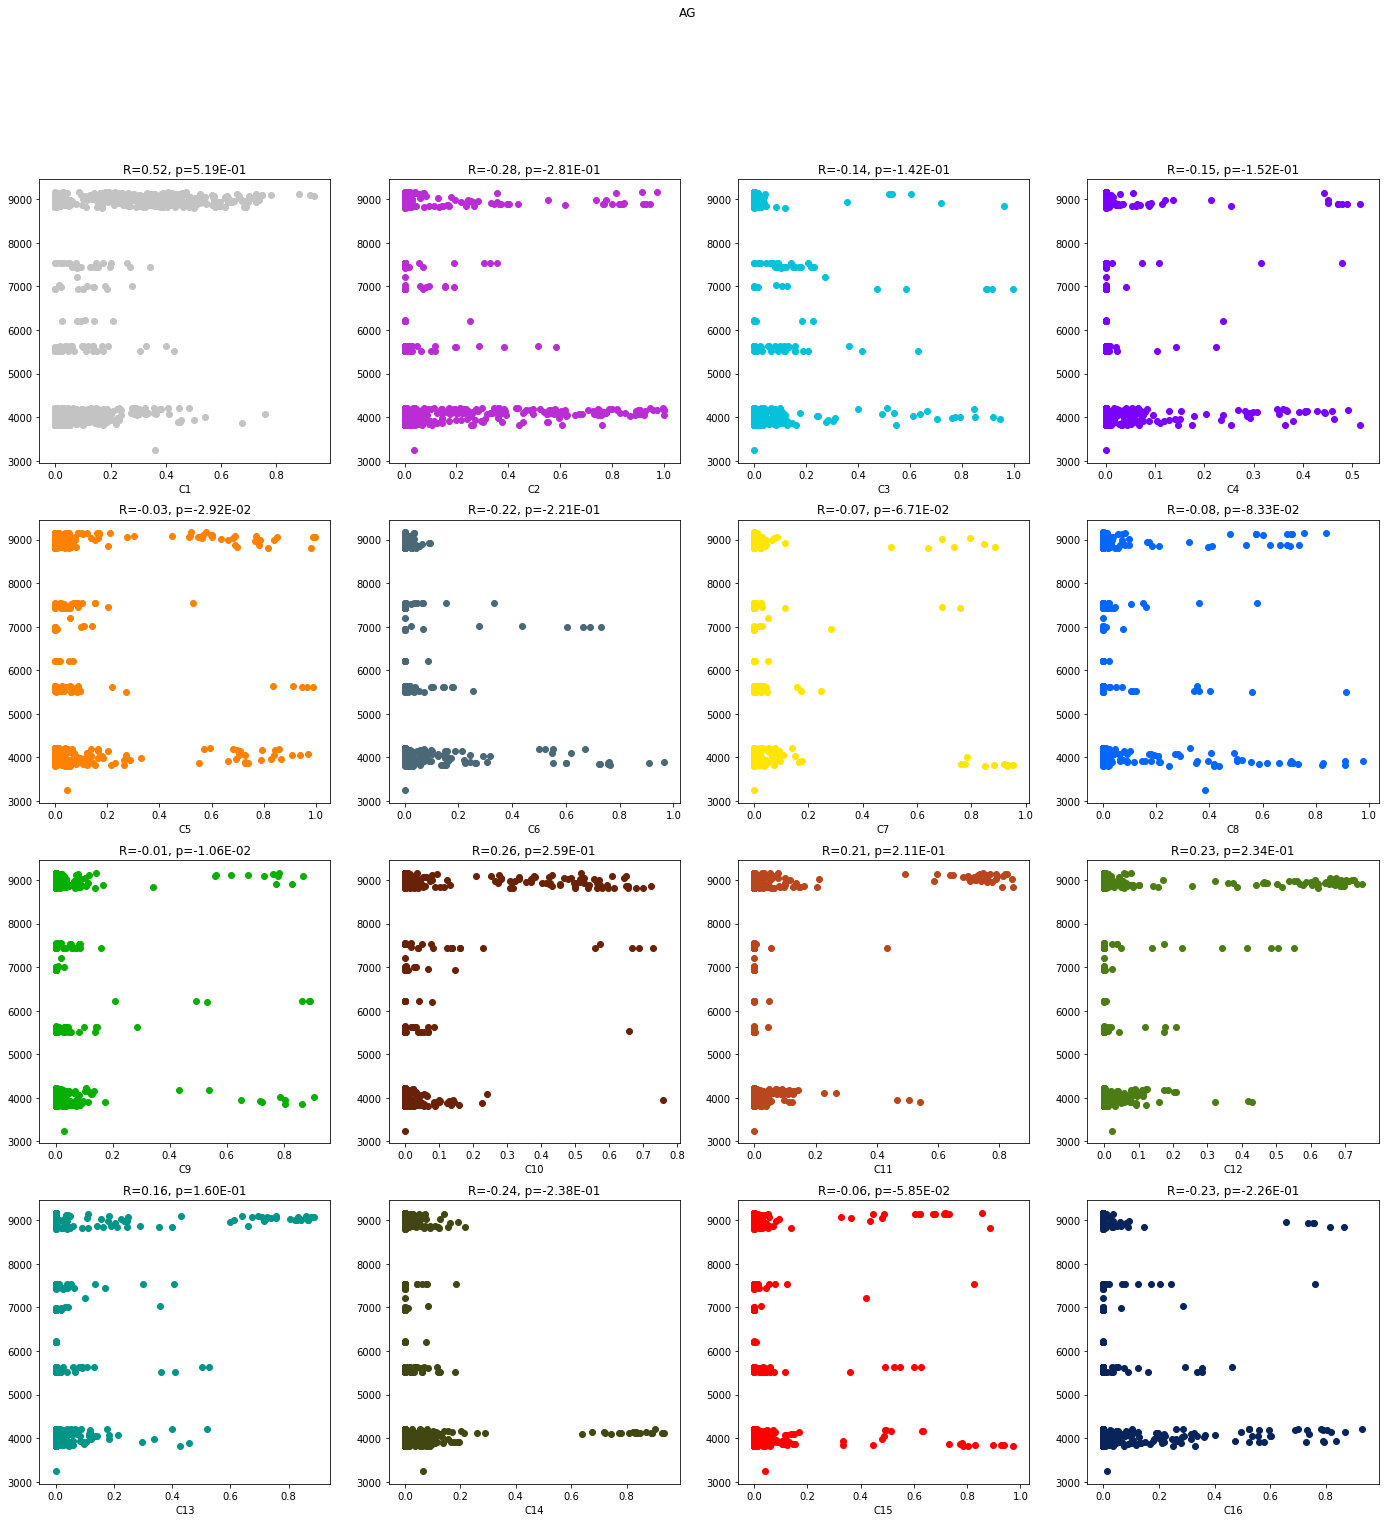

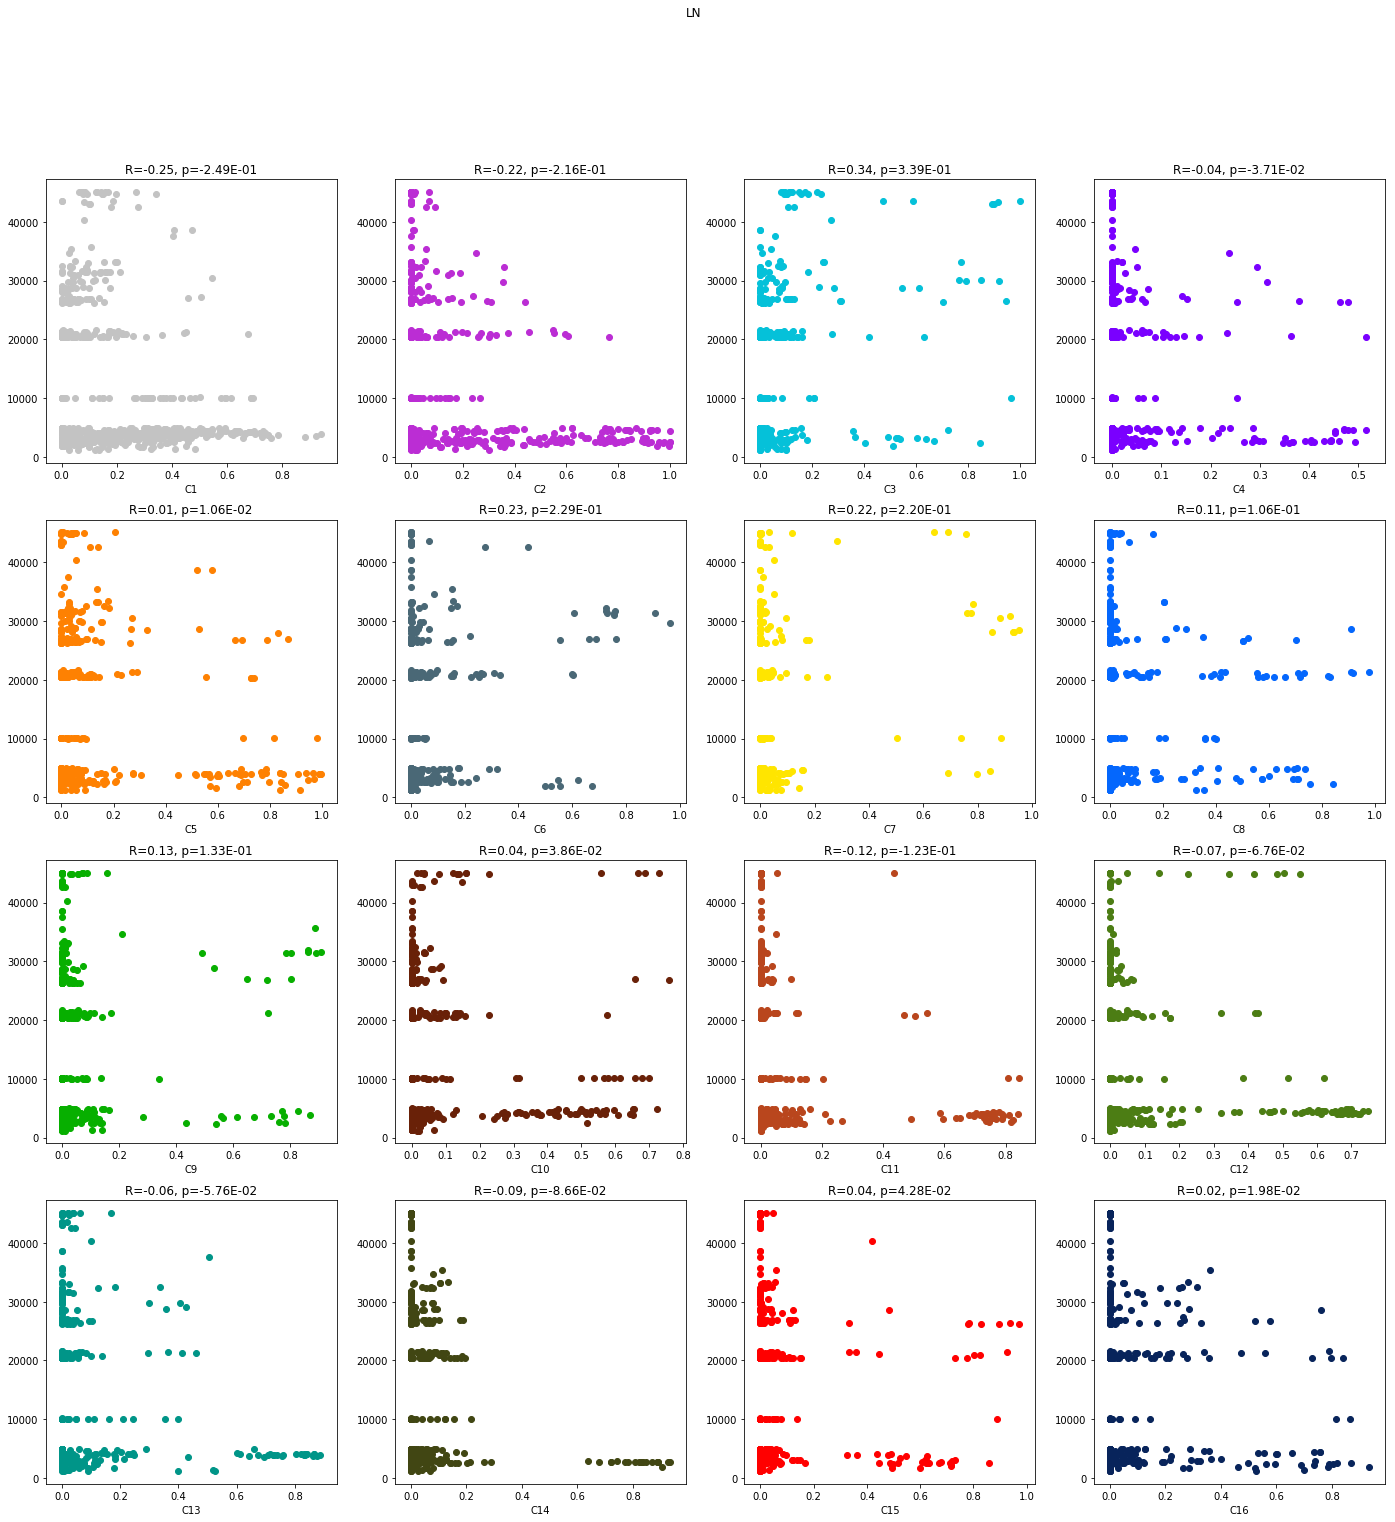

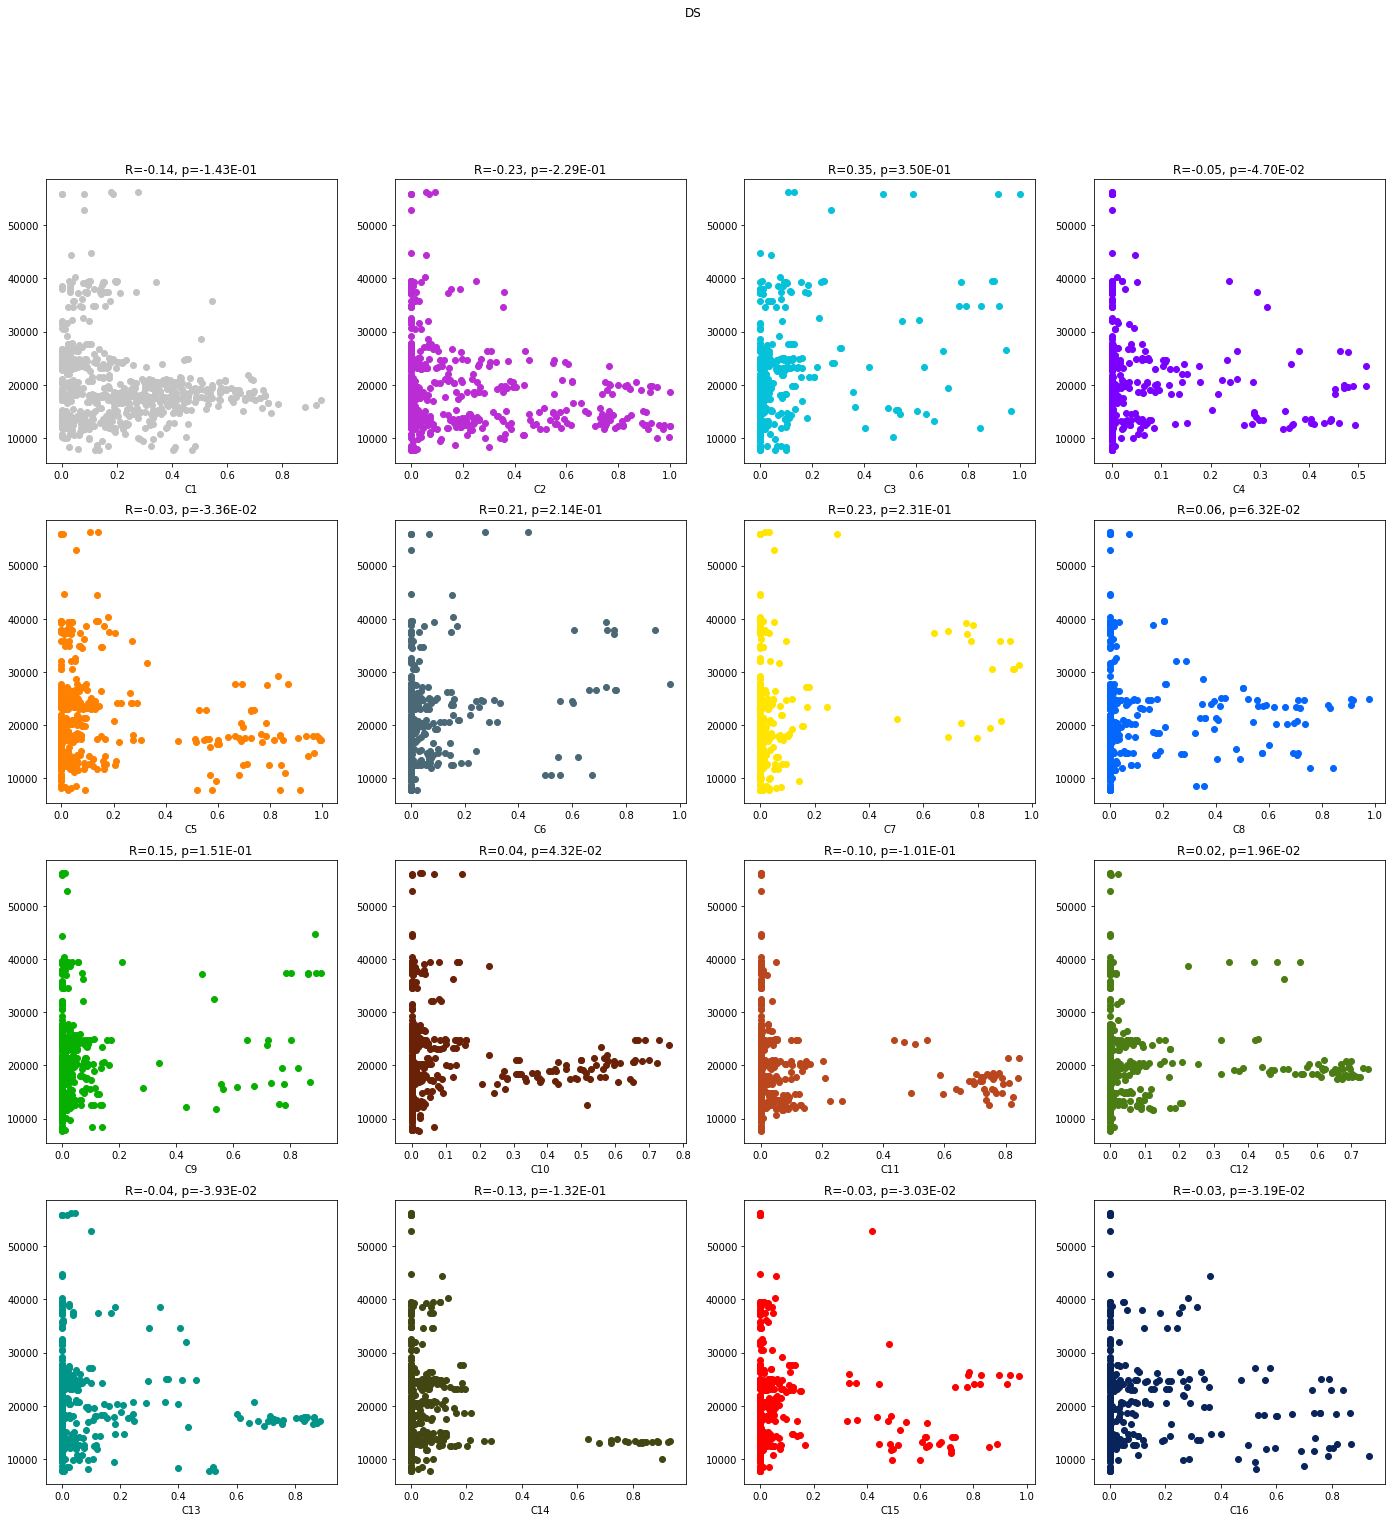

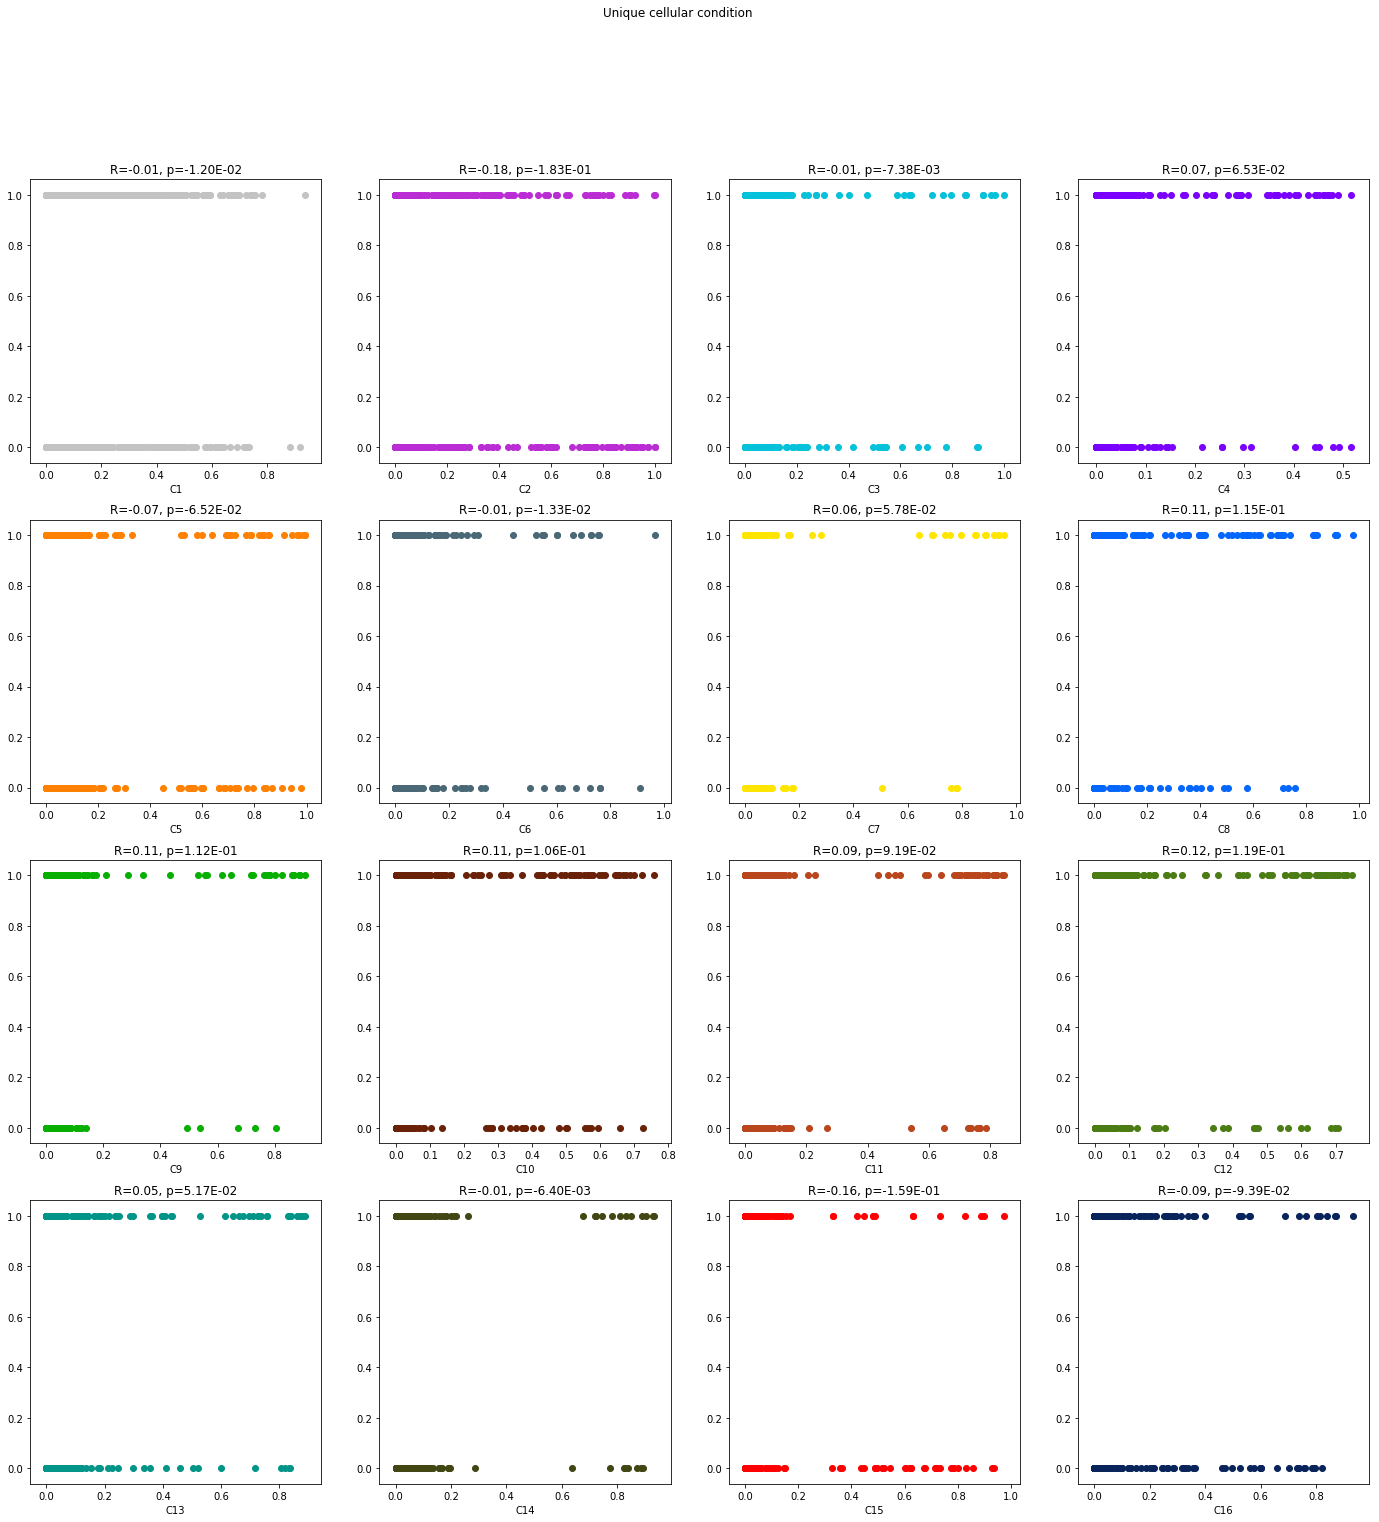

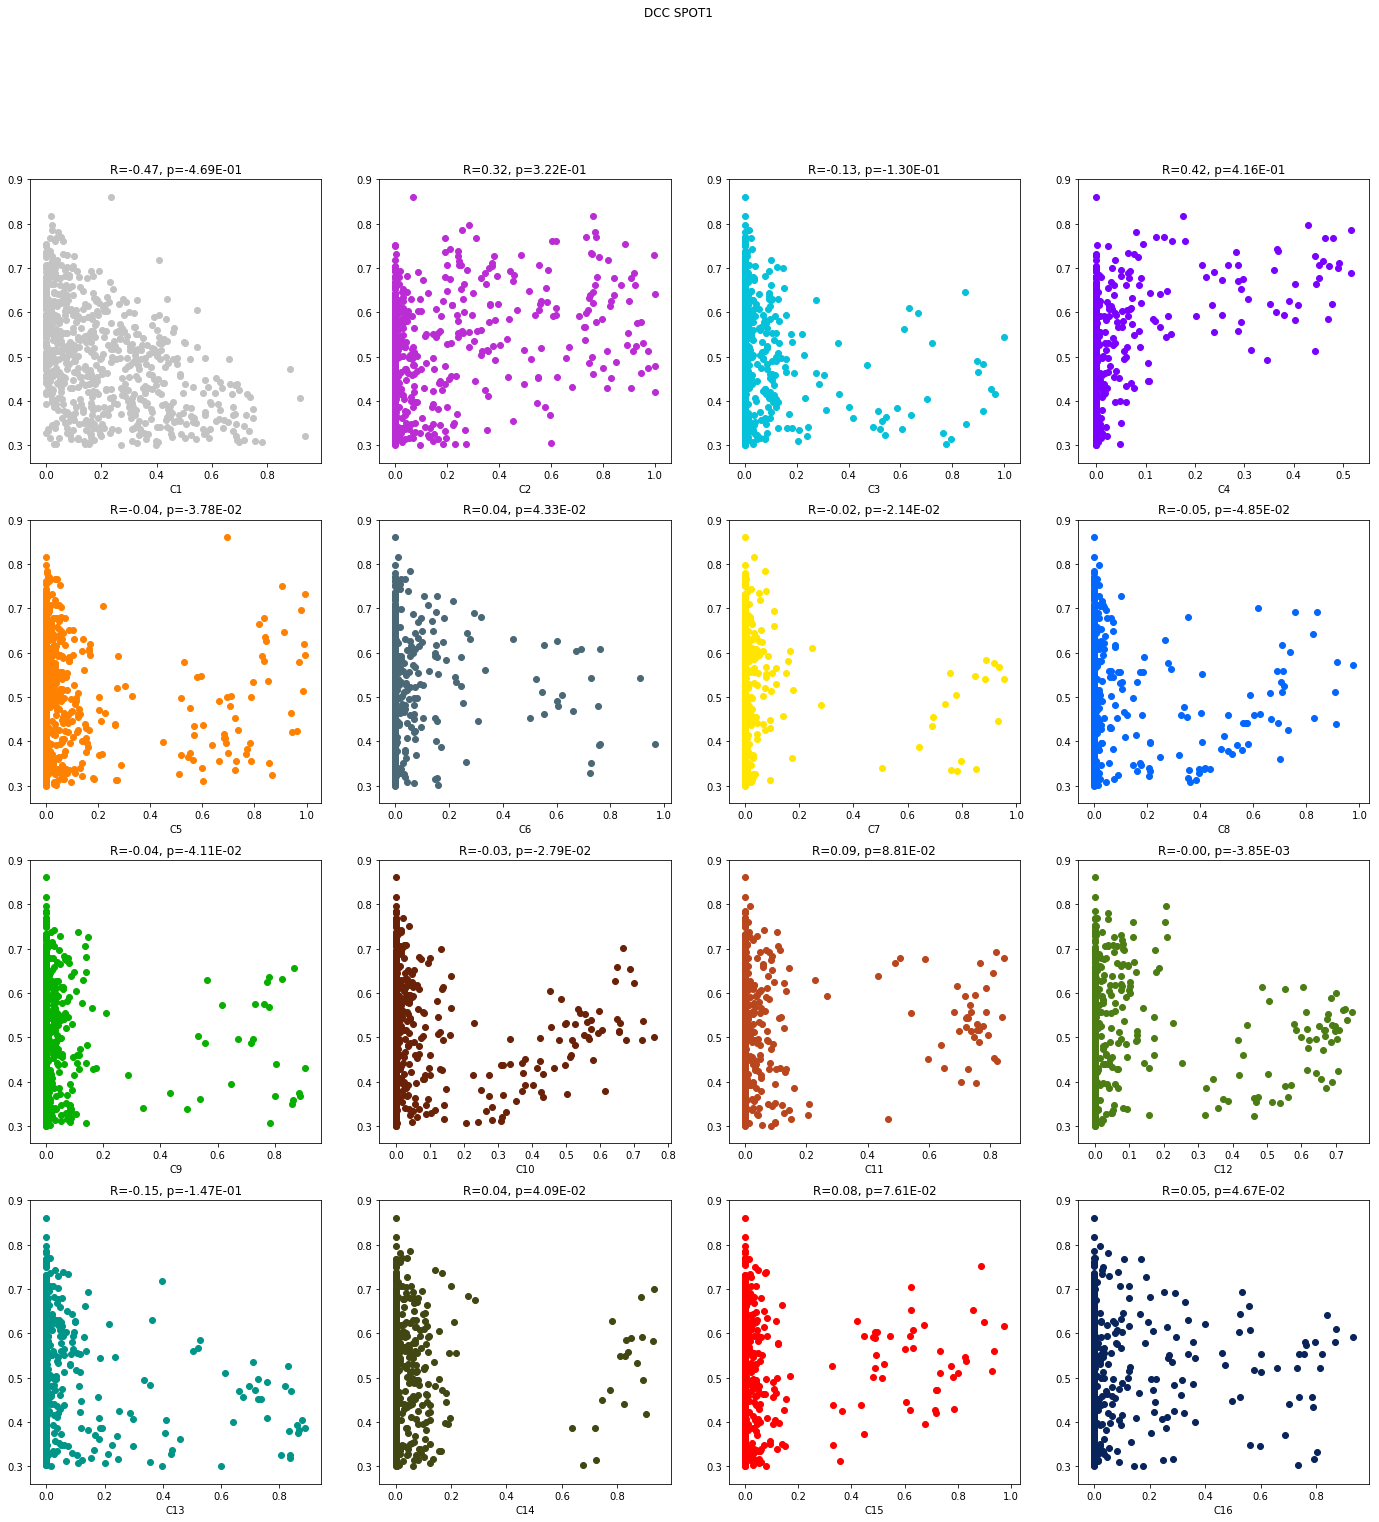

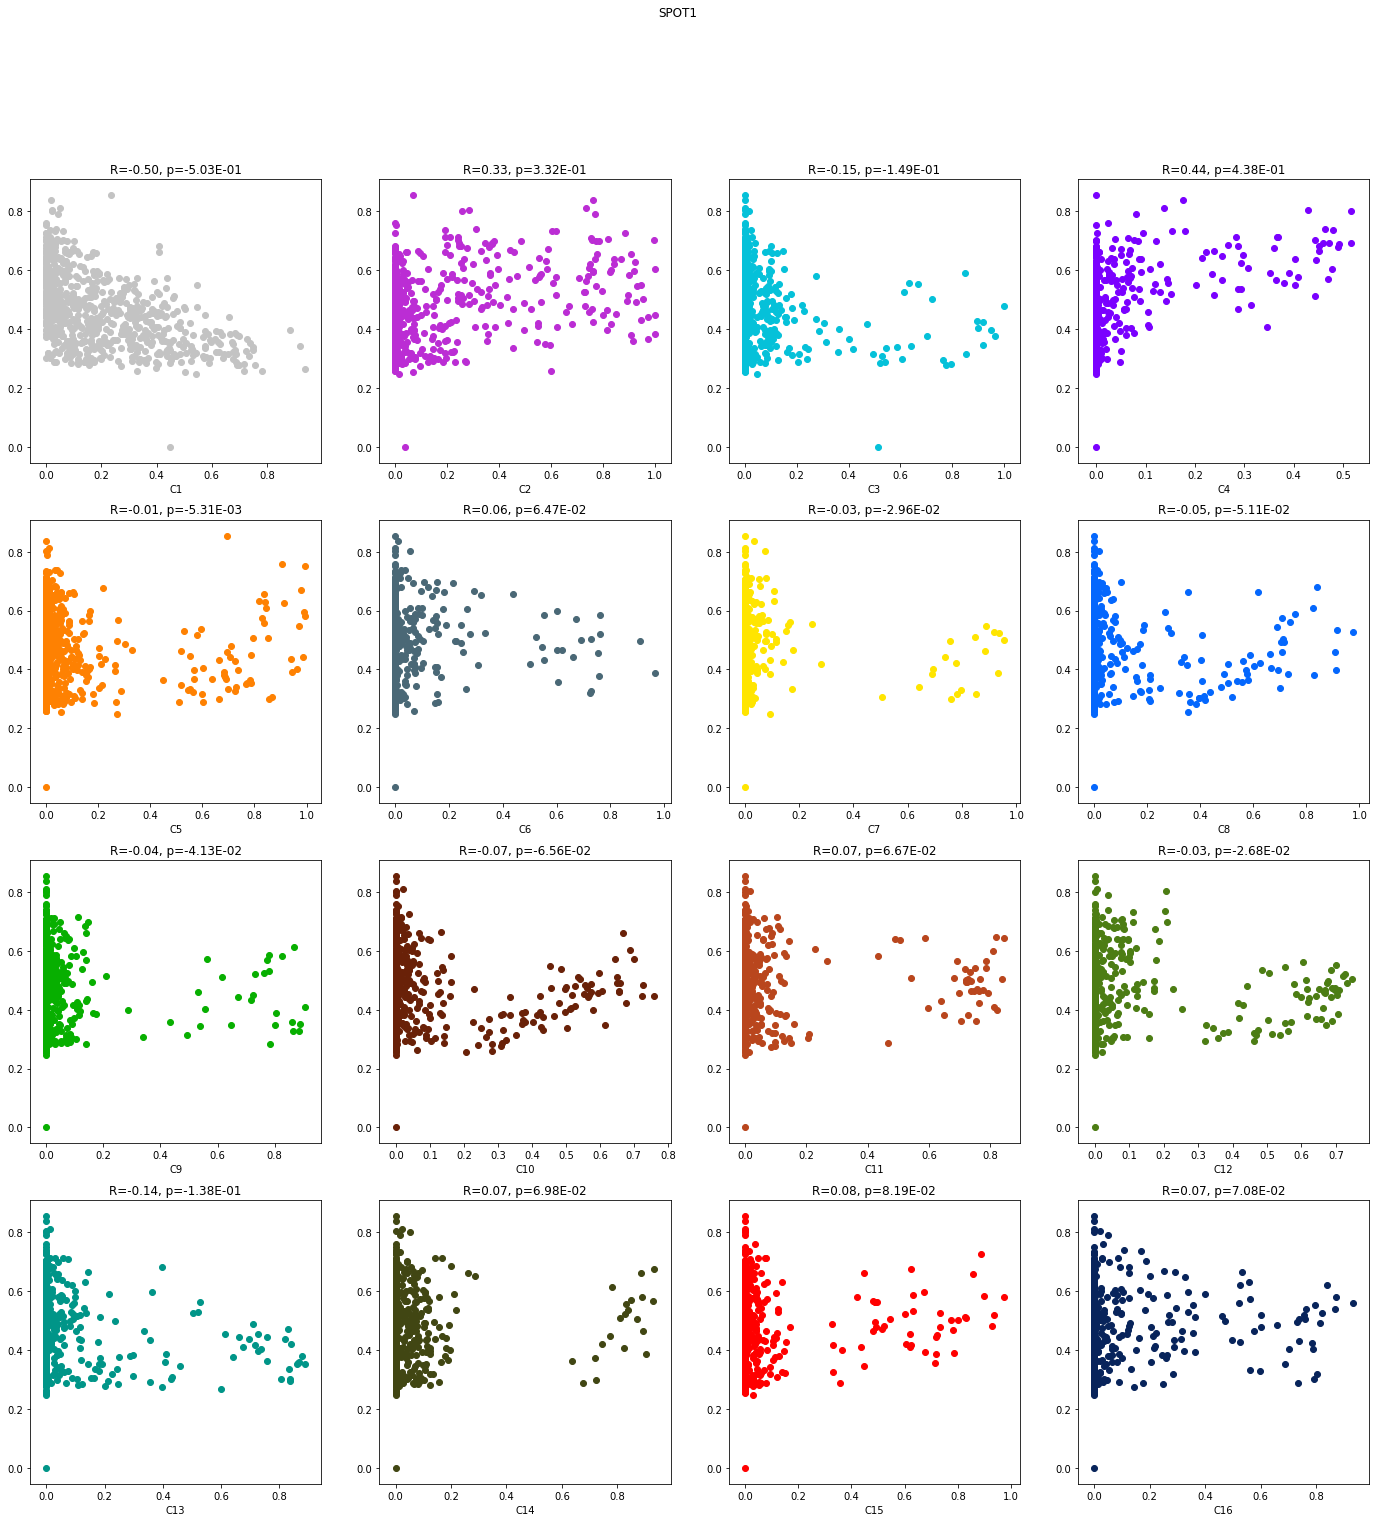

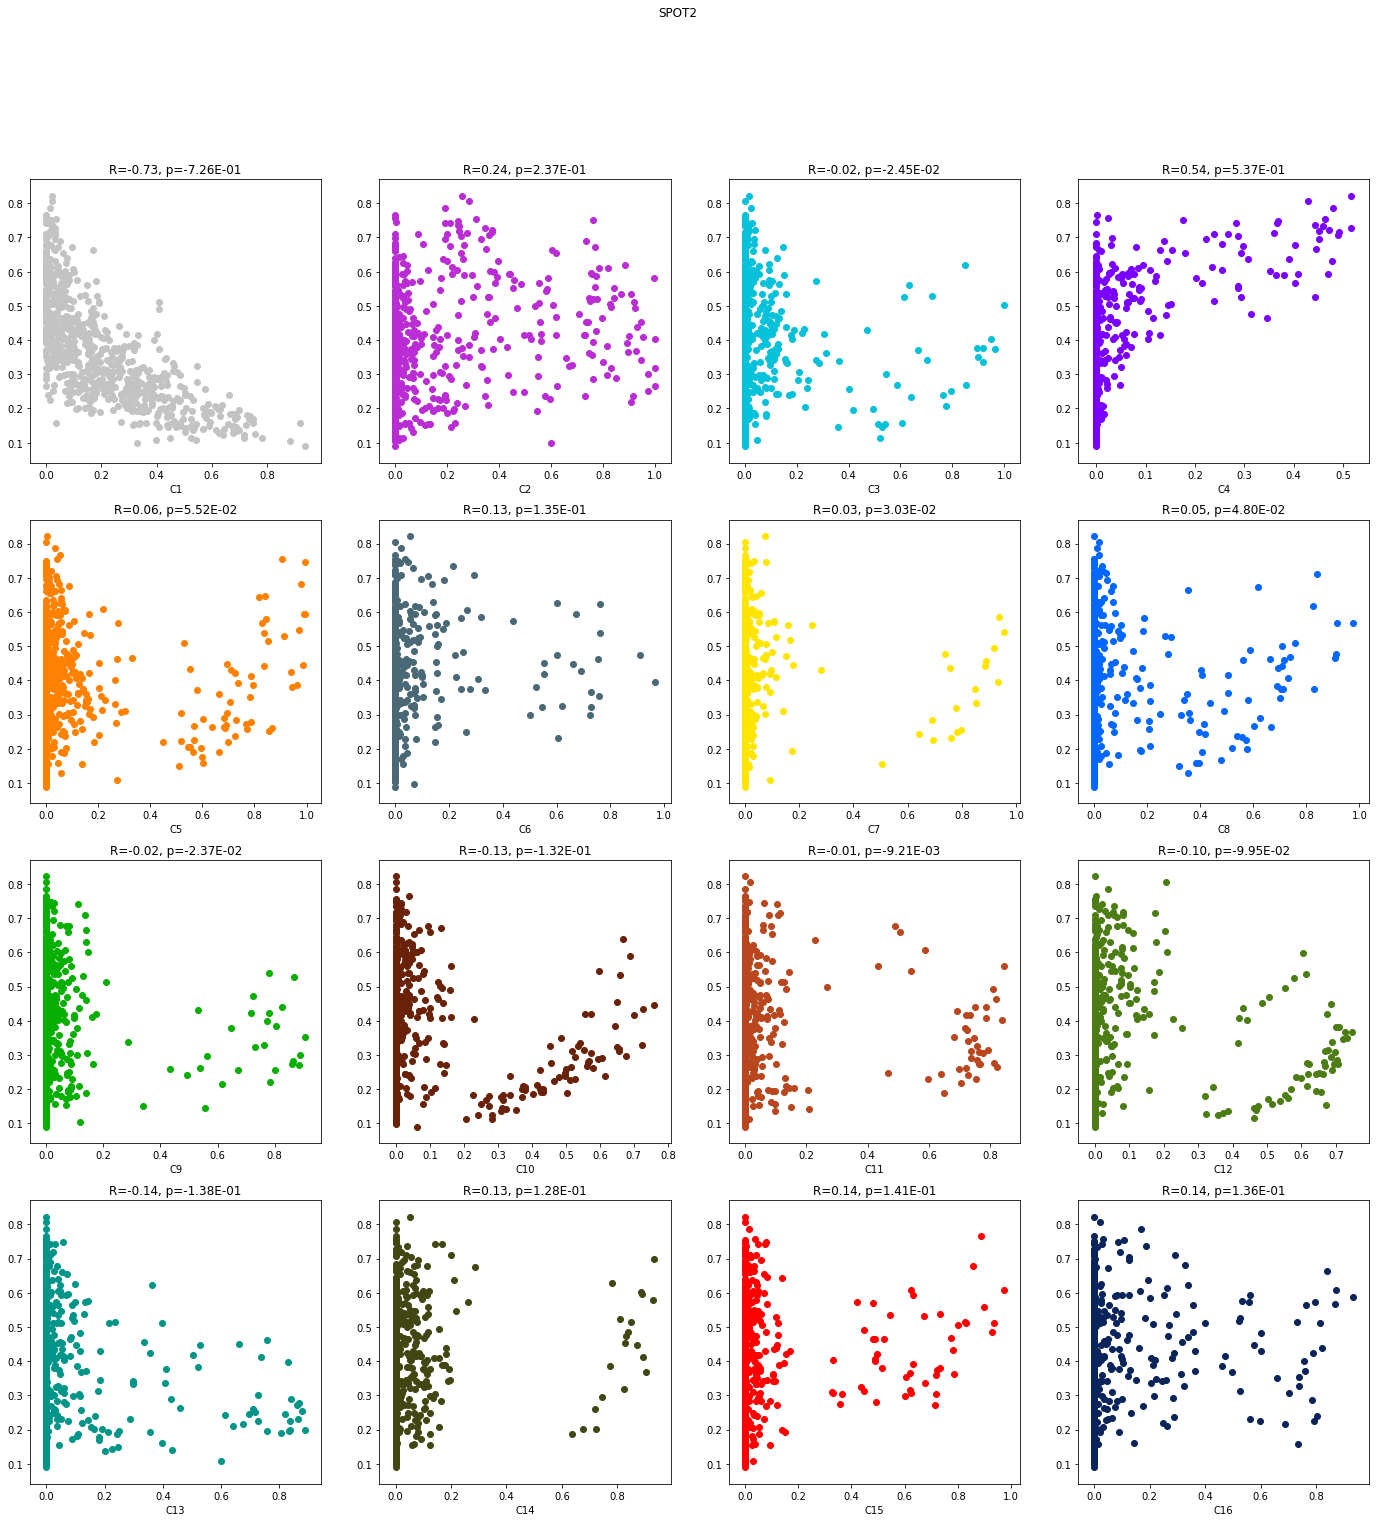

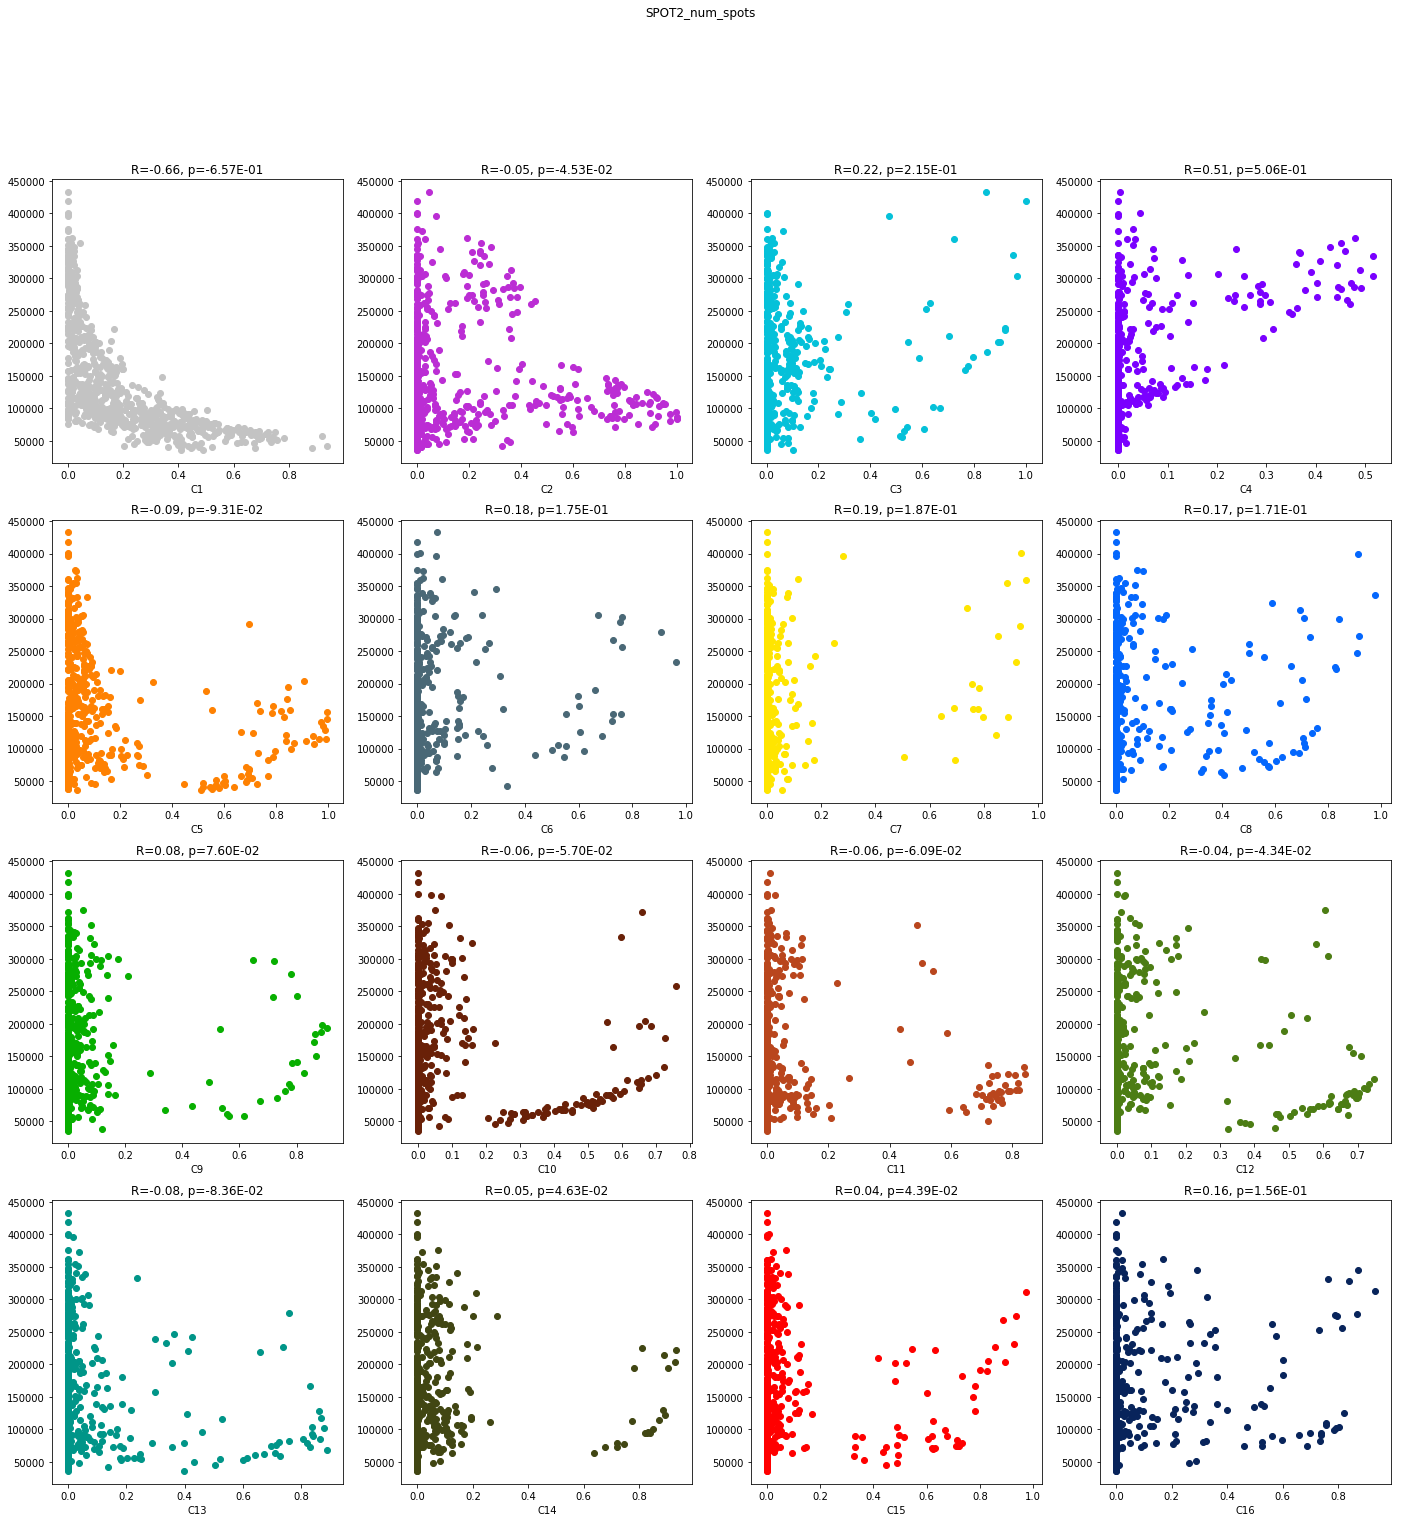

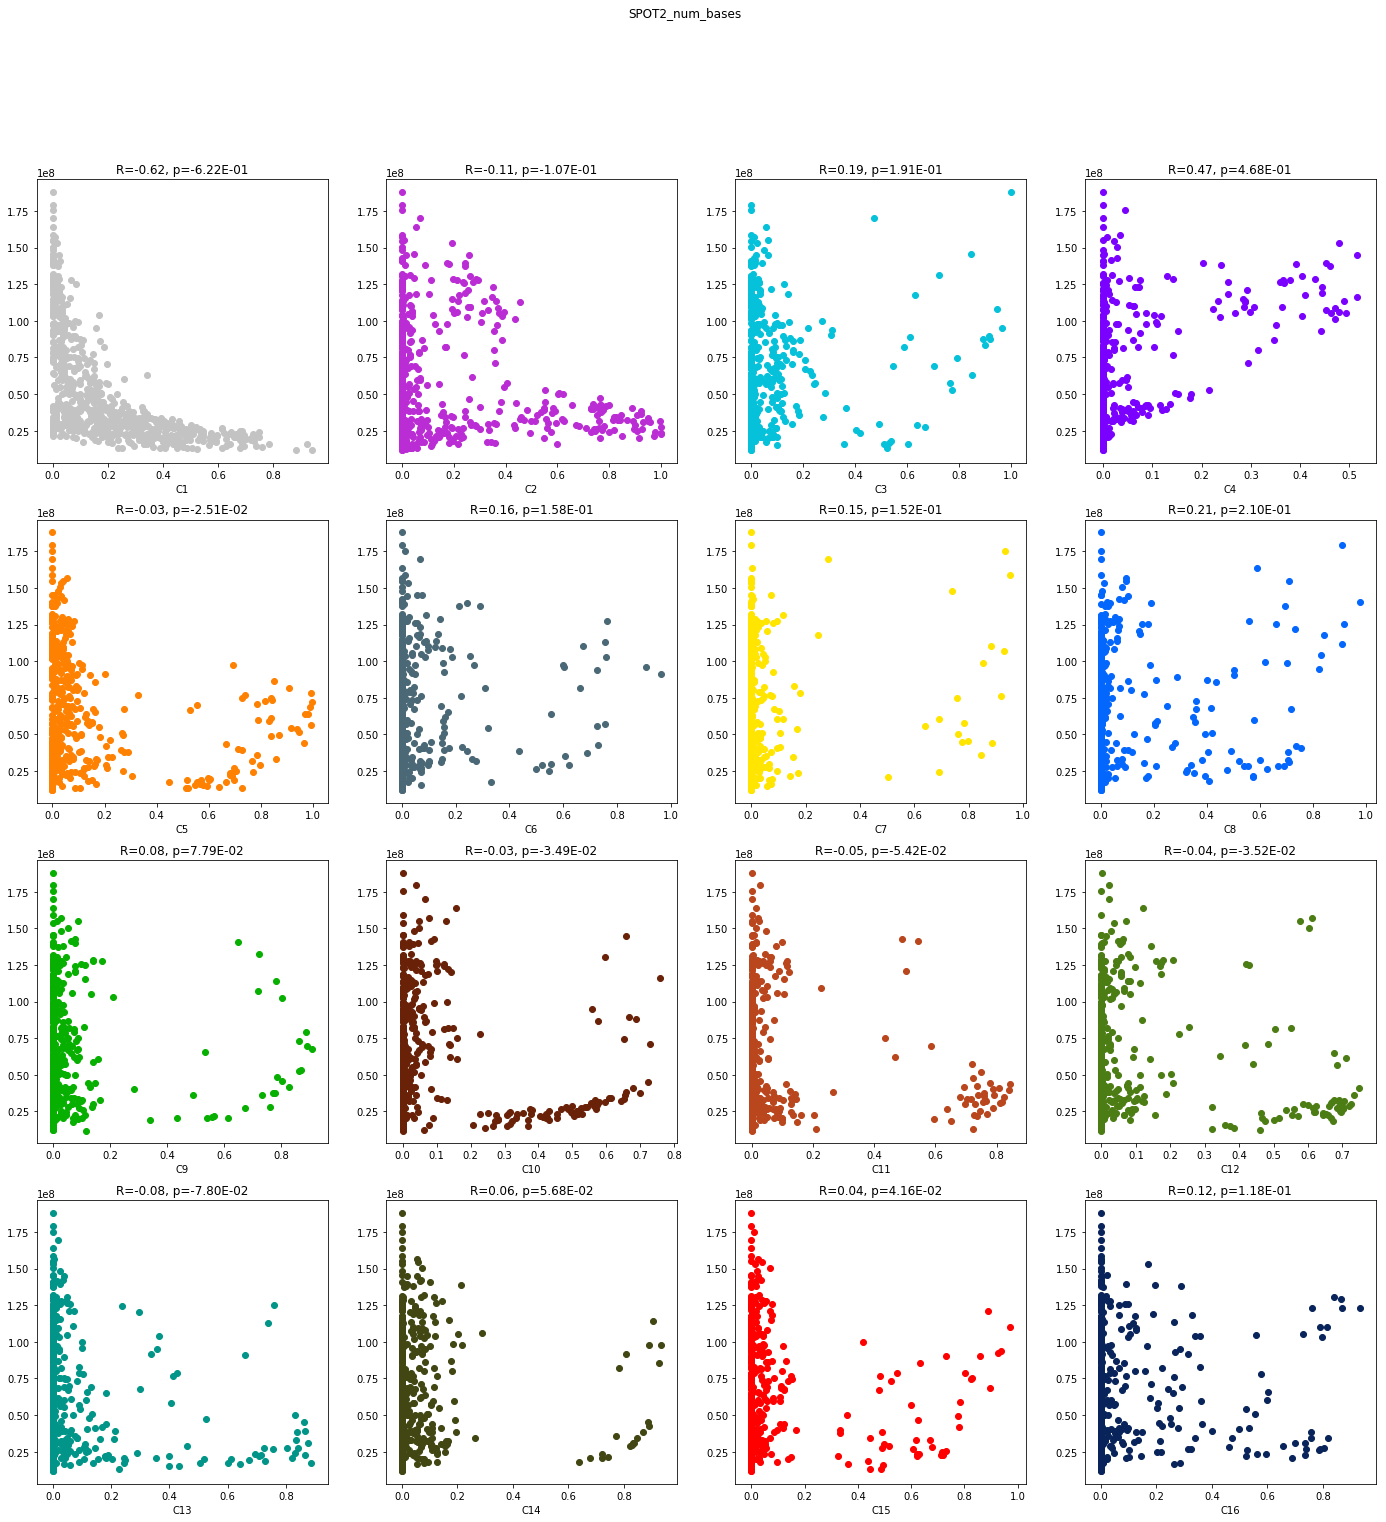

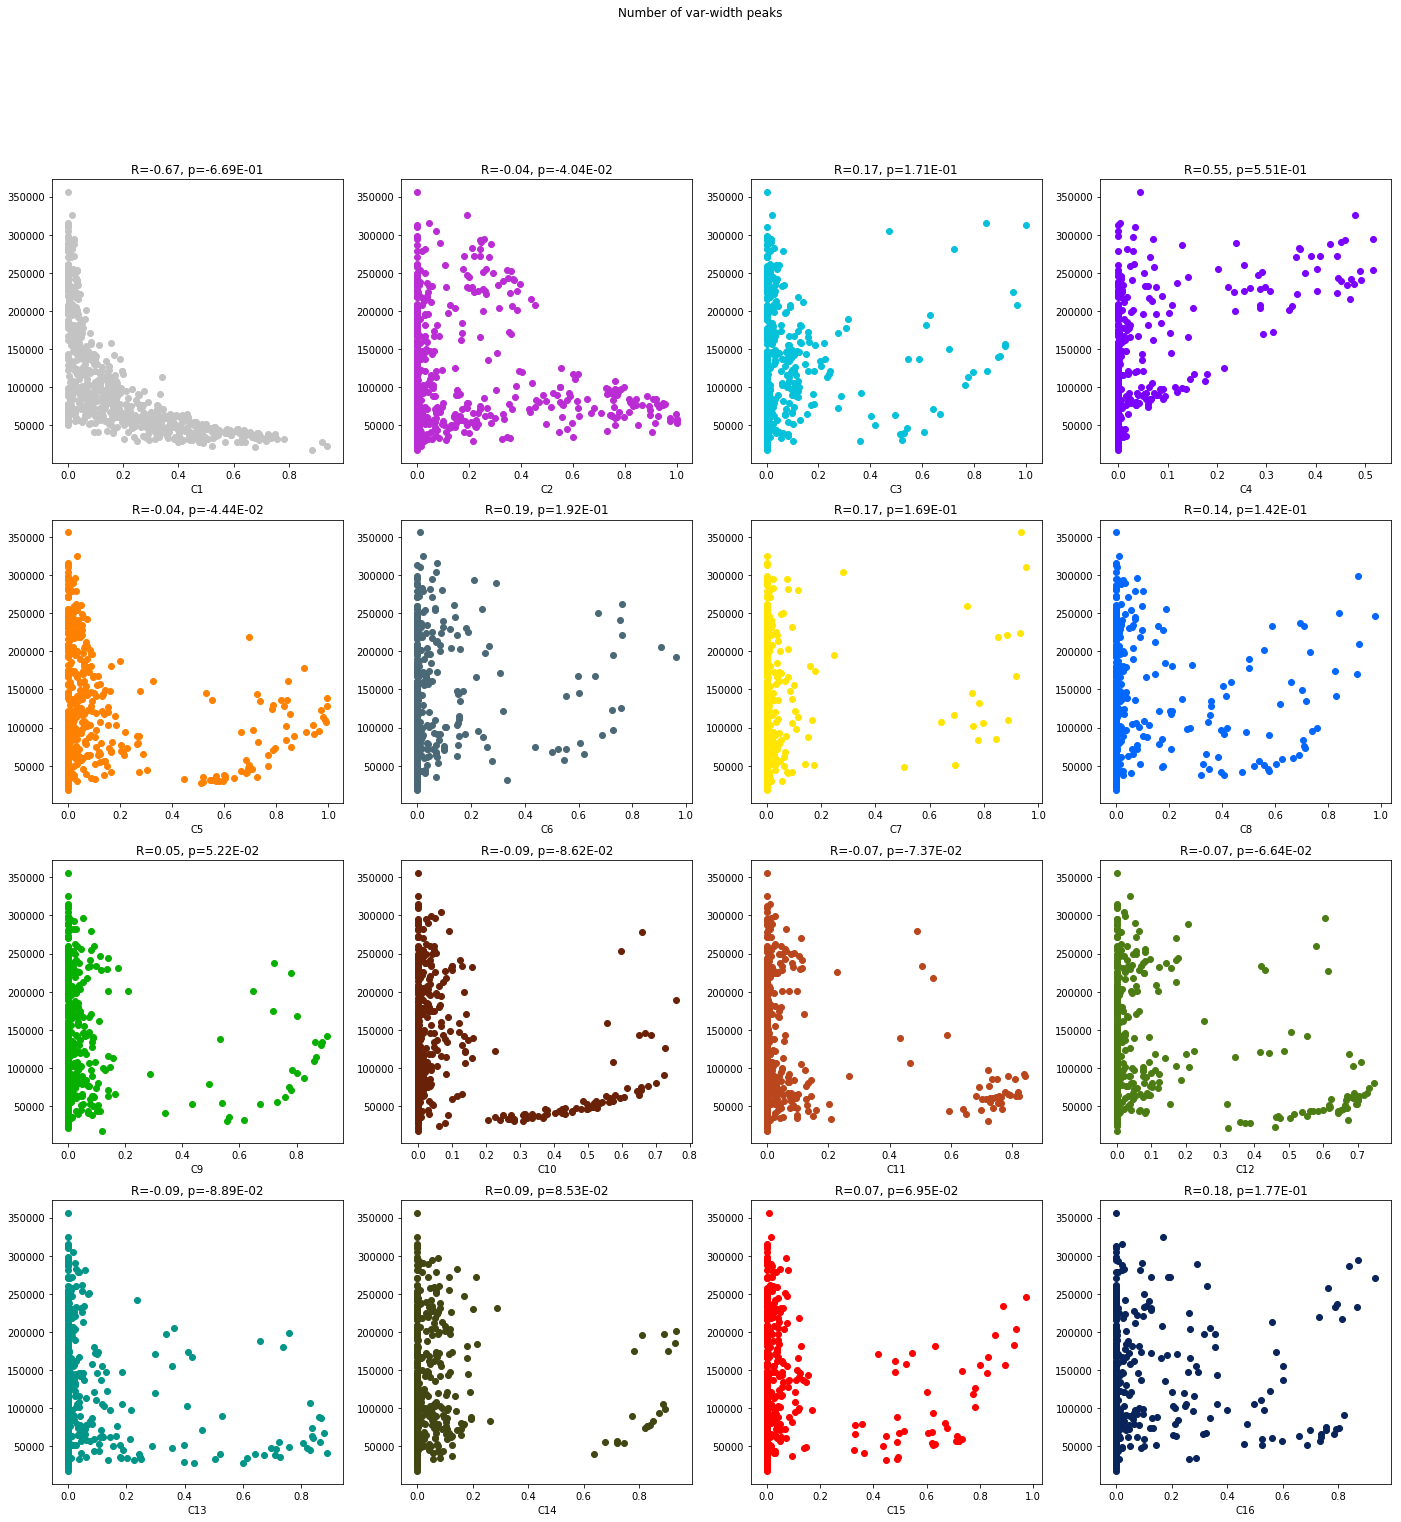

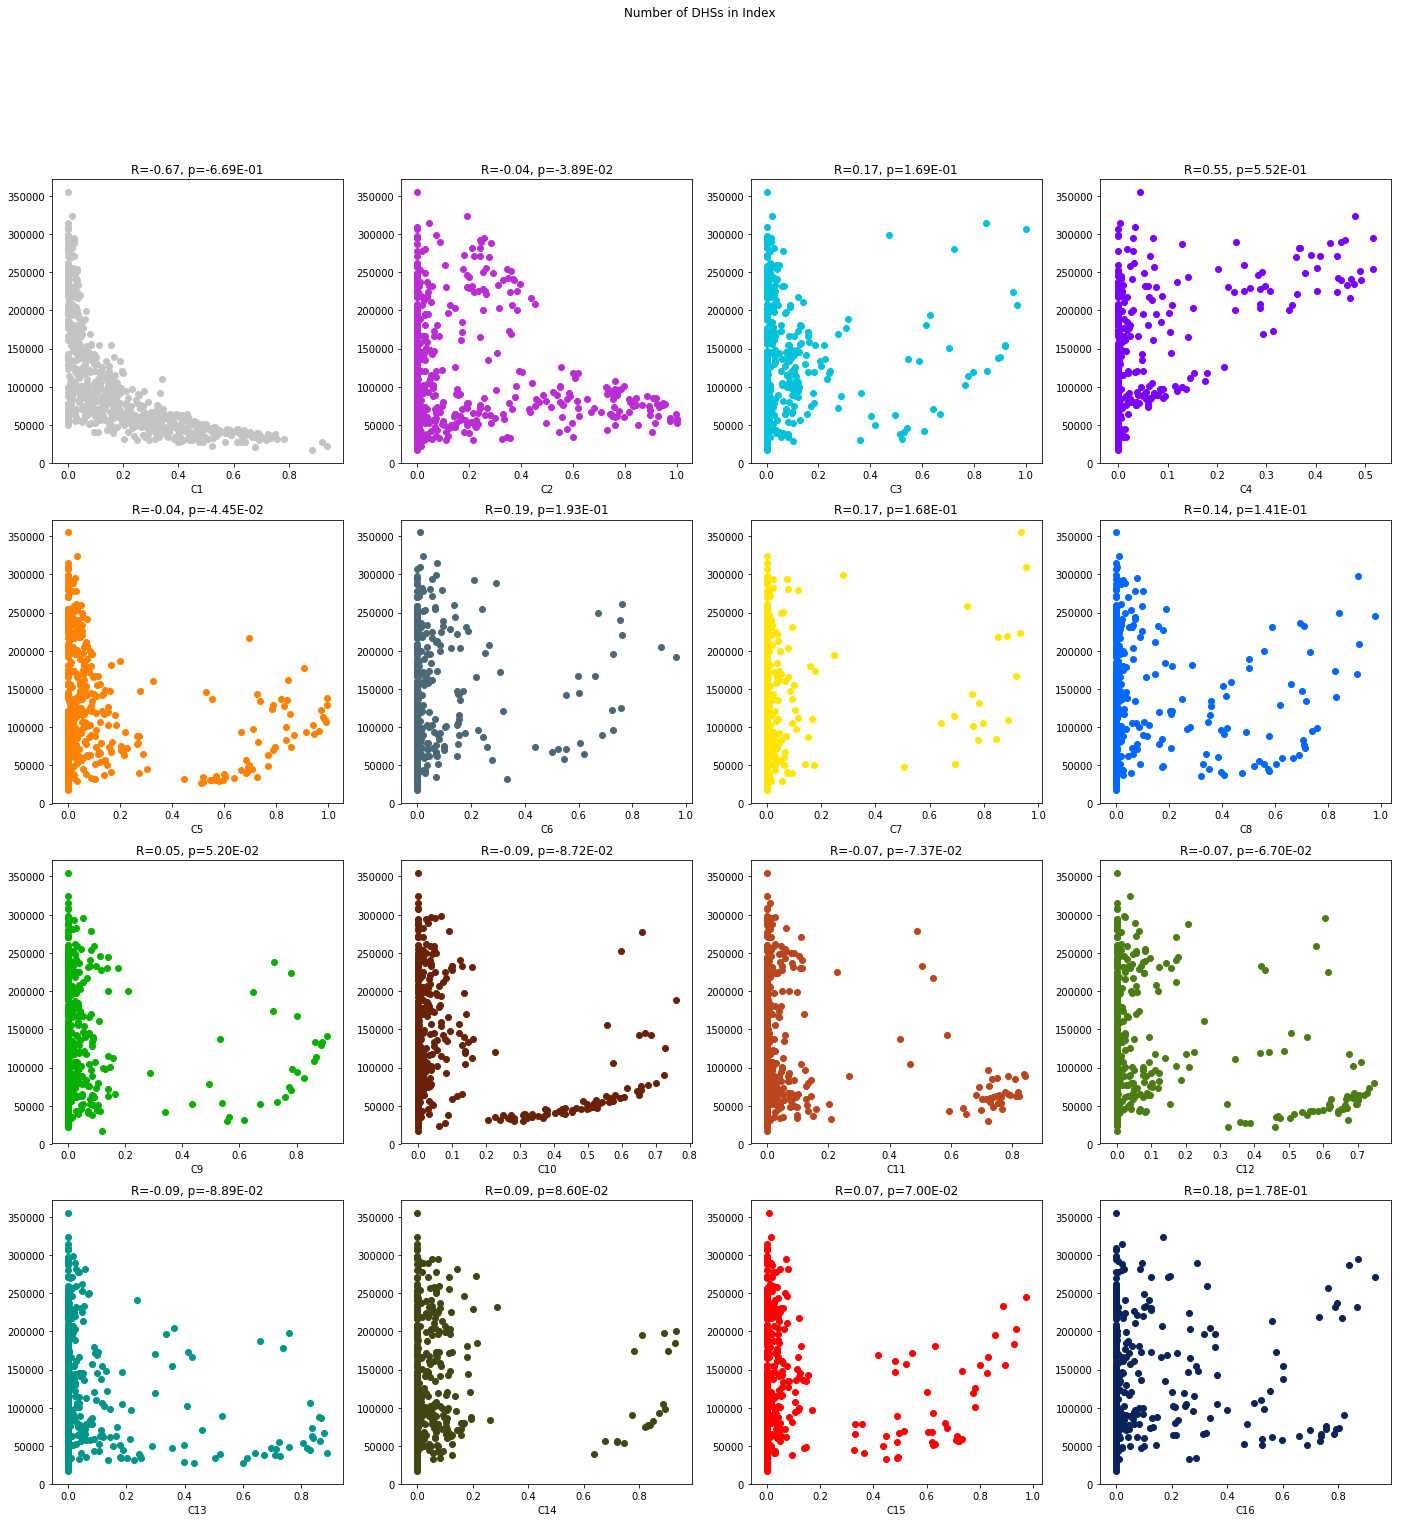

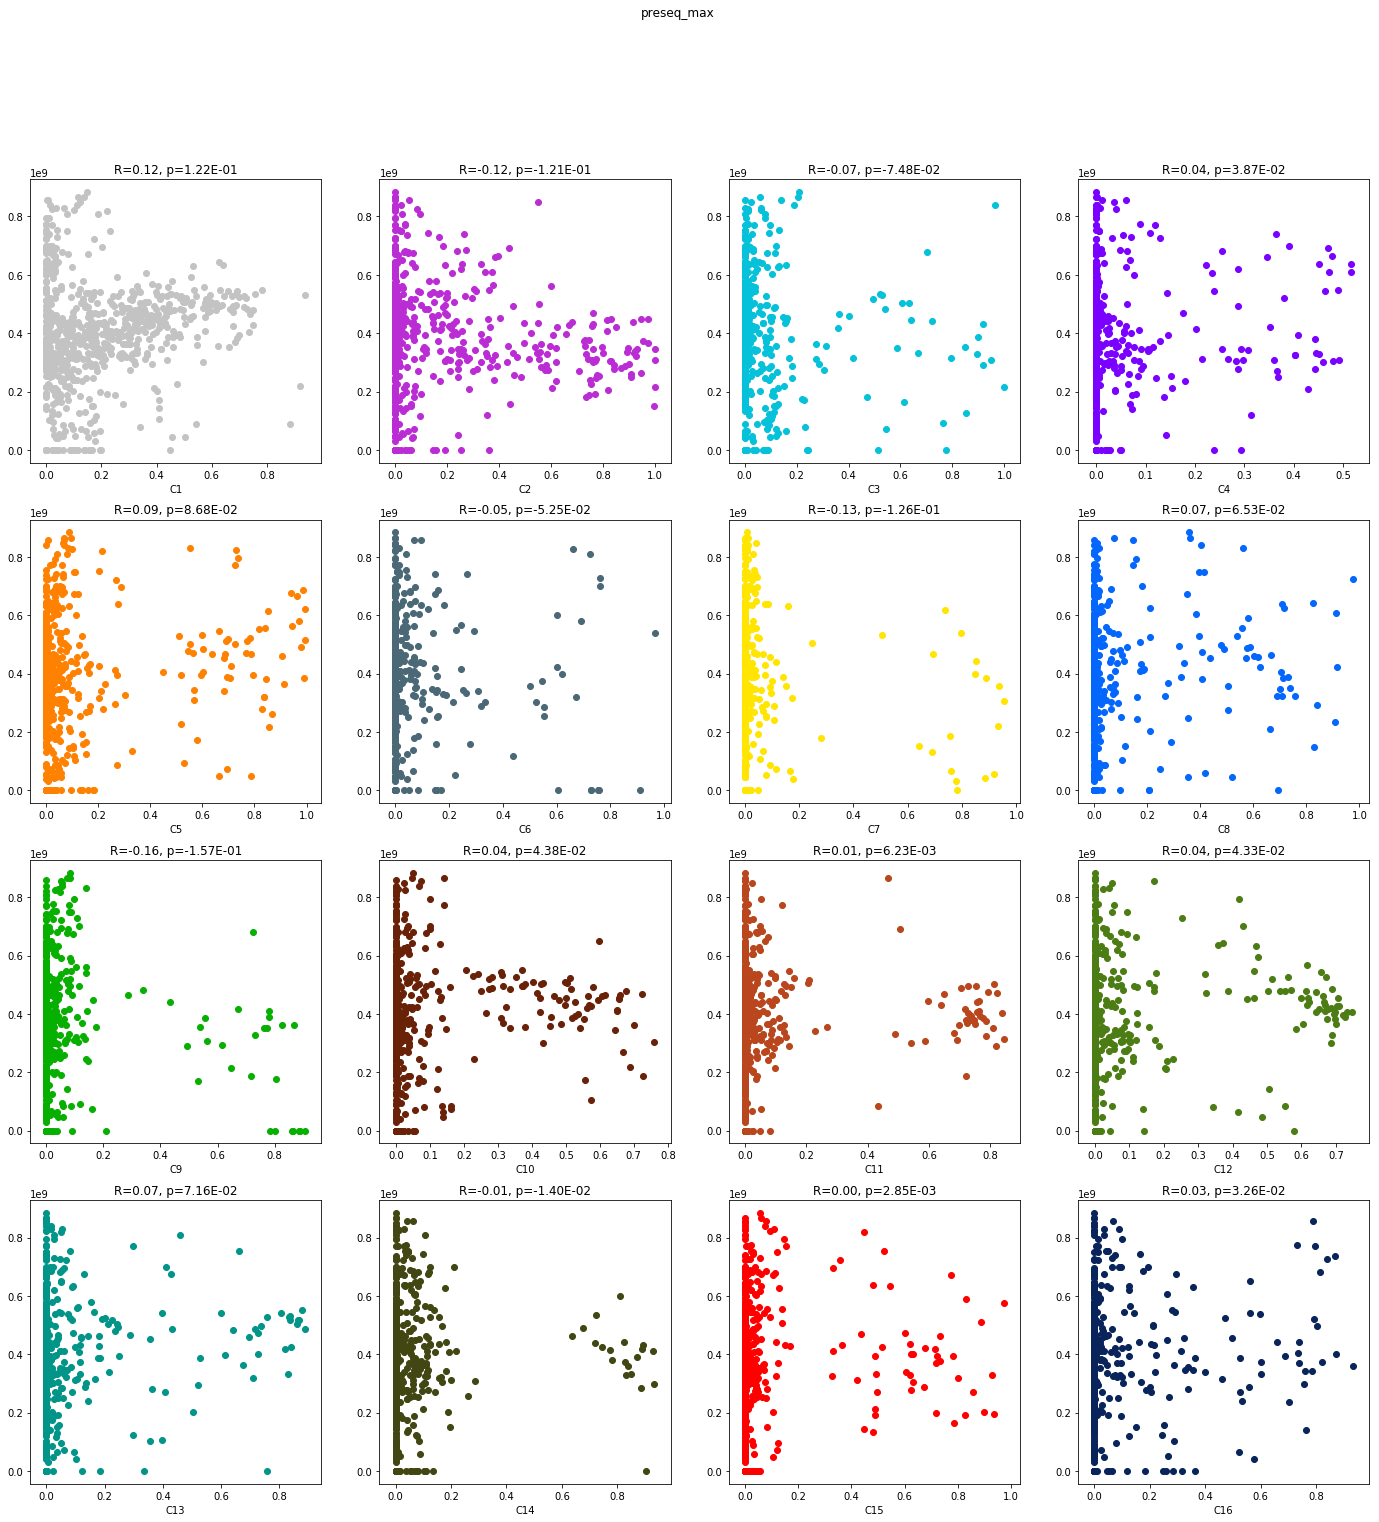

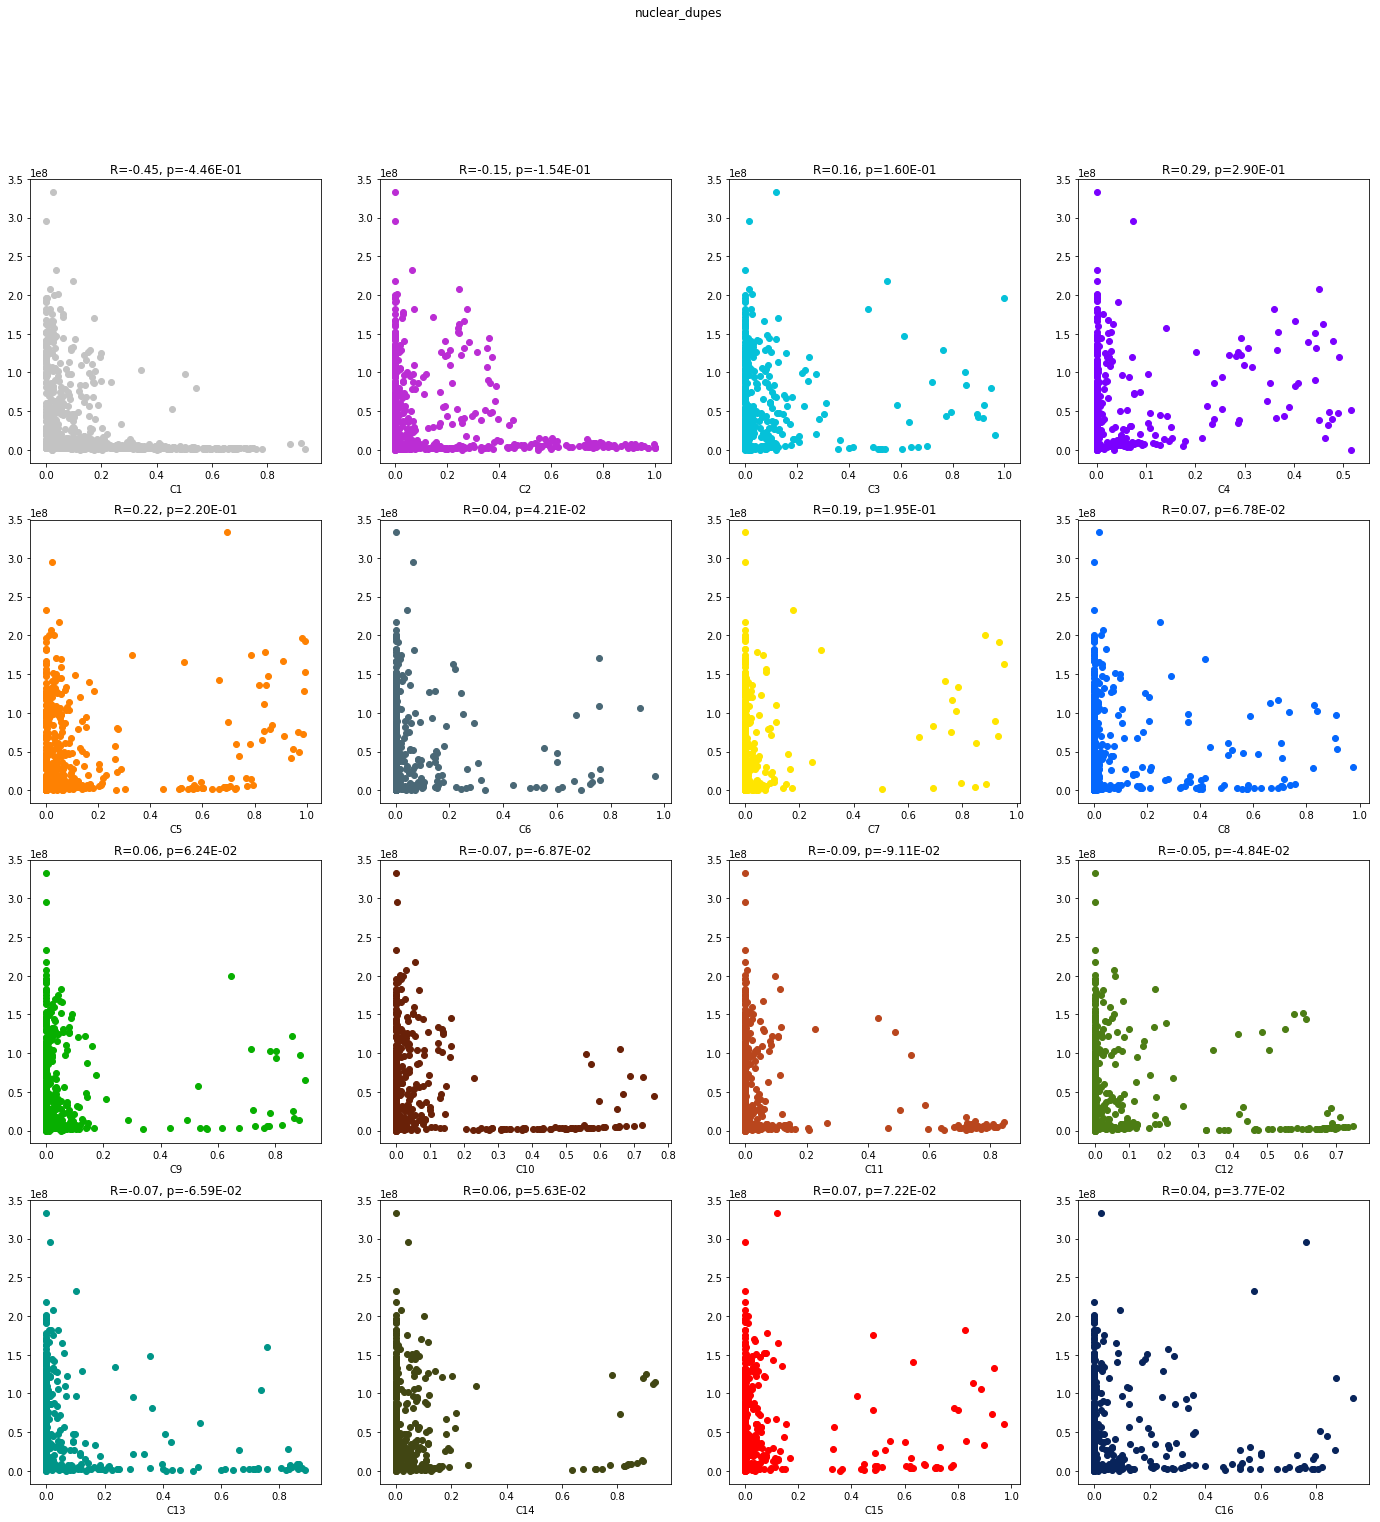

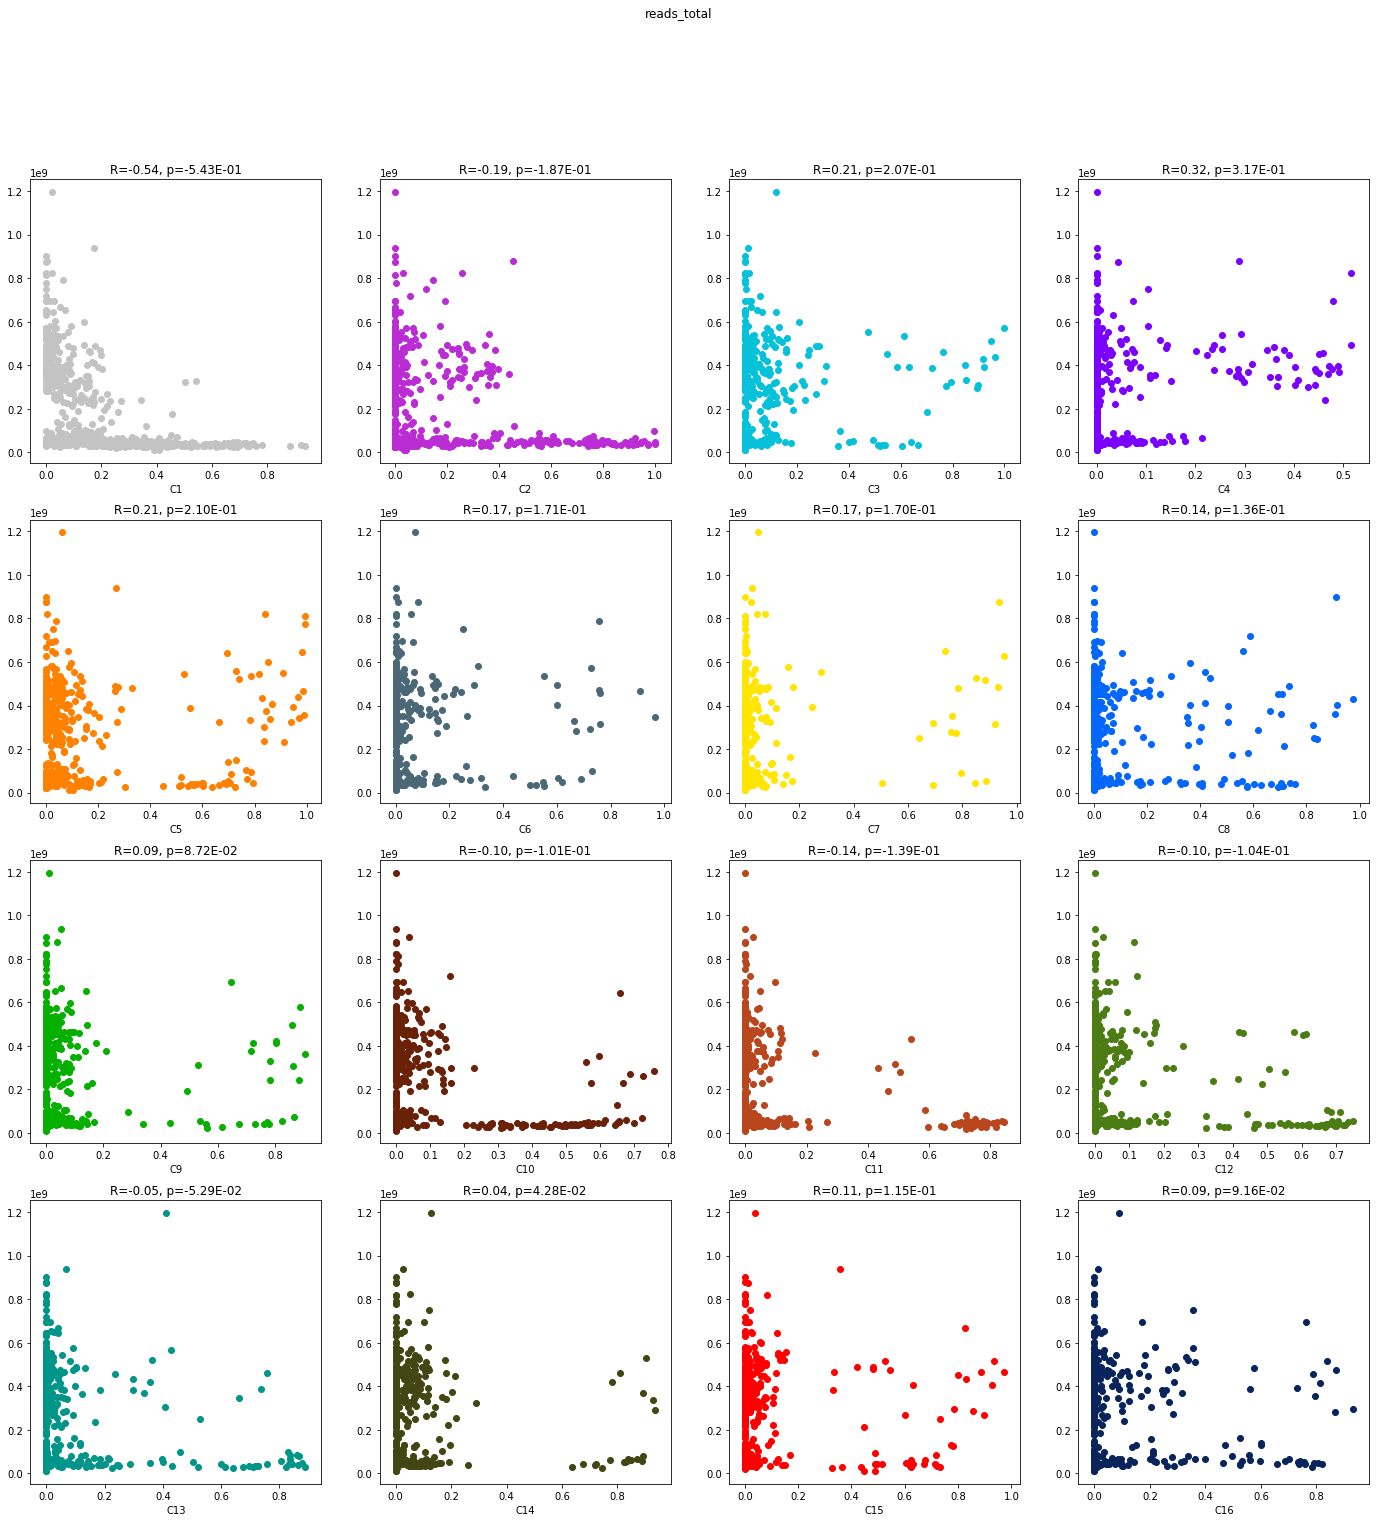

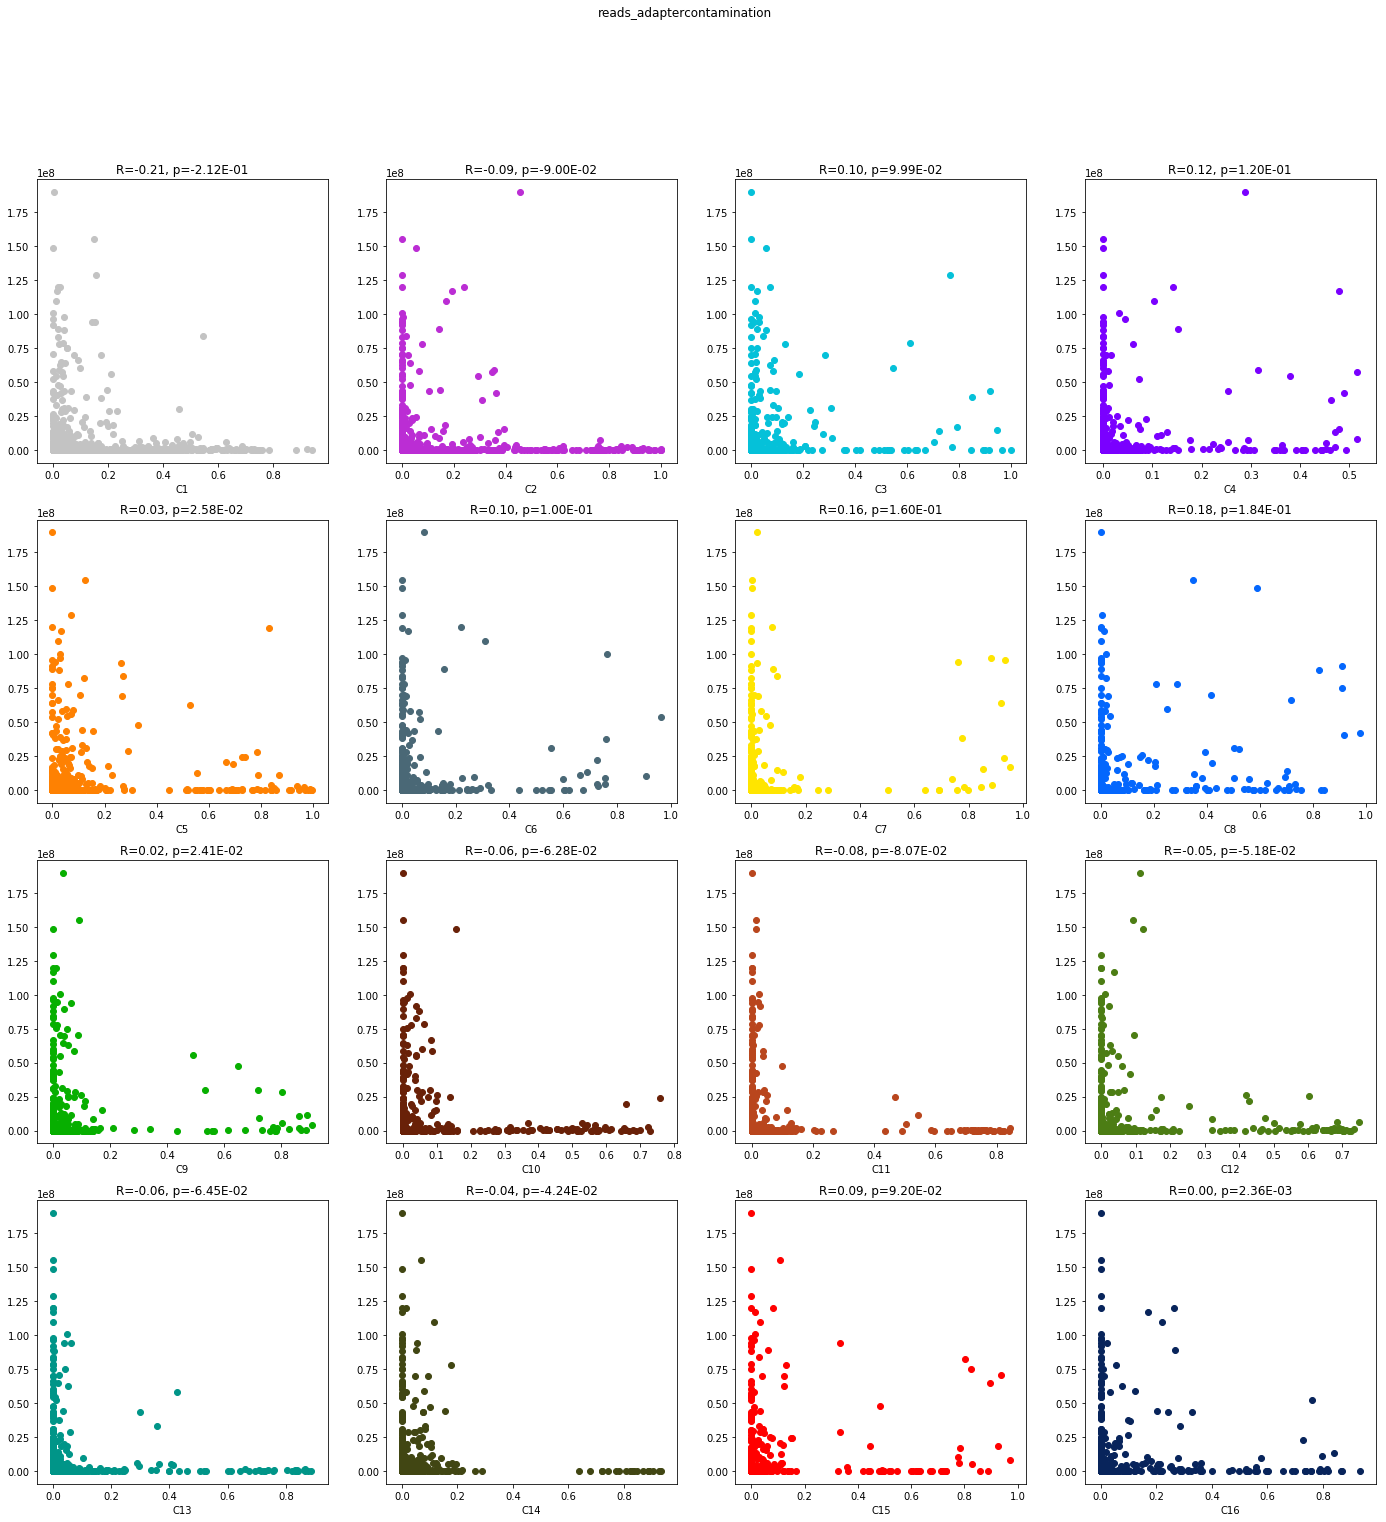

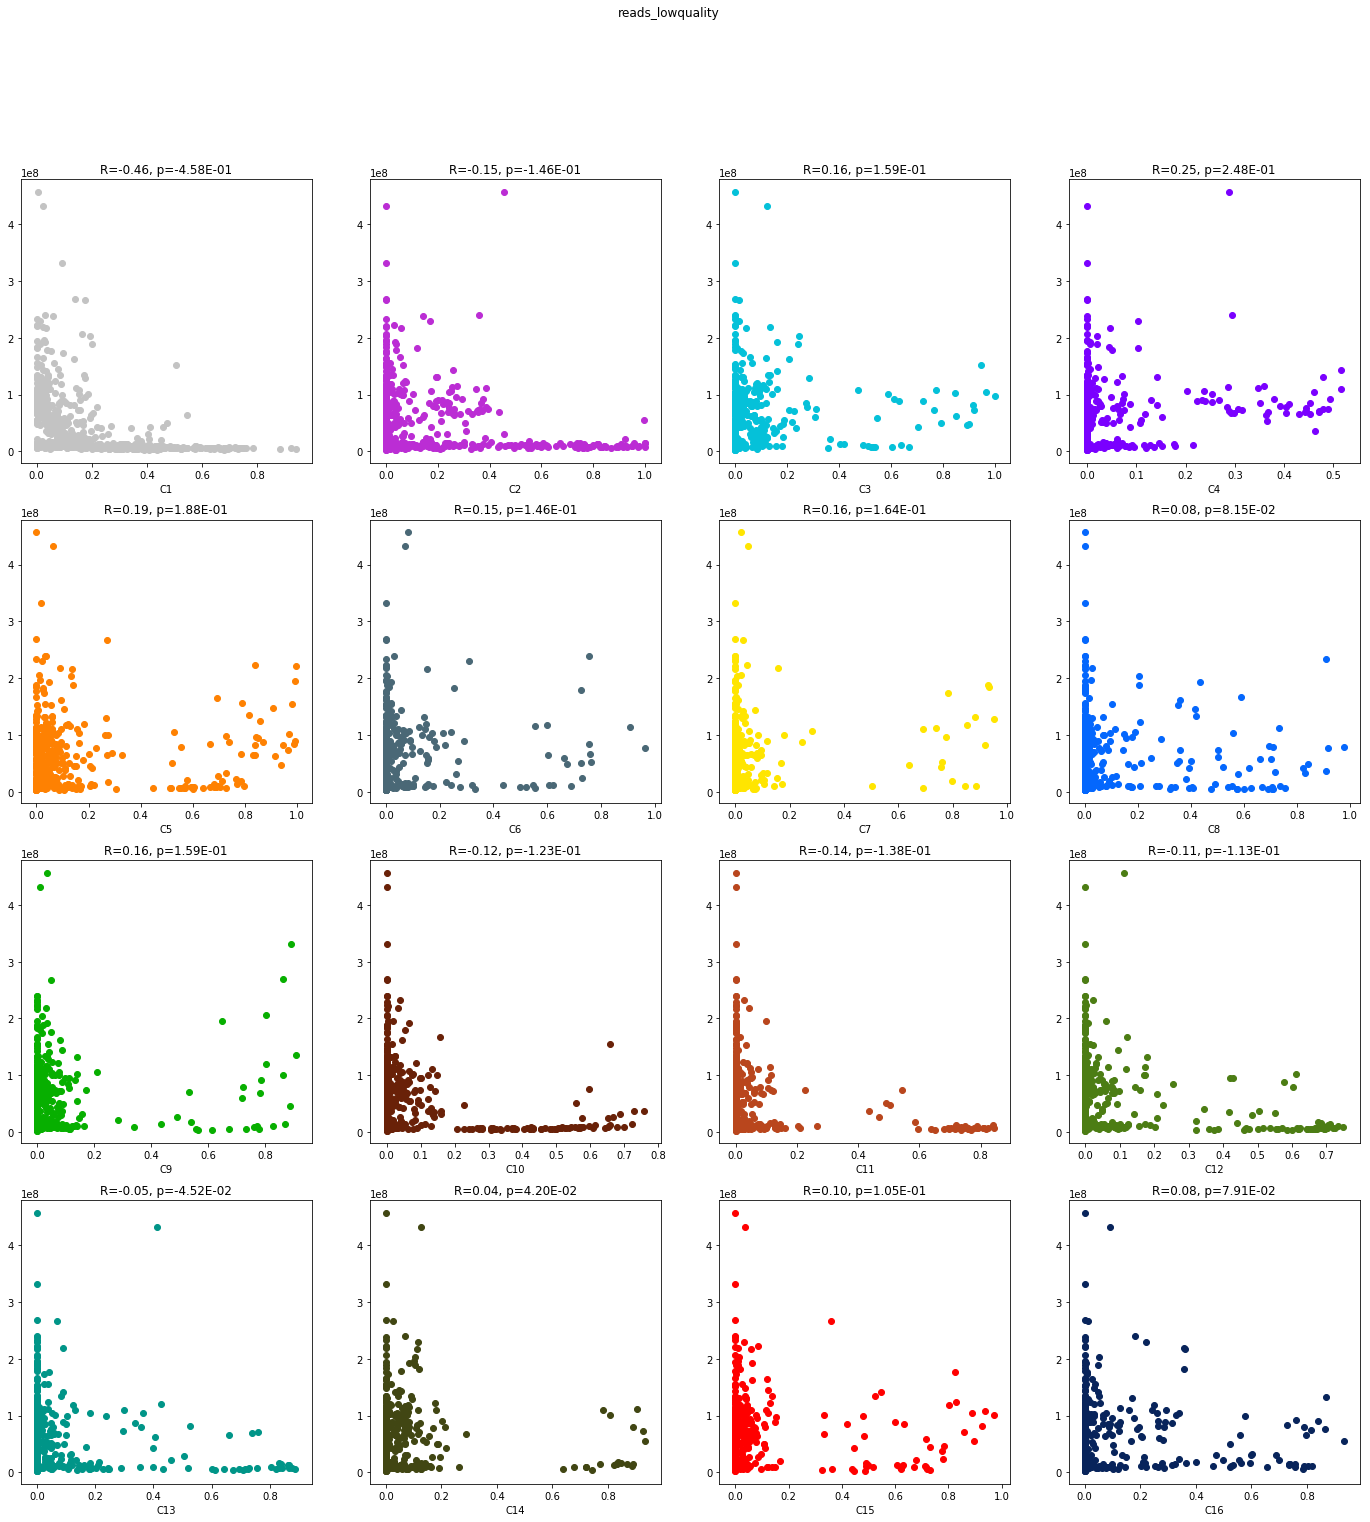

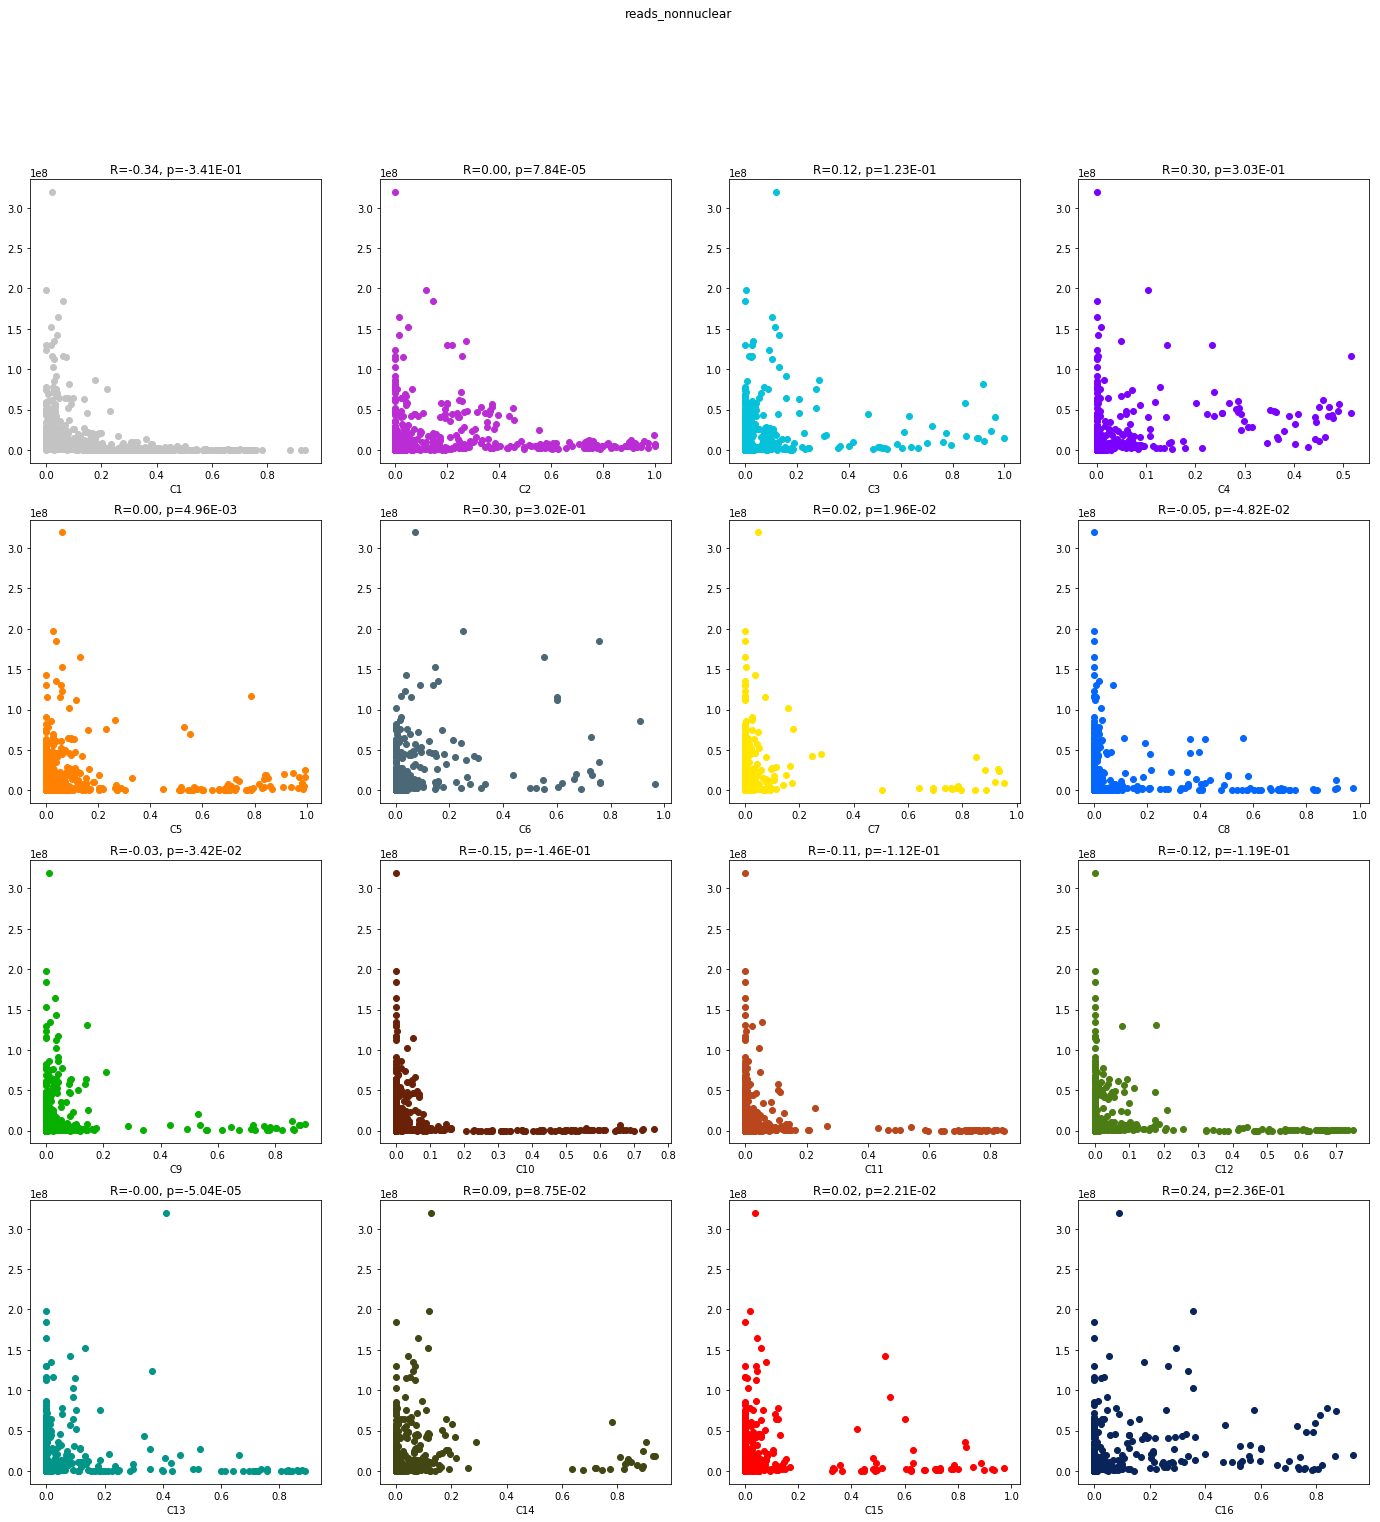

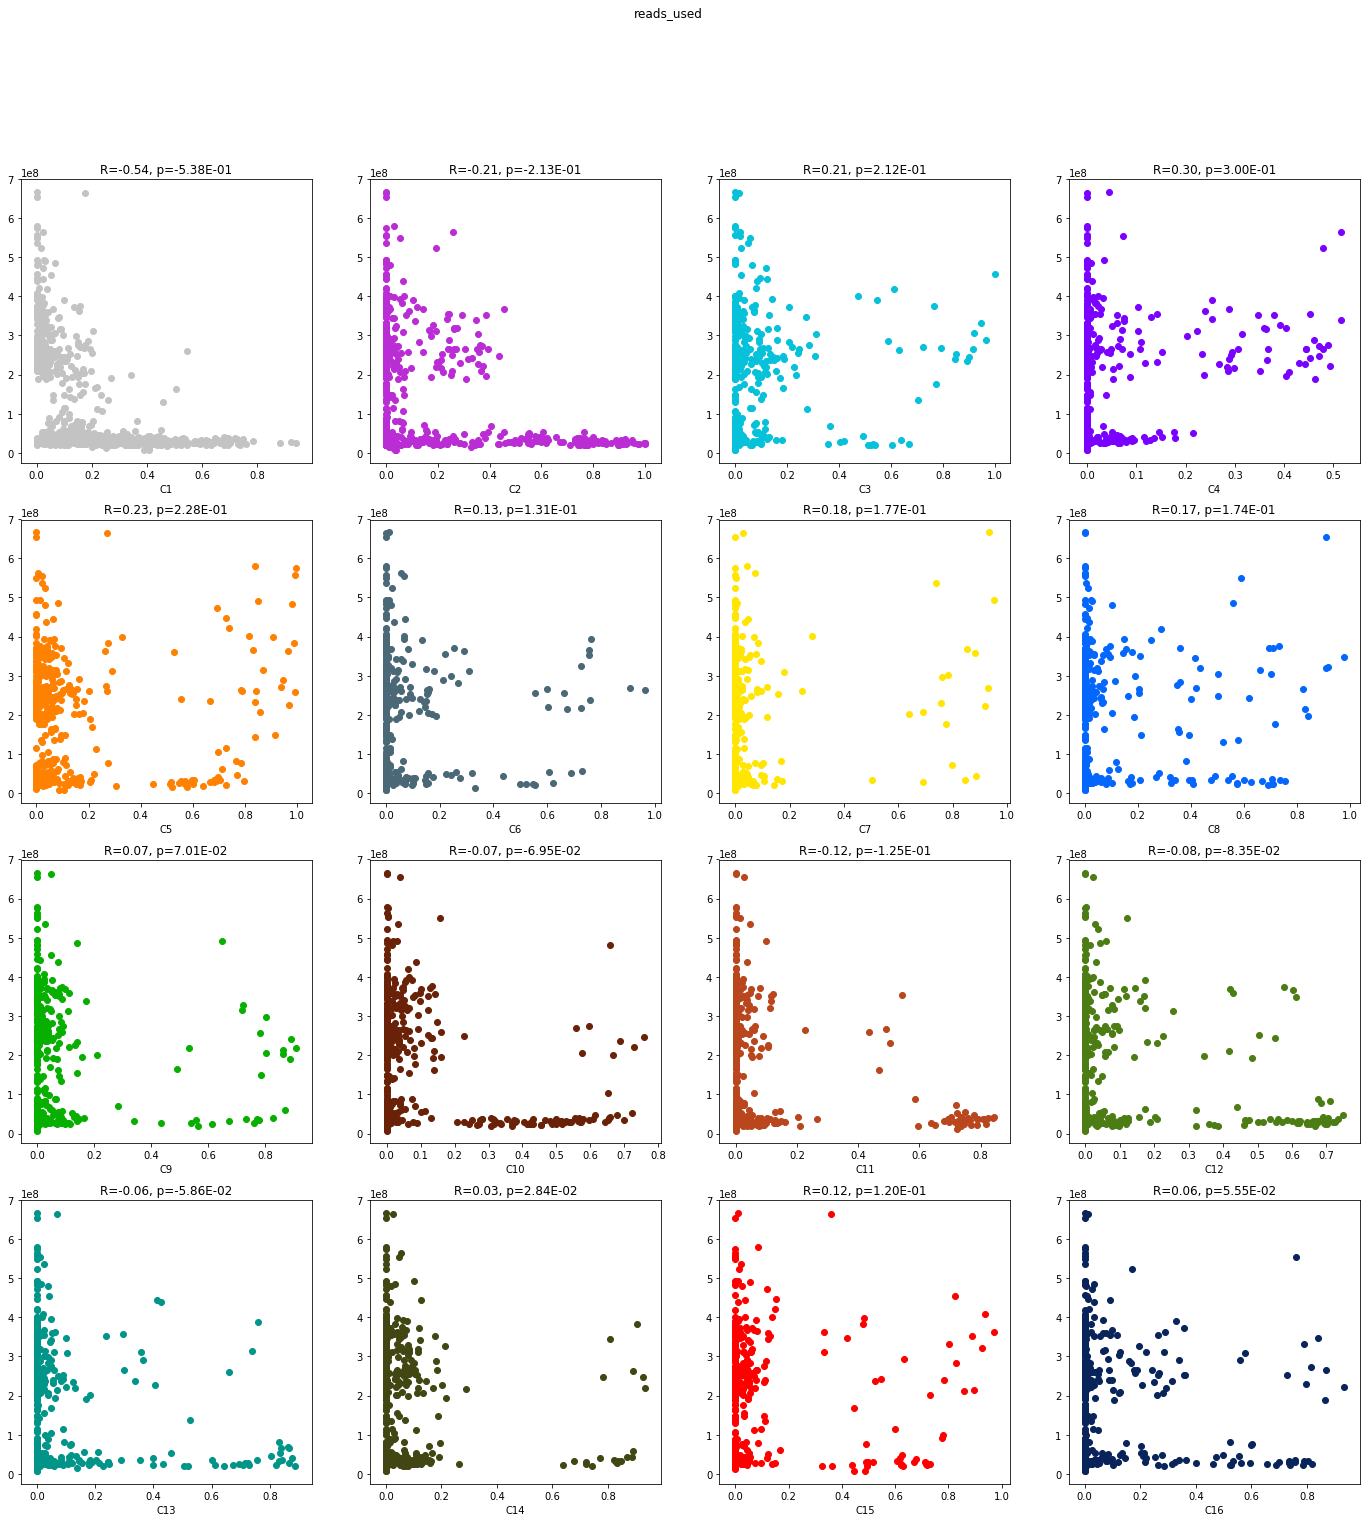

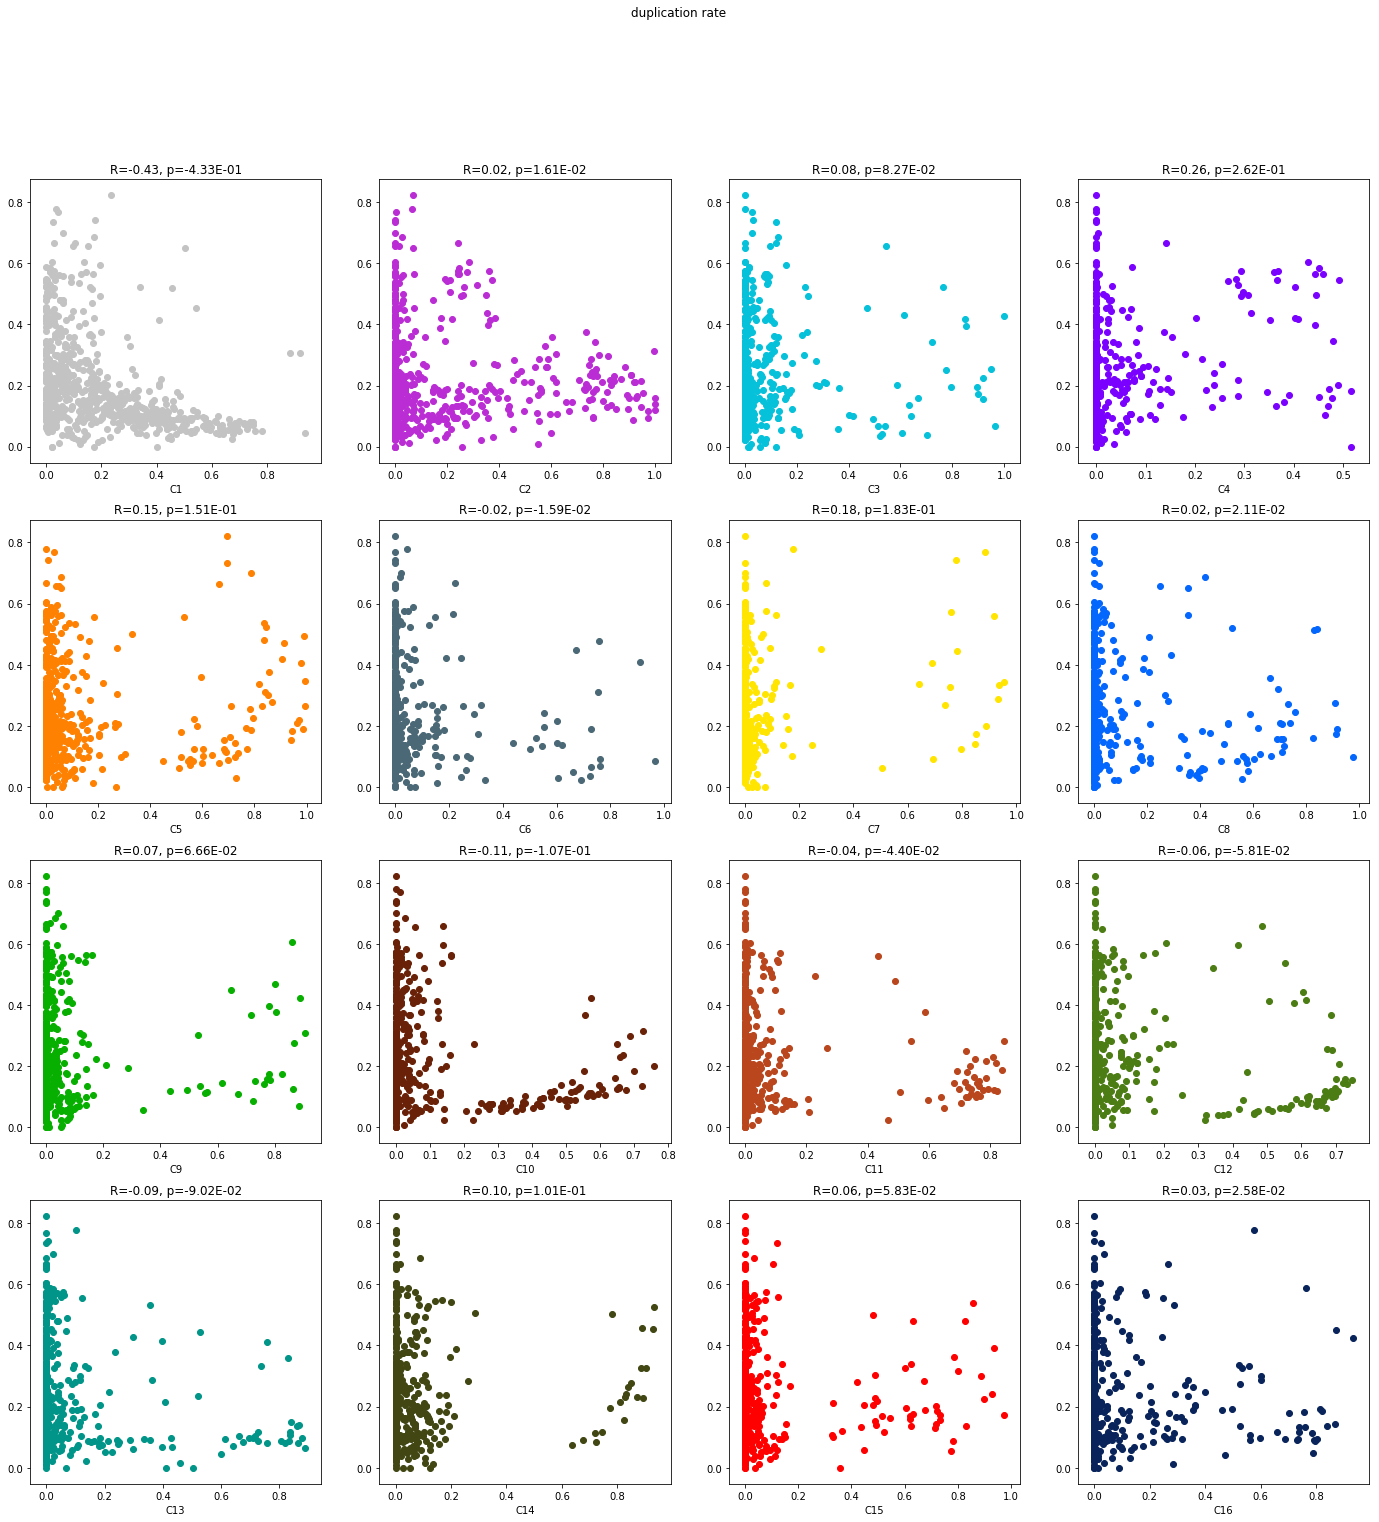

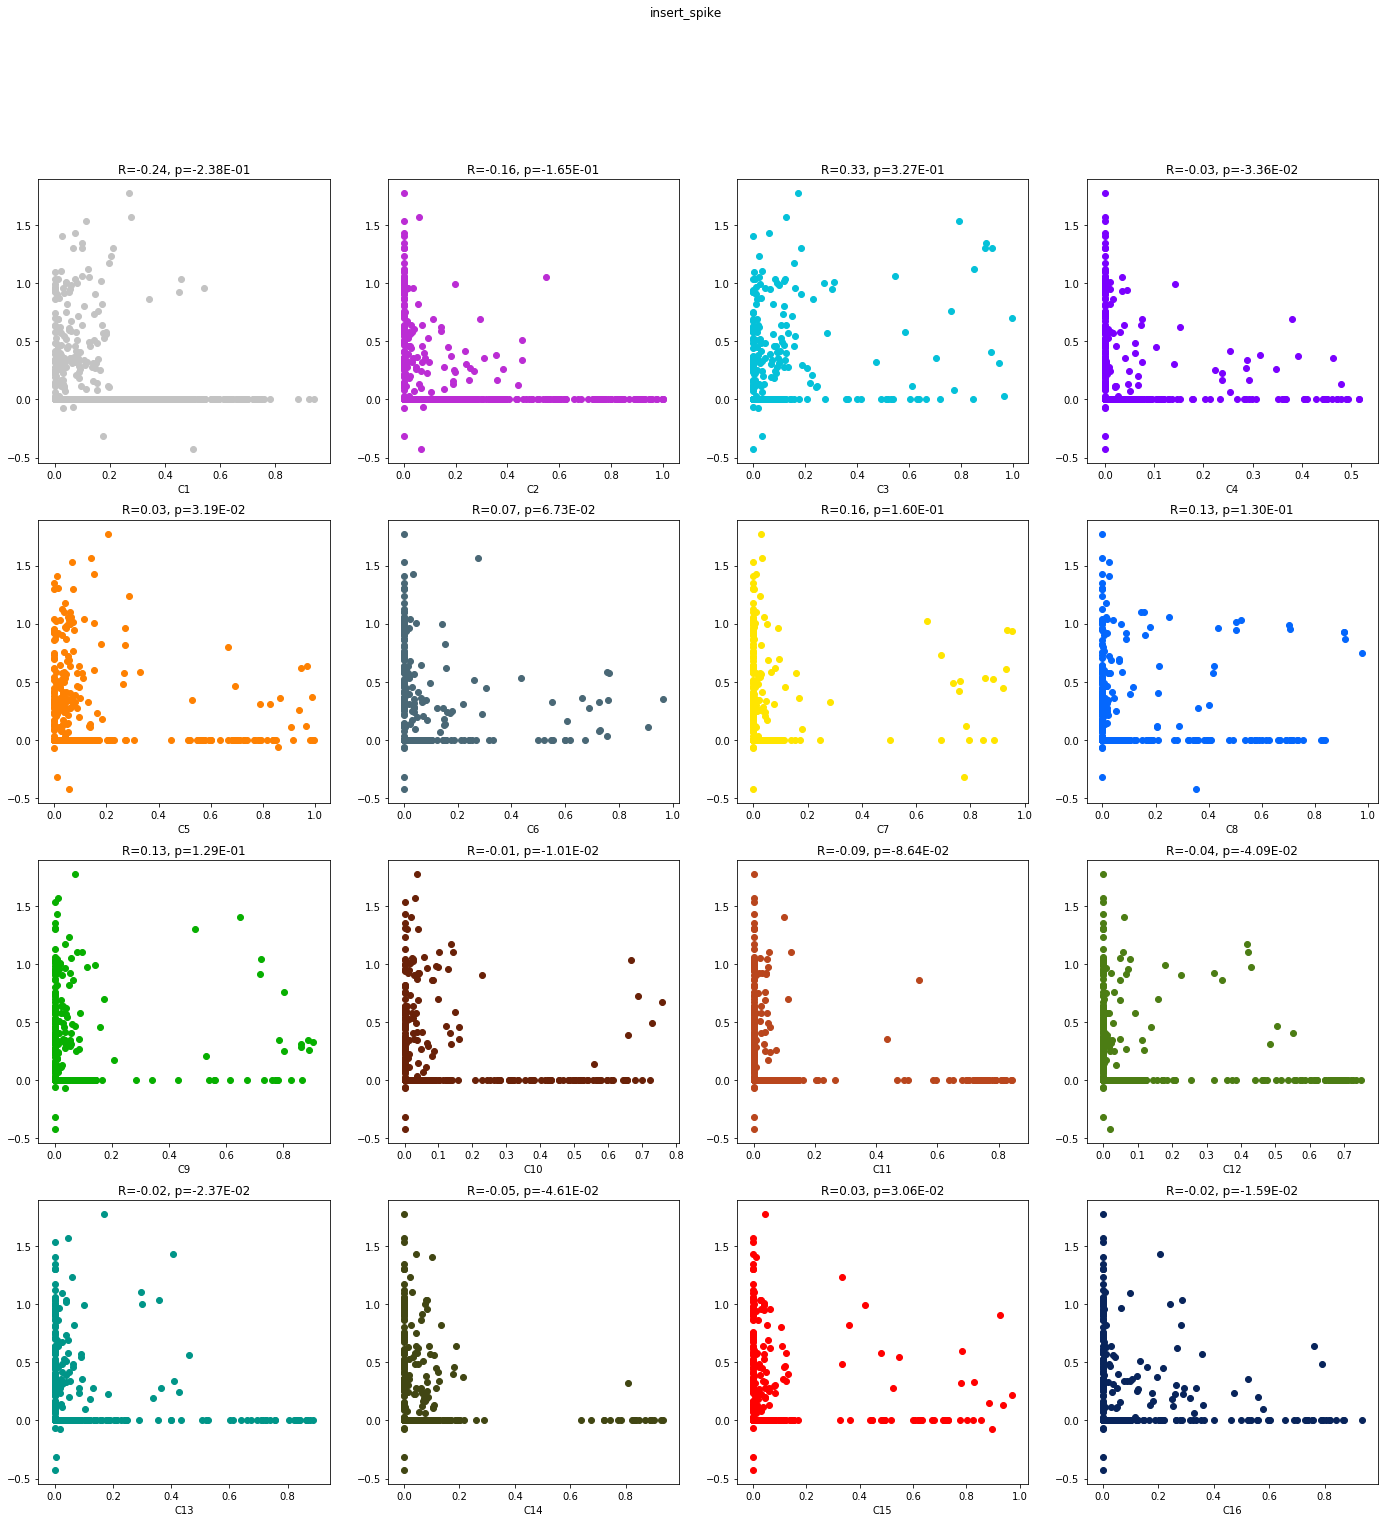

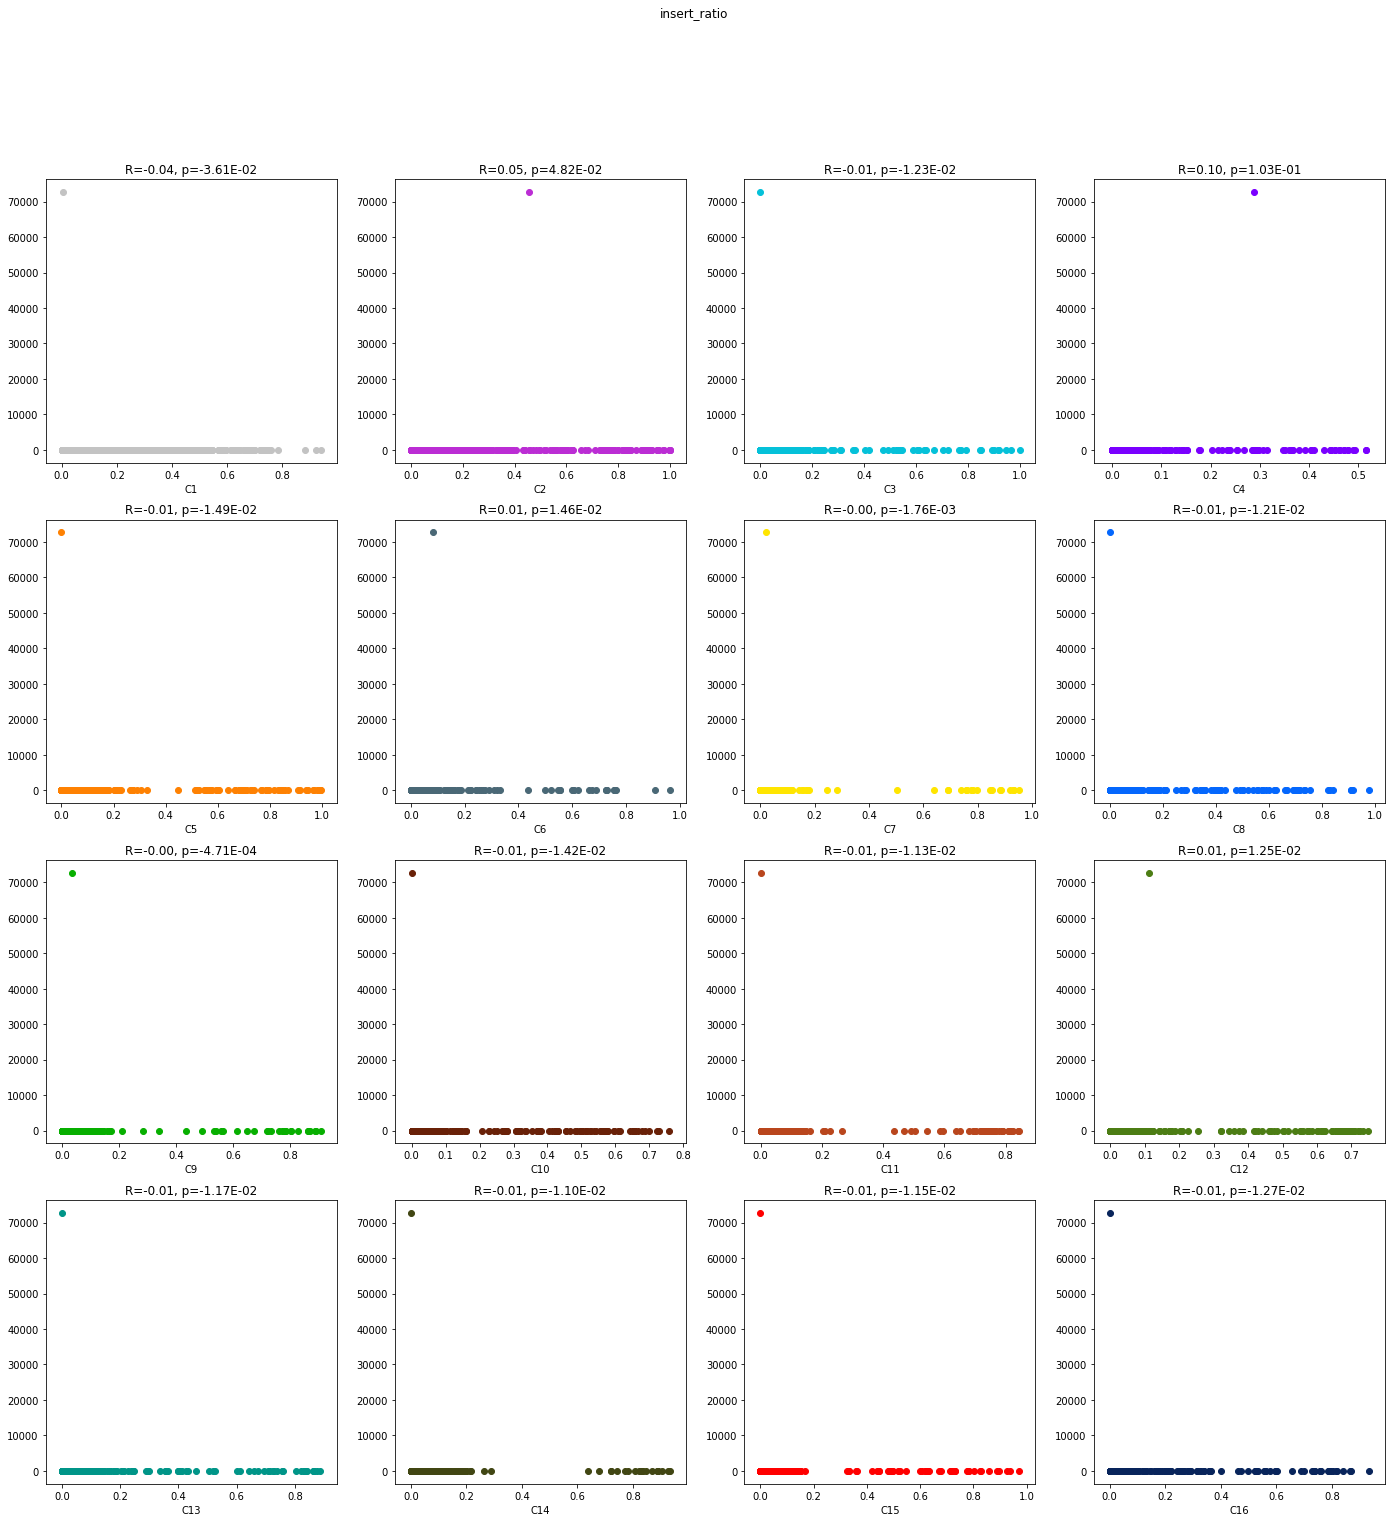

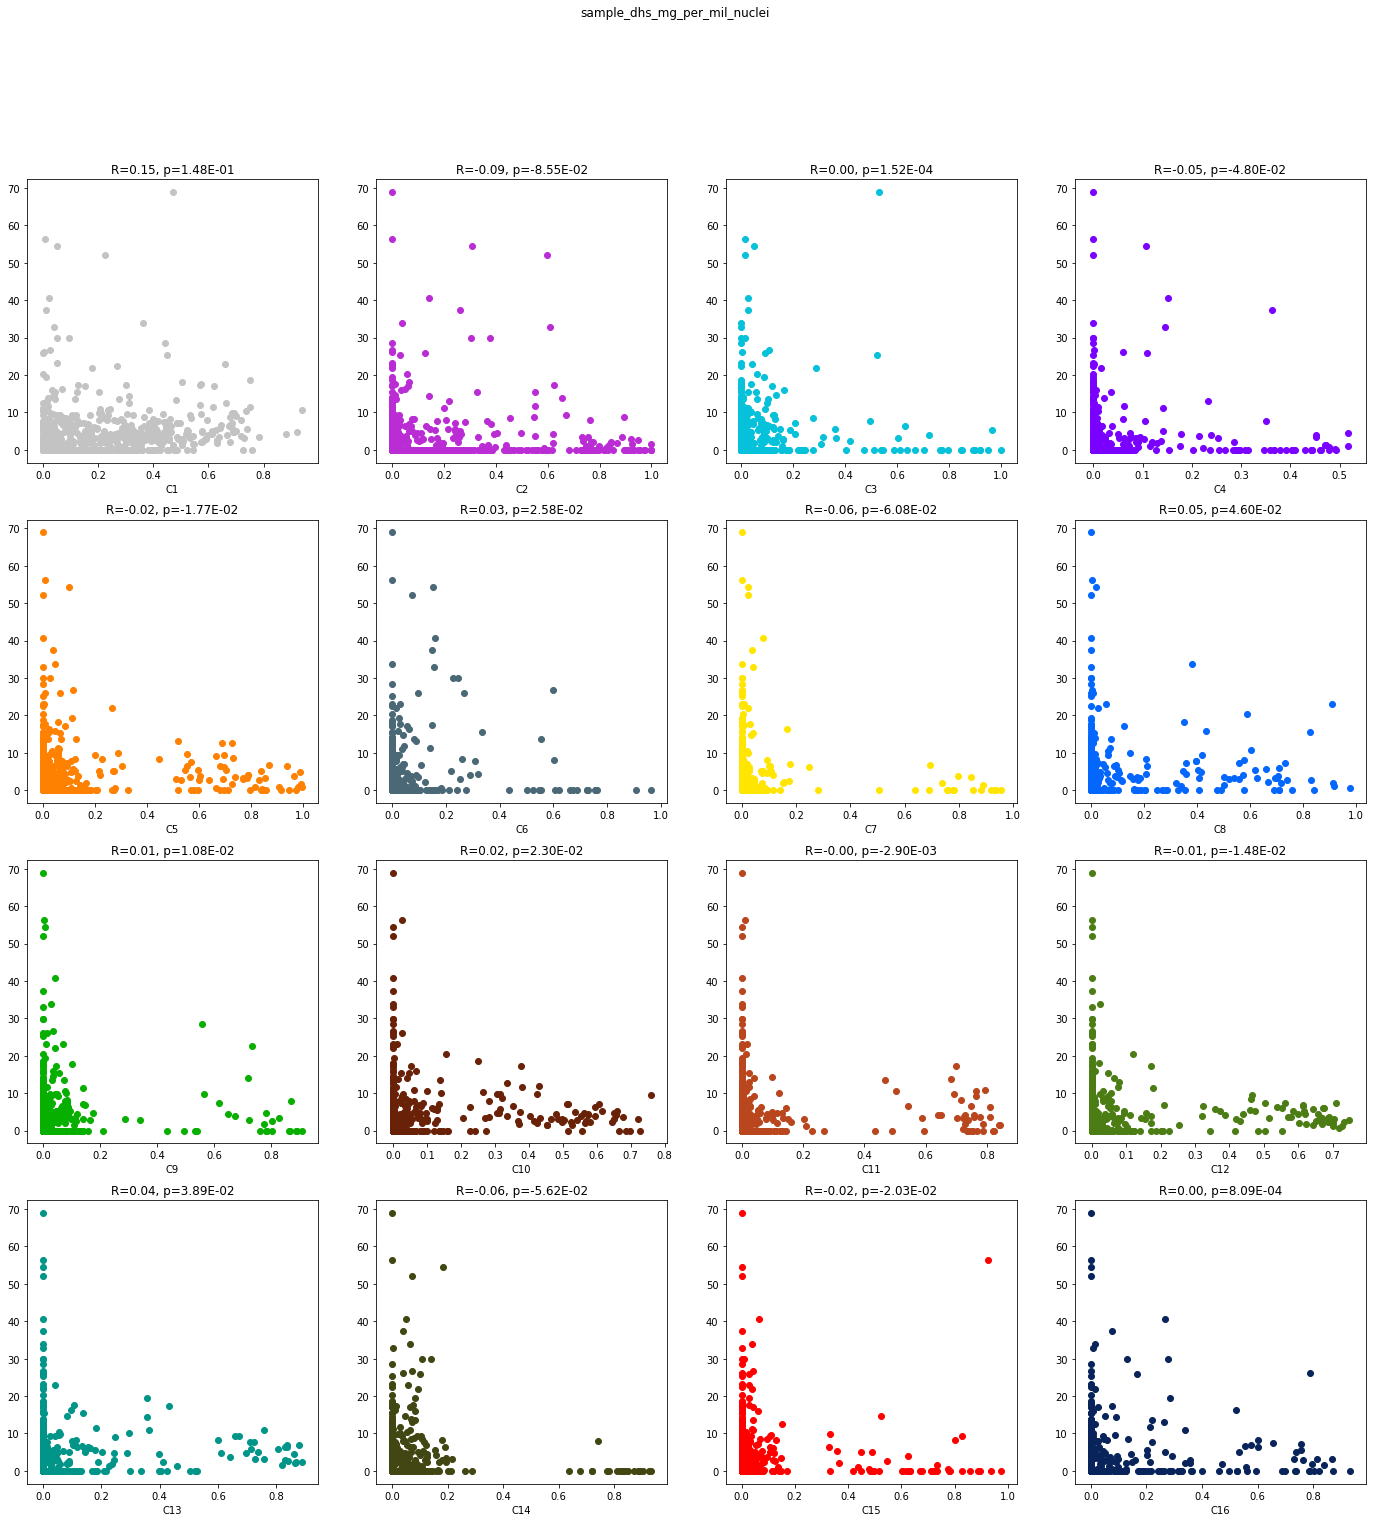

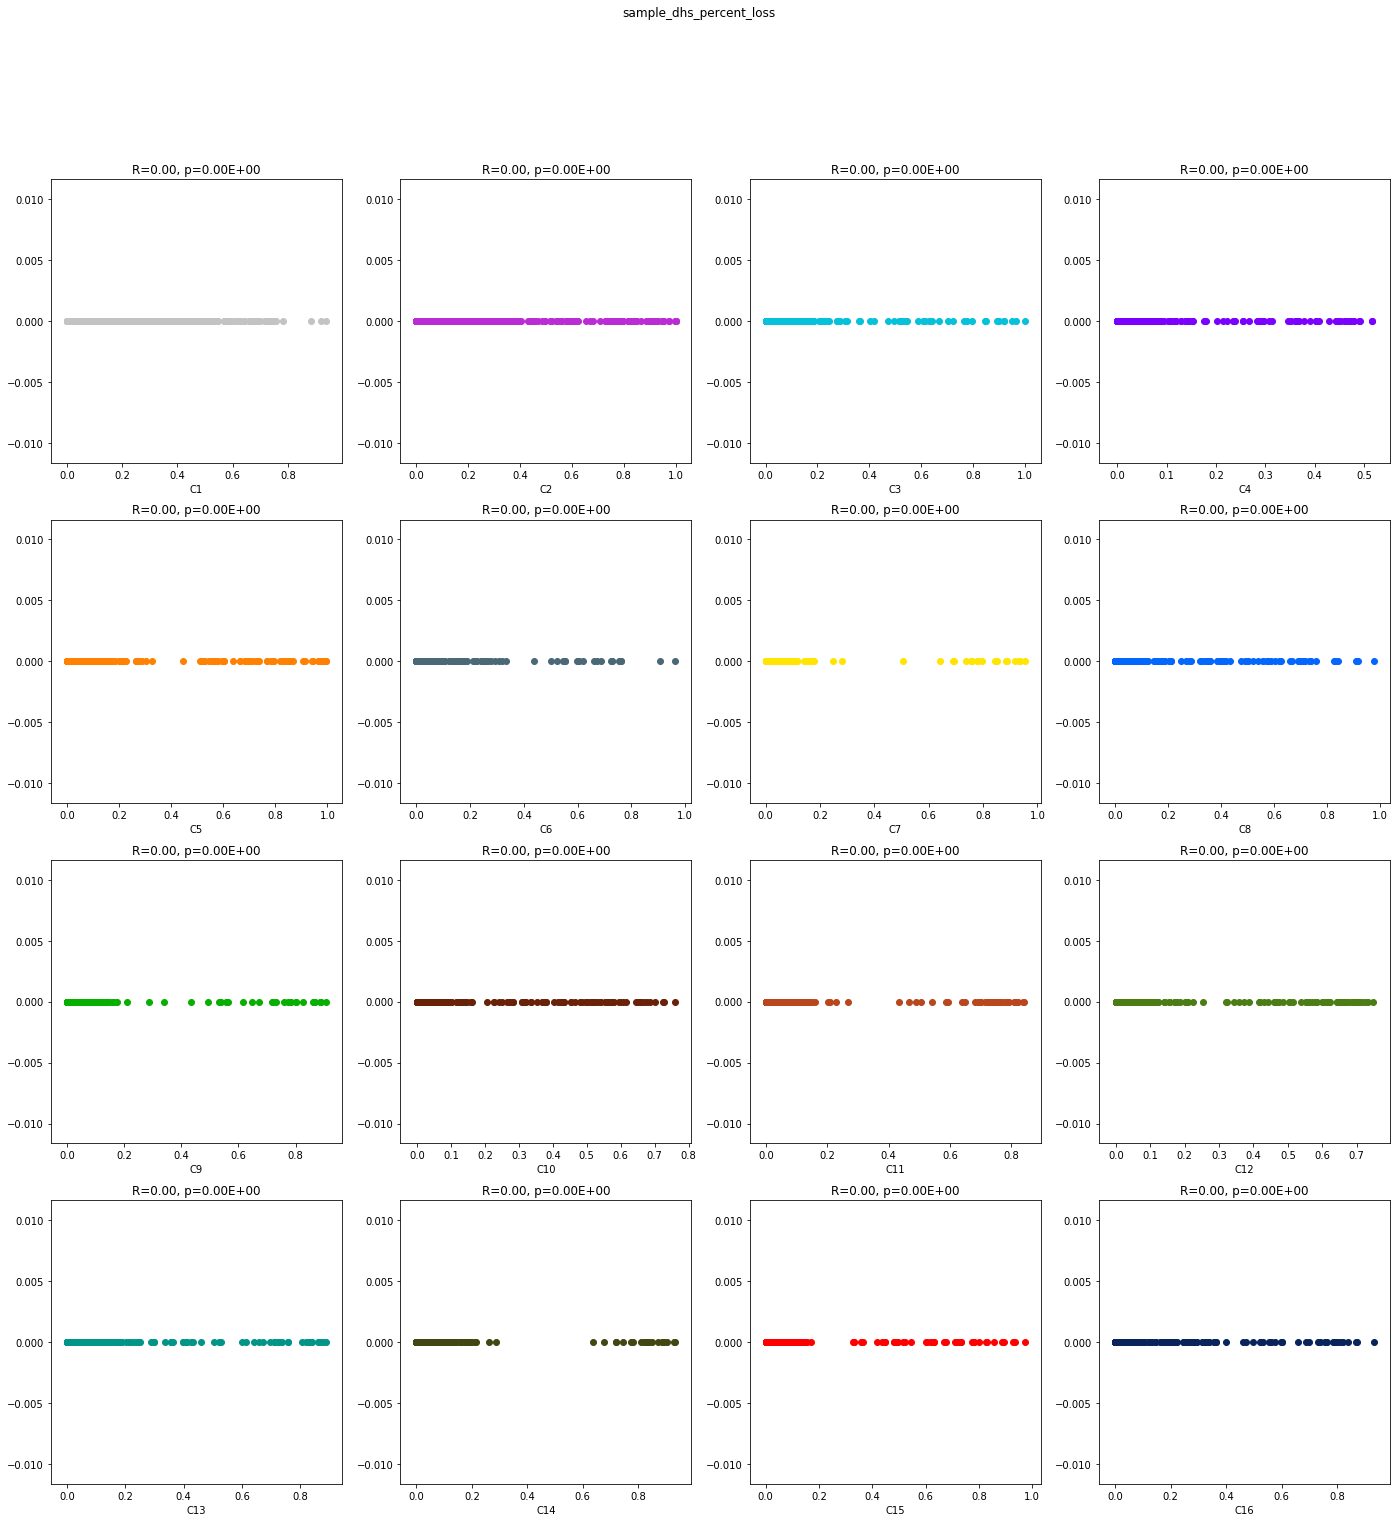

In [28]:
for cat in non_object_cats[non_object_cats].keys().values:
    #print(cat, metadata[cat])
    fig, ax = plt.subplots(4,4, figsize=(24,24))
    for i in range(k):
        ax[i//4,i%4].scatter(decomp.NormedBasis[:,i], MetaData[cat].fillna(0), marker='o', color = decomp.Comp_colors[i])
        ax[i//4,i%4].set_xlabel('C'+str(i+1))
        myregress = linregress(decomp.NormedBasis[:,i], MetaData[cat].fillna(0))
        ax[i//4,i%4].set_title('R='+'{:3.2f}'.format(myregress.rvalue)+ ', p='+"{:.2E}".format(myregress.rvalue))
    fig.suptitle(cat)
    plt.show()